# ****ASSIGNMENT 7**** #

## ***Clustering for Airline Data*** ##
### **Clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters** ###

File : EastWestAirlines.csv

In [395]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch # to build dendrogram and build the plotting
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


palette_color = sns.color_palette('rainbow')
import warnings
warnings.filterwarnings('ignore')

### **Importing data from file EastWestAirlines.csv**

In [396]:
# Reading the data from the file 'bank-full.csv'
EW_Airlines_orig_data = pd.read_csv("EastWestAirlines.csv")
EW_Airlines_orig_data.head()

ID#  Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
0    1    28143           0          1          1          1          174   
1    2    19244           0          1          1          1          215   
2    3    41354           0          1          1          1         4123   
3    4    14776           0          1          1          1          500   
4    5    97752           0          4          1          1        43300   

   Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award?  
0            1                  0                0               7000       0  
1            2                  0                0               6968       0  
2            4                  0                0               7034       0  
3            1                  0                0               6952       0  
4           26               2077                4               6935       1

### **EDA (Exploratory Data Analysis)**

In [397]:
EW_Airlines_orig_data.shape

(3999, 12)

#### *Descriptive Analysis* ####

In [398]:
EW_Airlines_orig_data.describe()

ID#       Balance    Qual_miles    cc1_miles    cc2_miles  \
count  3999.000000  3.999000e+03   3999.000000  3999.000000  3999.000000   
mean   2014.819455  7.360133e+04    144.114529     2.059515     1.014504   
std    1160.764358  1.007757e+05    773.663804     1.376919     0.147650   
min       1.000000  0.000000e+00      0.000000     1.000000     1.000000   
25%    1010.500000  1.852750e+04      0.000000     1.000000     1.000000   
50%    2016.000000  4.309700e+04      0.000000     1.000000     1.000000   
75%    3020.500000  9.240400e+04      0.000000     3.000000     1.000000   
max    4021.000000  1.704838e+06  11148.000000     5.000000     3.000000   

         cc3_miles    Bonus_miles  Bonus_trans  Flight_miles_12mo  \
count  3999.000000    3999.000000   3999.00000        3999.000000   
mean      1.012253   17144.846212     11.60190         460.055764   
std       0.195241   24150.967826      9.60381        1400.209171   
min       1.000000       0.000000      0.00000           0.000000   
25%       1.000000    1250.000000      3.00000           0.000000   
50%       1.000000    7171.000000     12.00000           0.000000   
75%       1.000000   23800.500000     17.00000         311.000000   
max       5.000000  263685.000000     86.00000       30817.000000   

       Flight_trans_12  Days_since_enroll       Award?  
count      3999.000000         3999.00000  3999.000000  
mean          1.373593         4118.55939     0.370343  
std           3.793172         2065.13454     0.482957  
min           0.000000            2.00000     0.000000  
25%           0.000000         2330.00000     0.000000  
50%           0.000000         4096.00000     0.000000  
75%           1.000000         5790.50000     1.000000  
max          53.000000         8296.00000     1.000000

In [399]:
EW_Airlines_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


#### *Checking for missing values*

In [400]:
# check for missing values
EW_Airlines_orig_data.isna().sum() # The result shows that there are no missing values

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

#### *Checking for Null Values*

In [401]:
# Checking to see if there are any null values
# We can get this information using tc_data.info() option as well
EW_Airlines_orig_data.isnull().sum() # The result shows that there are no null values

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

#### *Checking for duplicates*

In [402]:
# Checking for Duplicate Values
EW_Airlines_orig_data.duplicated()  # if any 2 rows has same values

0       False
1       False
2       False
3       False
4       False
        ...  
3994    False
3995    False
3996    False
3997    False
3998    False
Length: 3999, dtype: bool

In [403]:
# Count of duplicated rows
EW_Airlines_orig_data[EW_Airlines_orig_data.duplicated()].shape # We see that there are no duplicates

(0, 12)

In [404]:
# Print the duplicated rows. Since we have duplicates it will show us the record
EW_Airlines_orig_data[EW_Airlines_orig_data.duplicated()] # There are no duplicates

Empty DataFrame
Columns: [ID#, Balance, Qual_miles, cc1_miles, cc2_miles, cc3_miles, Bonus_miles, Bonus_trans, Flight_miles_12mo, Flight_trans_12, Days_since_enroll, Award?]
Index: []

#### *Rename Columns*

In [405]:
# Renaming 'ID#' to 'ID' and 'Balance' to 'BAL', 'Qual_miles' to 'QM' and so on
EW_Airlines_orig_data.rename(columns = {'ID#':'ID','Balance':'BAL','Qual_miles':'QM', 'cc1_miles':'CC1', 'cc2_miles':'CC2', 'cc3_miles':'CC3', 'Bonus_miles':'BM','Bonus_trans':'BT','Flight_miles_12mo':'FM_12', 'Flight_trans_12':'FT_12','Days_since_enroll':'DAYS','Award?':'AWARD'}, inplace = True)
EW_Airlines_orig_data.head

<bound method NDFrame.head of         ID    BAL  QM  CC1  CC2  CC3     BM  BT  FM_12  FT_12  DAYS  AWARD
0        1  28143   0    1    1    1    174   1      0      0  7000      0
1        2  19244   0    1    1    1    215   2      0      0  6968      0
2        3  41354   0    1    1    1   4123   4      0      0  7034      0
3        4  14776   0    1    1    1    500   1      0      0  6952      0
4        5  97752   0    4    1    1  43300  26   2077      4  6935      1
...    ...    ...  ..  ...  ...  ...    ...  ..    ...    ...   ...    ...
3994  4017  18476   0    1    1    1   8525   4    200      1  1403      1
3995  4018  64385   0    1    1    1    981   5      0      0  1395      1
3996  4019  73597   0    3    1    1  25447   8      0      0  1402      1
3997  4020  54899   0    1    1    1    500   1    500      1  1401      0
3998  4021   3016   0    1    1    1      0   0      0      0  1398      0

[3999 rows x 12 columns]>

#### *Checking the data structure* ####

In [406]:
# Data Structure
print(type(EW_Airlines_orig_data))
EW_Airlines_orig_data.shape

<class 'pandas.core.frame.DataFrame'>


(3999, 12)

In [407]:
# Checking data types
EW_Airlines_orig_data.dtypes # check data types of all variables

ID       int64
BAL      int64
QM       int64
CC1      int64
CC2      int64
CC3      int64
BM       int64
BT       int64
FM_12    int64
FT_12    int64
DAYS     int64
AWARD    int64
dtype: object

In [408]:
EW_Airlines_data = EW_Airlines_orig_data.iloc[:,1:] # Ignoring the column ID as it has less relevance
EW_Airlines_data.head()

BAL  QM  CC1  CC2  CC3     BM  BT  FM_12  FT_12  DAYS  AWARD
0  28143   0    1    1    1    174   1      0      0  7000      0
1  19244   0    1    1    1    215   2      0      0  6968      0
2  41354   0    1    1    1   4123   4      0      0  7034      0
3  14776   0    1    1    1    500   1      0      0  6952      0
4  97752   0    4    1    1  43300  26   2077      4  6935      1

#### **Visualizations** ####

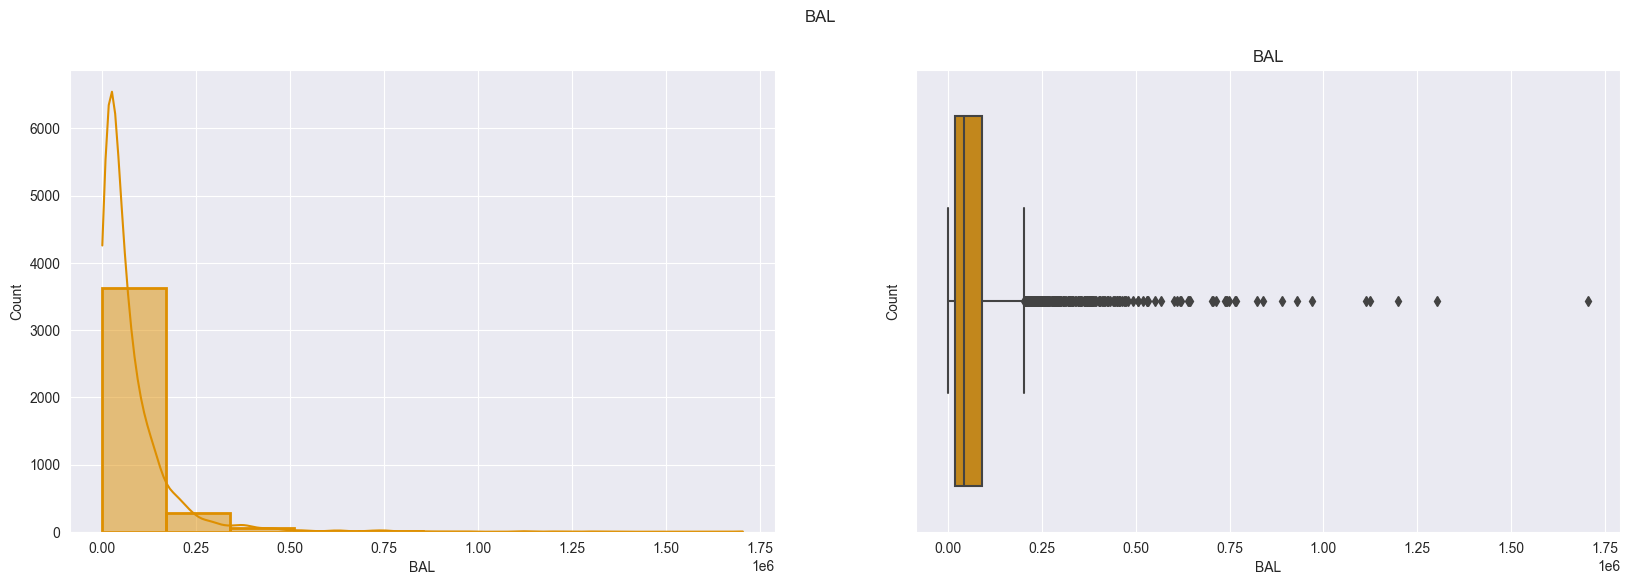

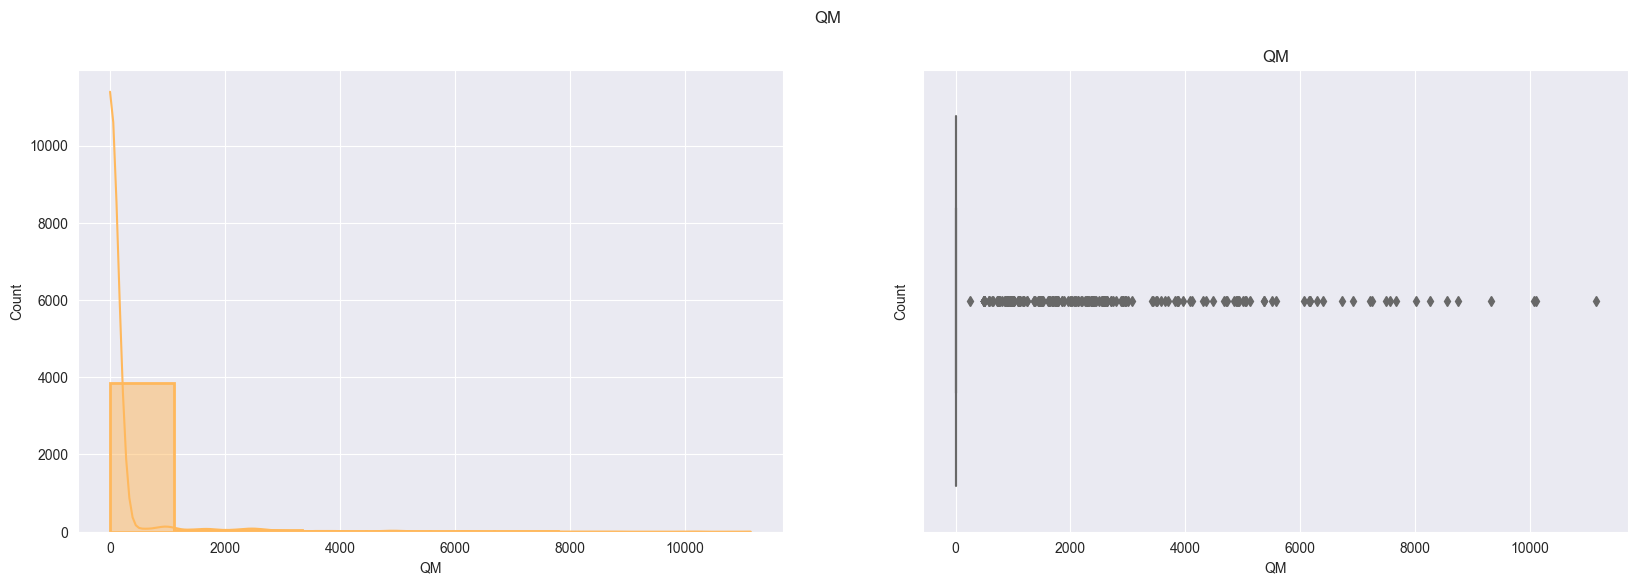

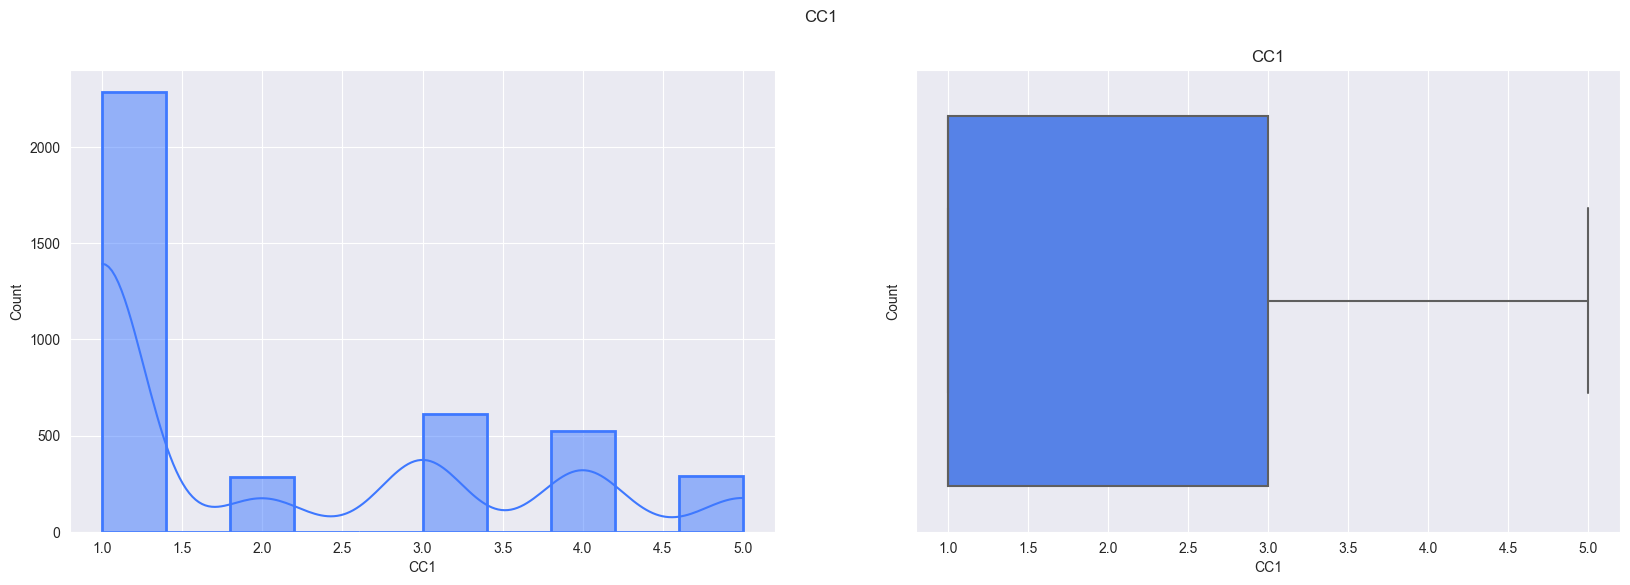

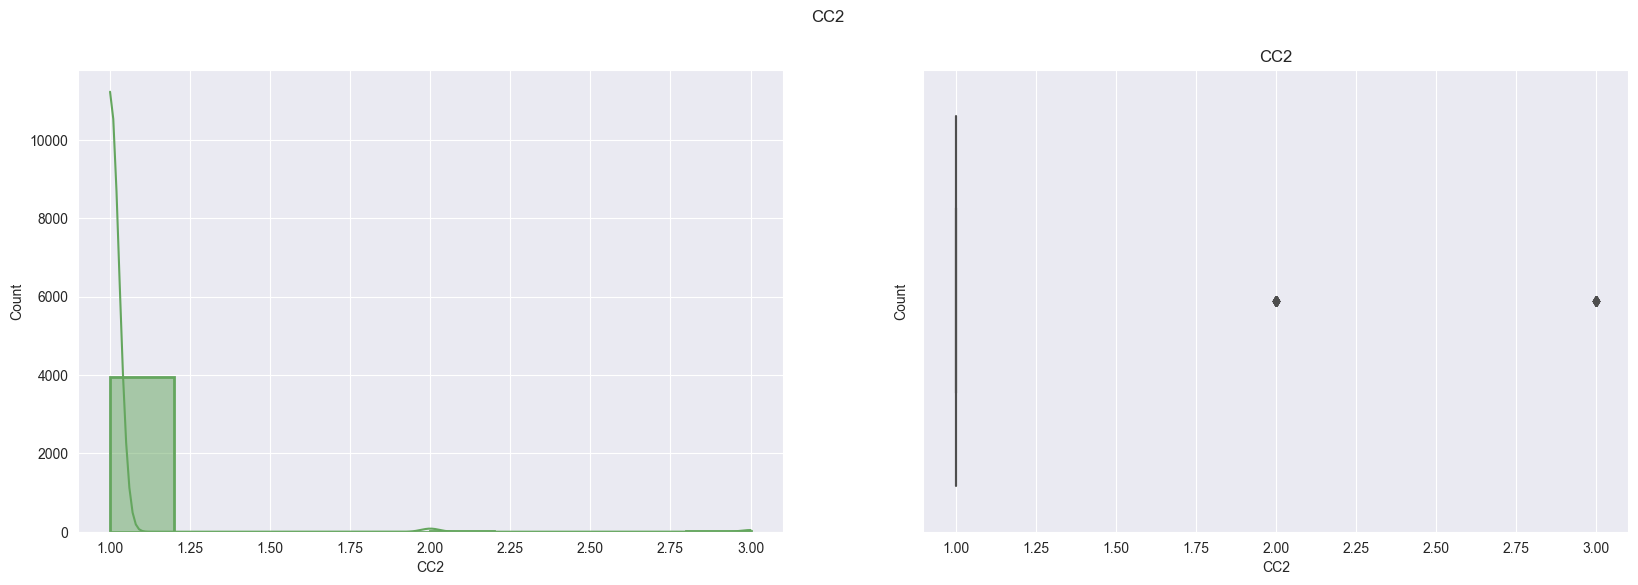

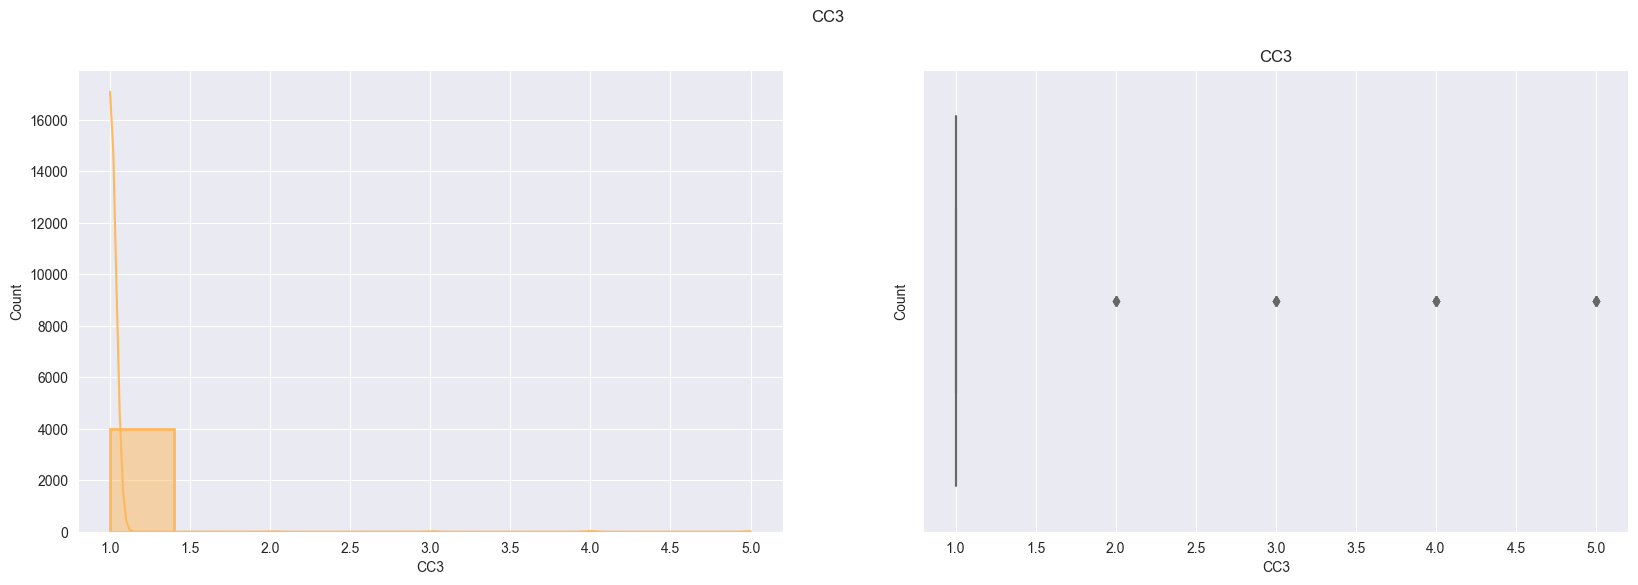

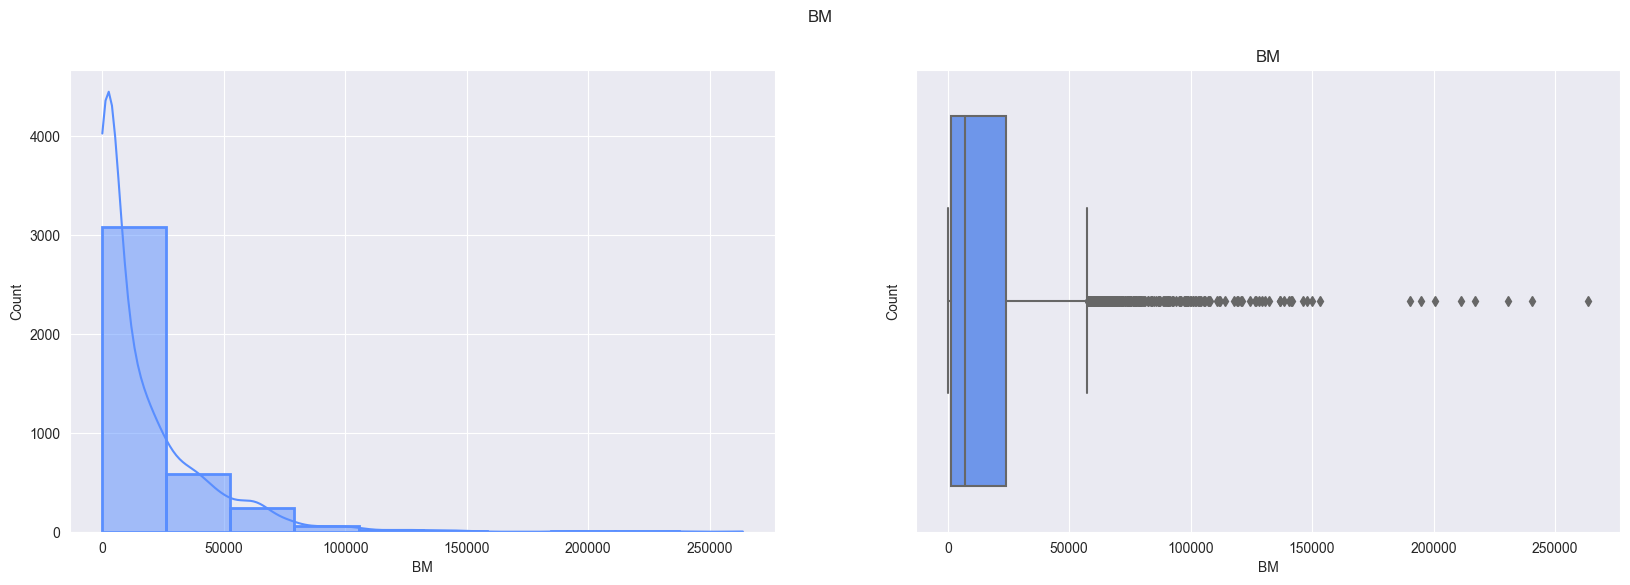

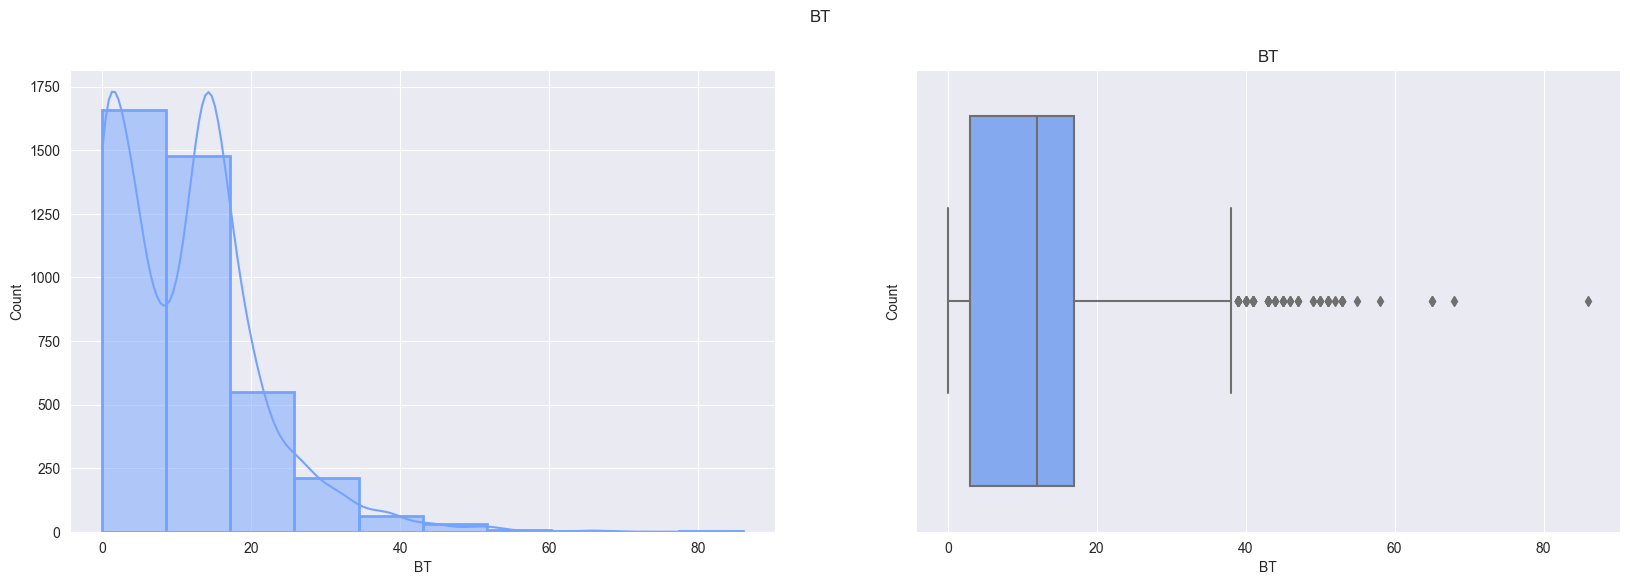

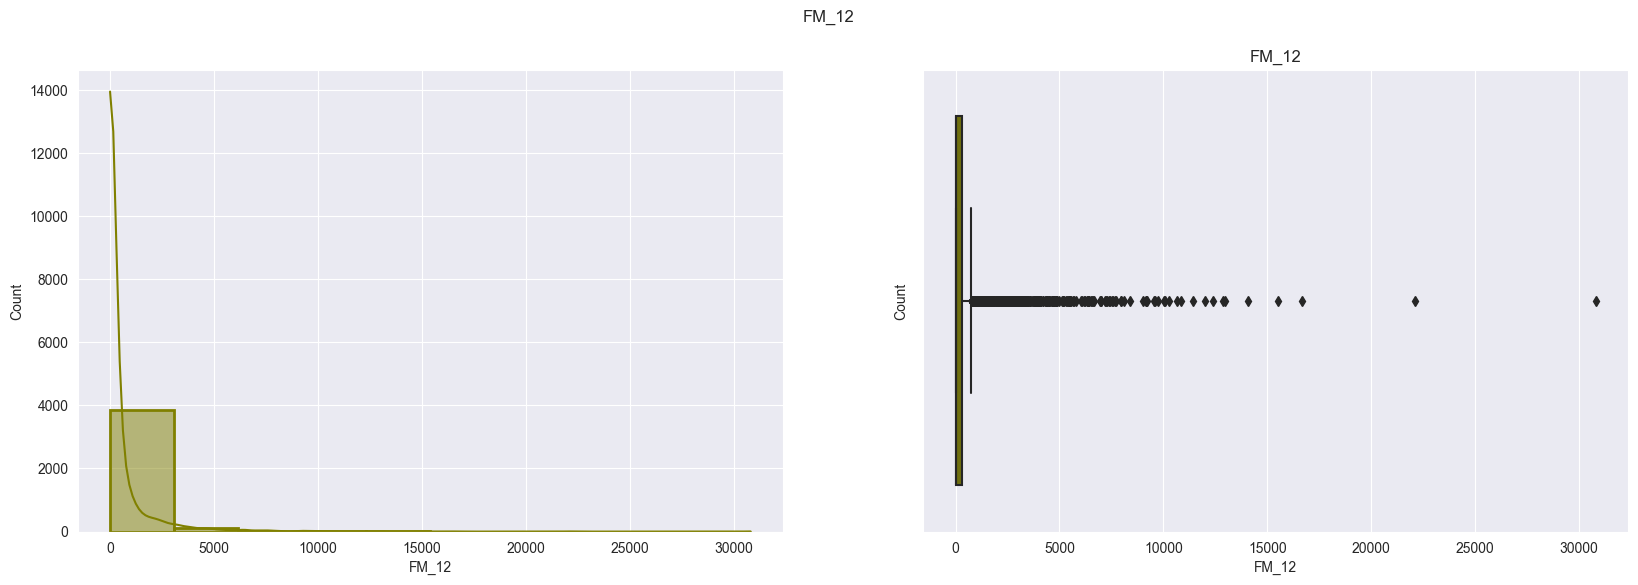

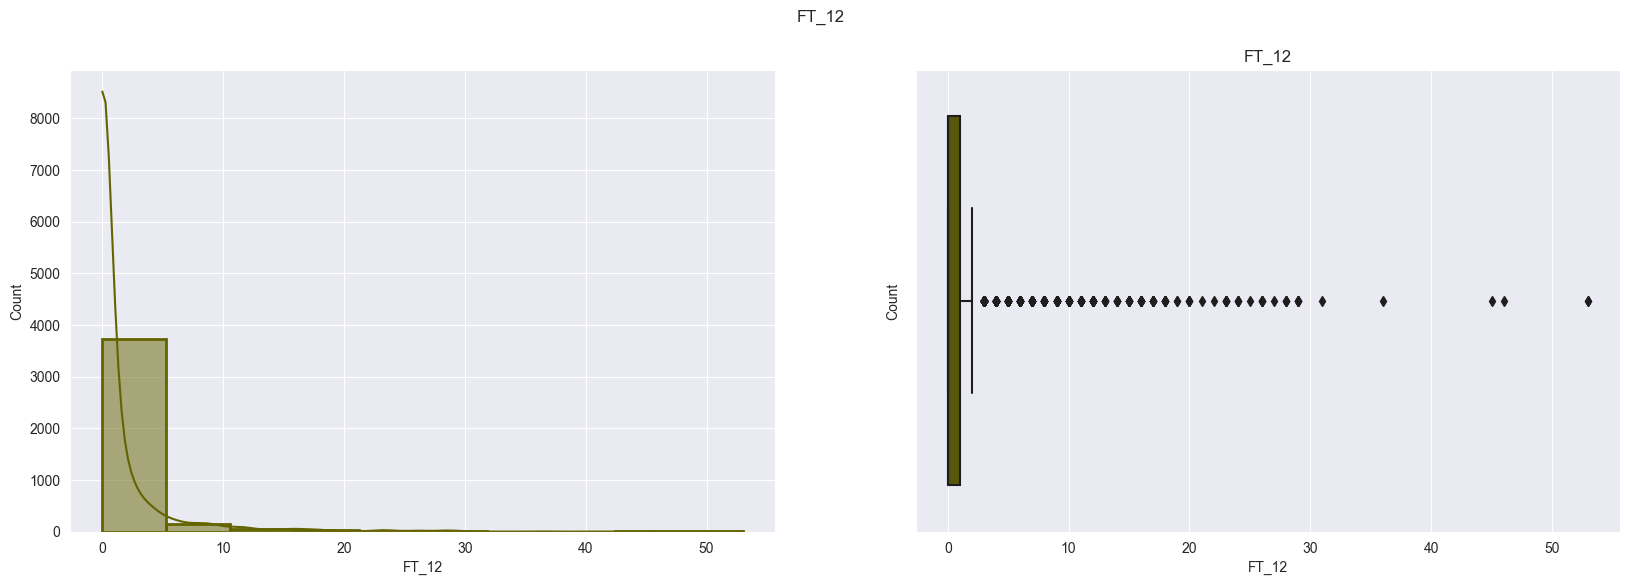

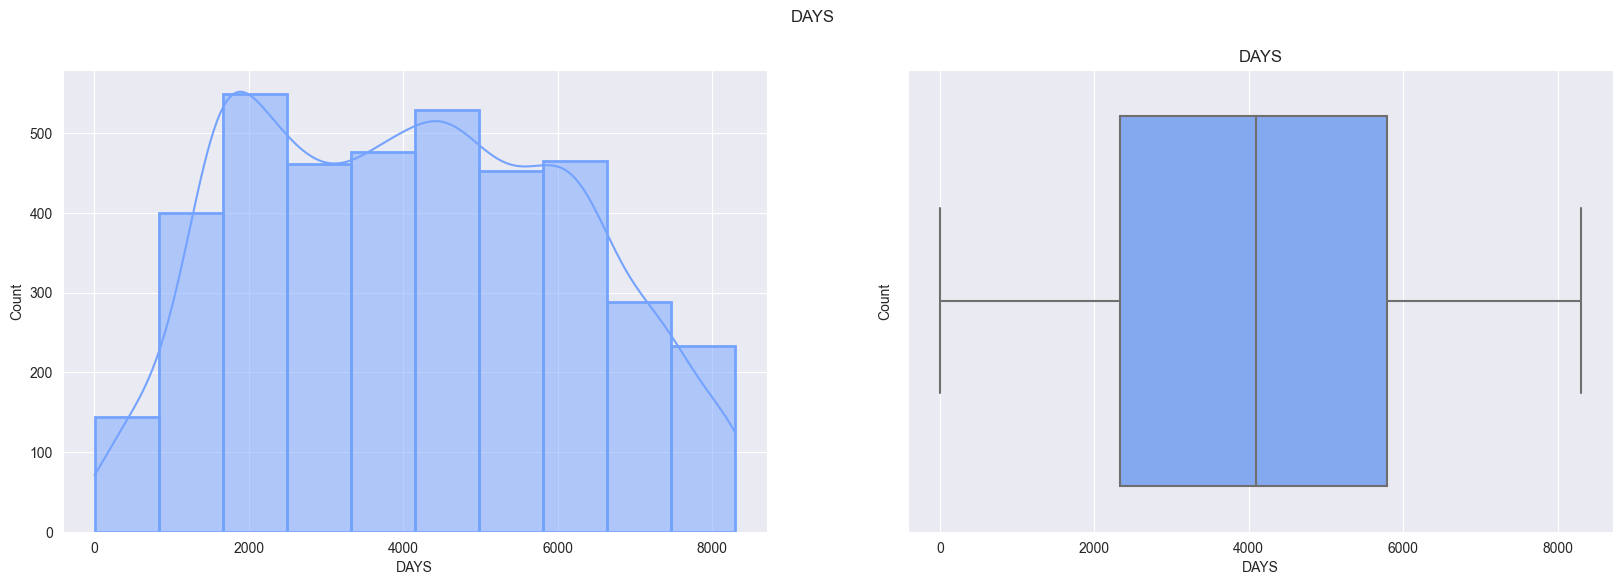

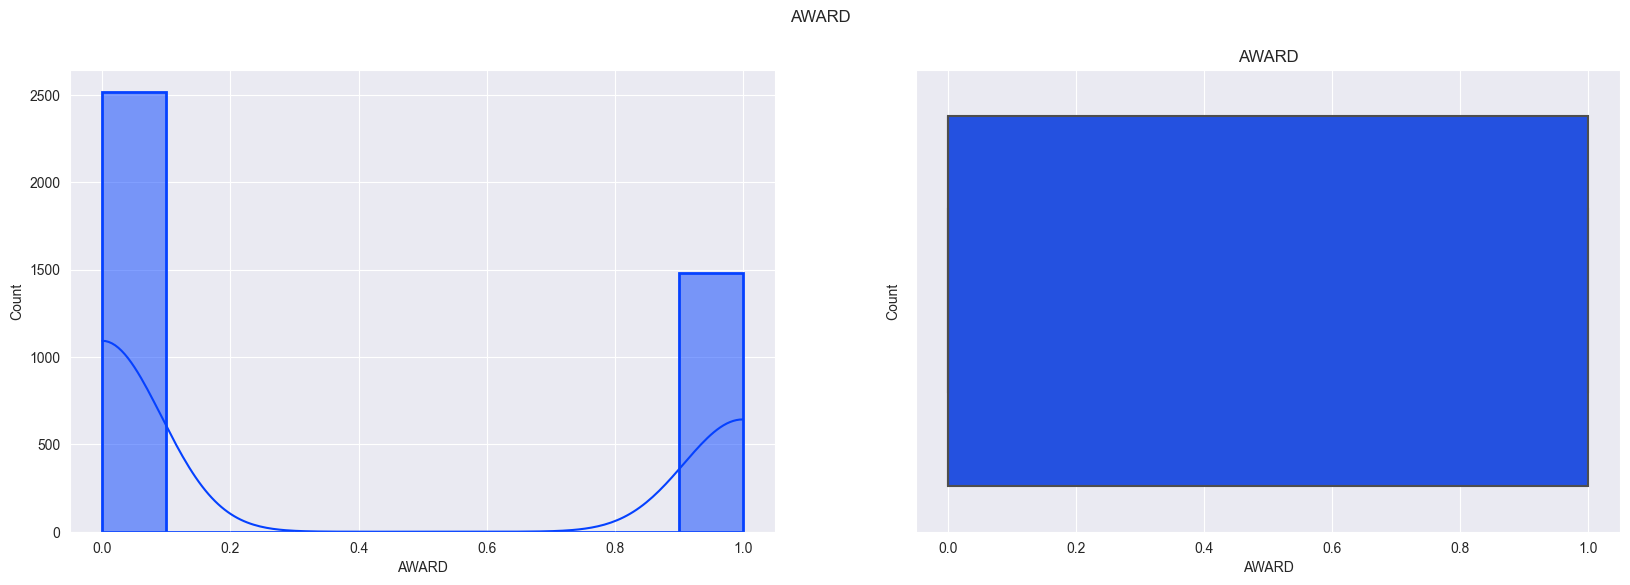

In [409]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):

    # Using Matplotlib

    #plt.figure(figsize=(16,6))
    #plt.subplot(1,2,1)
    #data[feature].hist()
    #plt.subplot(1,2,2)
    #plt.boxplot(data[feature])
    
    
    # Seaborn
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)

    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=feature, color=color)
    plt.ylabel('Count')
    plt.suptitle(feature)

for cols in EW_Airlines_data.columns:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(EW_Airlines_data,cols)
    plt.title(cols)

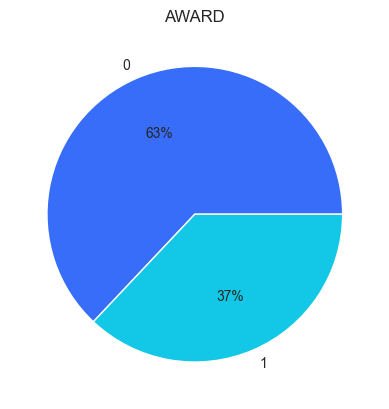

In [410]:
import matplotlib.pyplot as plt
import seaborn as sns

palette_color = sns.color_palette('rainbow')[0:7]

# Display state data in a form of Pie Graph
values = EW_Airlines_data['AWARD'].value_counts().keys().tolist()
counts = EW_Airlines_data['AWARD'].value_counts().tolist()
values, counts
plt.pie(EW_Airlines_data['AWARD'].value_counts(), labels=values, colors=palette_color, autopct='%.0f%%')
plt.title('AWARD')
plt.show()

### **Checking the Correllation between columns** ###

In [411]:
EW_Airlines_data.corr()

BAL        QM       CC1       CC2       CC3        BM        BT  \
BAL    1.000000  0.108722  0.338344 -0.008804  0.035243  0.403487  0.324935   
QM     0.108722  1.000000  0.007931 -0.013923 -0.007779  0.031021  0.050725   
CC1    0.338344  0.007931  1.000000 -0.068223  0.060555  0.825200  0.608943   
CC2   -0.008804 -0.013923 -0.068223  1.000000 -0.006166 -0.003969  0.064399   
CC3    0.035243 -0.007779  0.060555 -0.006166  1.000000  0.204134  0.097313   
BM     0.403487  0.031021  0.825200 -0.003969  0.204134  1.000000  0.603180   
BT     0.324935  0.050725  0.608943  0.064399  0.097313  0.603180  1.000000   
FM_12  0.217551  0.126774  0.037370  0.010598 -0.001777  0.183536  0.377216   
FT_12  0.255700  0.144004  0.041333  0.028284 -0.001117  0.185261  0.432364   
DAYS   0.263129  0.017312  0.230849 -0.005807  0.010832  0.210397  0.161262   
AWARD  0.178494  0.095256  0.335457  0.005332  0.023484  0.373506  0.333893   

          FM_12     FT_12      DAYS     AWARD  
BAL    0.217551  0.255700  0.263129  0.178494  
QM     0.126774  0.144004  0.017312  0.095256  
CC1    0.037370  0.041333  0.230849  0.335457  
CC2    0.010598  0.028284 -0.005807  0.005332  
CC3   -0.001777 -0.001117  0.010832  0.023484  
BM     0.183536  0.185261  0.210397  0.373506  
BT     0.377216  0.432364  0.161262  0.333893  
FM_12  1.000000  0.869193  0.037271  0.217715  
FT_12  0.869193  1.000000  0.059260  0.247909  
DAYS   0.037271  0.059260  1.000000  0.188121  
AWARD  0.217715  0.247909  0.188121  1.000000

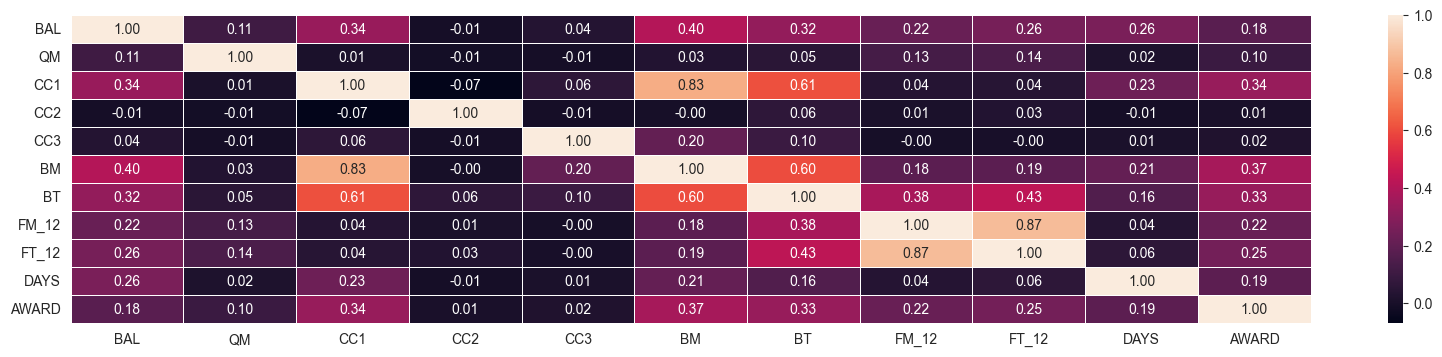

In [412]:
# Correlation Heatmap
f,ax = plt.subplots(figsize=(20,4))
sns.heatmap(EW_Airlines_data.corr(), annot=True, linewidths =.5, fmt ='.2f',ax=ax)
plt.show()

#### **Inferences:** ####
1. There is high positive correlation between *'Number of flight miles in the past 12 months'* i.e., **FM_12** and *'Number of flight transactions in the past 12 months'* i.e., **FT_12**
2.  There is high positive correlation between *'Number of miles earned from non-flight bonus transactions in the past 12 months'** i.e. **BM** and *'Number of miles earned with freq. flyer credit card in the past 12 months'* i.e. **CC1**
3.  There is a positive correlation between *'Number of non-flight bonus transactions in the past 12 months'* i.e. **BT** and *'Number of miles earned with freq. flyer credit card in the past 12 months'* i.e. **CC1**
4.  There is a positive correlation between *'Number of miles earned from non-flight bonus transactions in the past 12 months'* i.e. **BM** and *'Number of miles earned with freq. flyer credit card in the past 12 months'* i.e. **CC1**

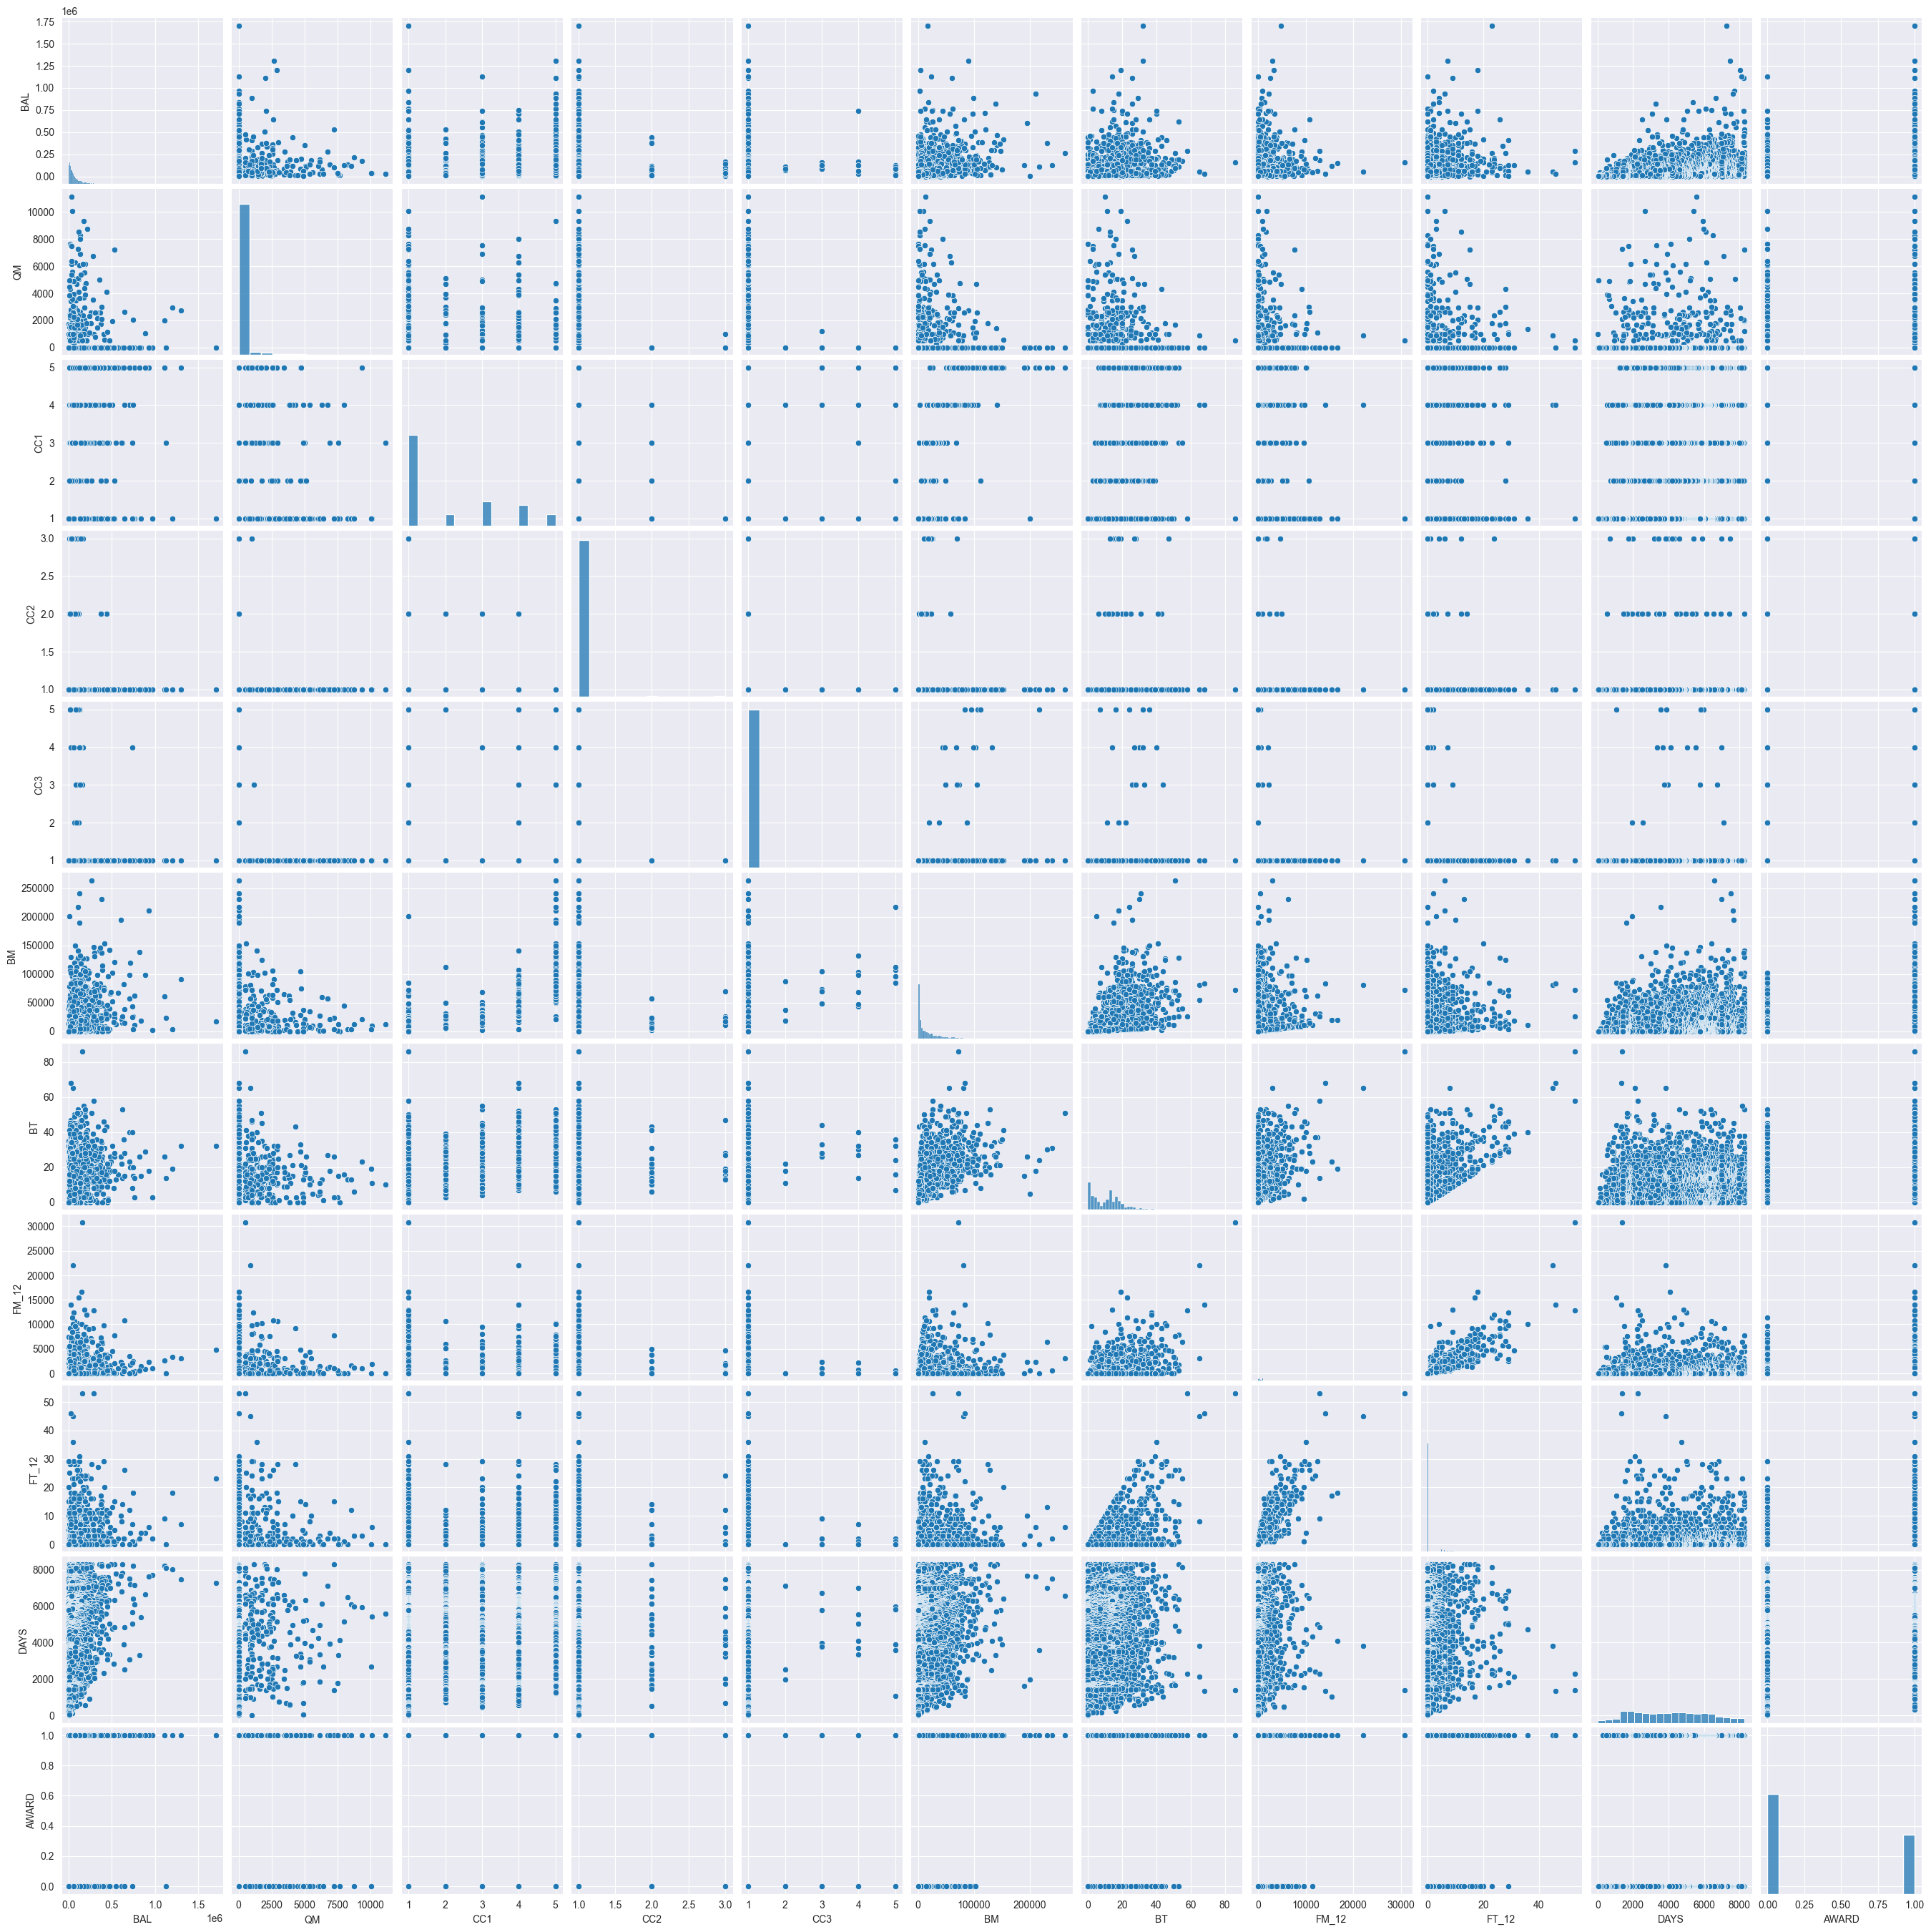

In [413]:
# Format the plot background and scatter plots for all the variables
# The above inferences are seen visually in the below scatter plots
sns.set_style(style='darkgrid')
sns.pairplot(EW_Airlines_data)

### **Custom Normalized Function** ###

In [414]:
# Customized Normalization function
# Here we can use standardized functions as well from sklearn but to show you how we can write customized function we used this code
def norm_func(i): # function name is norm_func, we can give any name here.
    x = (i-i.min())/(i.max()-i.min()) # (Xi-min)/range (Feature Scaling), Range=max-min
    return x

In [415]:
# Normalized data frame (considering the numerical part of data)
EW_Airlines_Norm = norm_func(EW_Airlines_orig_data.iloc[:,1:])

In [416]:
EW_Airlines_Norm.head()

BAL   QM   CC1  CC2  CC3        BM        BT     FM_12     FT_12  \
0  0.016508  0.0  0.00  0.0  0.0  0.000660  0.011628  0.000000  0.000000   
1  0.011288  0.0  0.00  0.0  0.0  0.000815  0.023256  0.000000  0.000000   
2  0.024257  0.0  0.00  0.0  0.0  0.015636  0.046512  0.000000  0.000000   
3  0.008667  0.0  0.00  0.0  0.0  0.001896  0.011628  0.000000  0.000000   
4  0.057338  0.0  0.75  0.0  0.0  0.164211  0.302326  0.067398  0.075472   

       DAYS  AWARD  
0  0.843742    0.0  
1  0.839884    0.0  
2  0.847842    0.0  
3  0.837955    0.0  
4  0.835905    1.0

### **Normalization of the data using MinMaxScaler Function** ###

In [417]:
EW_Airlines_data.head()

BAL  QM  CC1  CC2  CC3     BM  BT  FM_12  FT_12  DAYS  AWARD
0  28143   0    1    1    1    174   1      0      0  7000      0
1  19244   0    1    1    1    215   2      0      0  6968      0
2  41354   0    1    1    1   4123   4      0      0  7034      0
3  14776   0    1    1    1    500   1      0      0  6952      0
4  97752   0    4    1    1  43300  26   2077      4  6935      1

In [418]:
df_norm = EW_Airlines_data.copy()


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame()

df_norm[['BAL','QM','CC1','CC2','CC3','BM','BT','FM_12','FT_12','DAYS','AWARD']] = scaler.fit_transform(EW_Airlines_orig_data[['BAL','QM','CC1','CC2','CC3','BM','BT','FM_12','FT_12','DAYS','AWARD']])
df_norm.head()

BAL   QM   CC1  CC2  CC3        BM        BT     FM_12     FT_12  \
0  0.016508  0.0  0.00  0.0  0.0  0.000660  0.011628  0.000000  0.000000   
1  0.011288  0.0  0.00  0.0  0.0  0.000815  0.023256  0.000000  0.000000   
2  0.024257  0.0  0.00  0.0  0.0  0.015636  0.046512  0.000000  0.000000   
3  0.008667  0.0  0.00  0.0  0.0  0.001896  0.011628  0.000000  0.000000   
4  0.057338  0.0  0.75  0.0  0.0  0.164211  0.302326  0.067398  0.075472   

       DAYS  AWARD  
0  0.843742    0.0  
1  0.839884    0.0  
2  0.847842    0.0  
3  0.837955    0.0  
4  0.835905    1.0

In [419]:
df_norm.head()

BAL   QM   CC1  CC2  CC3        BM        BT     FM_12     FT_12  \
0  0.016508  0.0  0.00  0.0  0.0  0.000660  0.011628  0.000000  0.000000   
1  0.011288  0.0  0.00  0.0  0.0  0.000815  0.023256  0.000000  0.000000   
2  0.024257  0.0  0.00  0.0  0.0  0.015636  0.046512  0.000000  0.000000   
3  0.008667  0.0  0.00  0.0  0.0  0.001896  0.011628  0.000000  0.000000   
4  0.057338  0.0  0.75  0.0  0.0  0.164211  0.302326  0.067398  0.075472   

       DAYS  AWARD  
0  0.843742    0.0  
1  0.839884    0.0  
2  0.847842    0.0  
3  0.837955    0.0  
4  0.835905    1.0

    The data in DataFrame 'df_norm' is the same irrespective of us using MinMaxScaler library or using the custom function stored as DataFrame 'EW_Airlines_Norm'. 
    We prefer going with the library function to avoid any manual errors in the future.

## **HIERARCHICAL CLUSTERING** ##

In [420]:
hc_df_norm = df_norm.copy()
hc_df_norm.head()

BAL   QM   CC1  CC2  CC3        BM        BT     FM_12     FT_12  \
0  0.016508  0.0  0.00  0.0  0.0  0.000660  0.011628  0.000000  0.000000   
1  0.011288  0.0  0.00  0.0  0.0  0.000815  0.023256  0.000000  0.000000   
2  0.024257  0.0  0.00  0.0  0.0  0.015636  0.046512  0.000000  0.000000   
3  0.008667  0.0  0.00  0.0  0.0  0.001896  0.011628  0.000000  0.000000   
4  0.057338  0.0  0.75  0.0  0.0  0.164211  0.302326  0.067398  0.075472   

       DAYS  AWARD  
0  0.843742    0.0  
1  0.839884    0.0  
2  0.847842    0.0  
3  0.837955    0.0  
4  0.835905    1.0

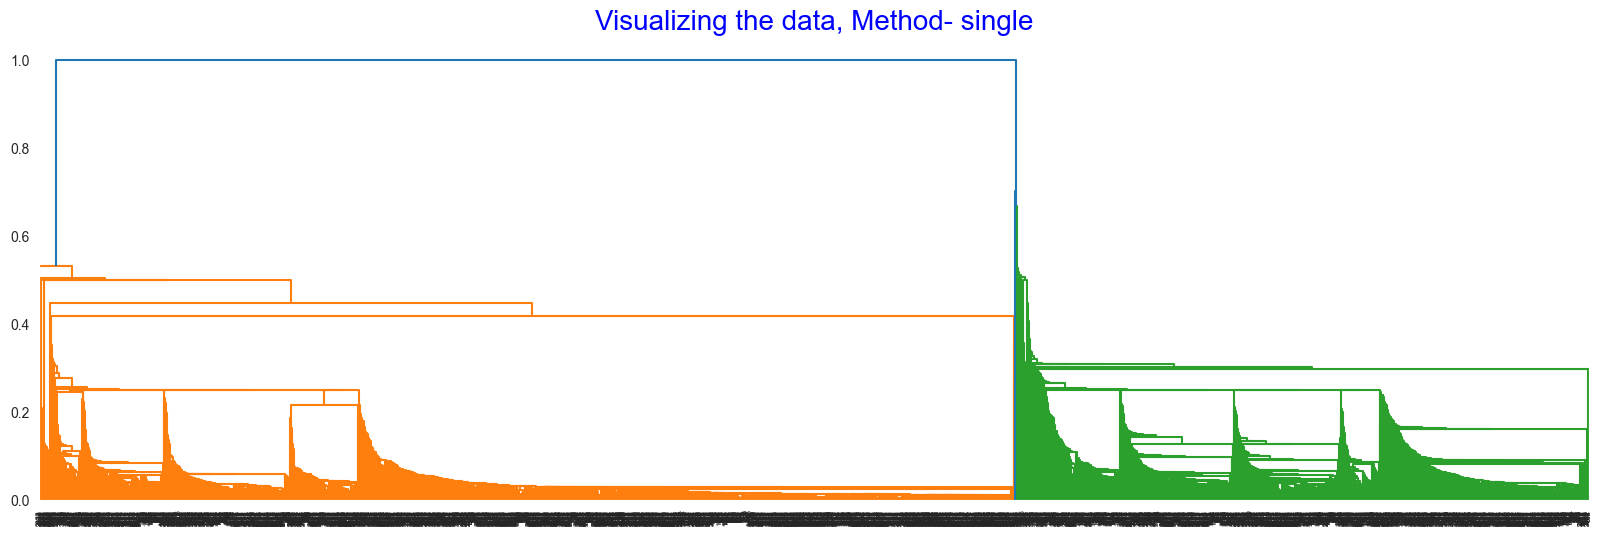

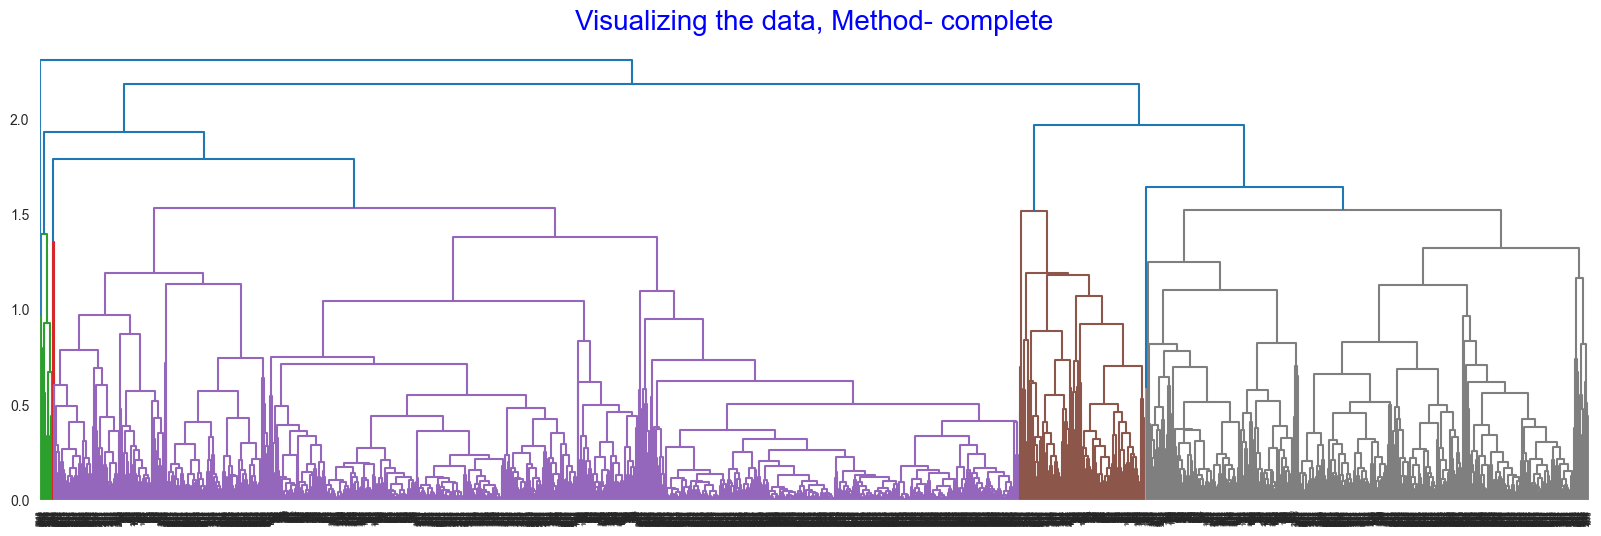

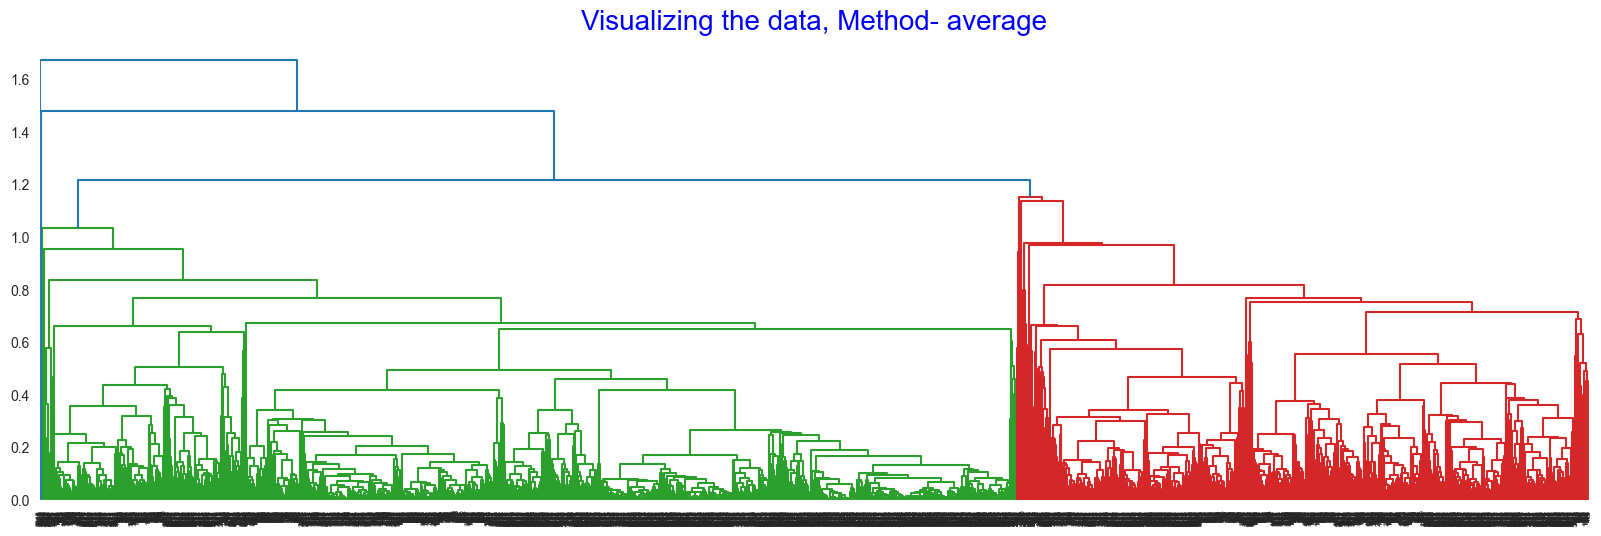

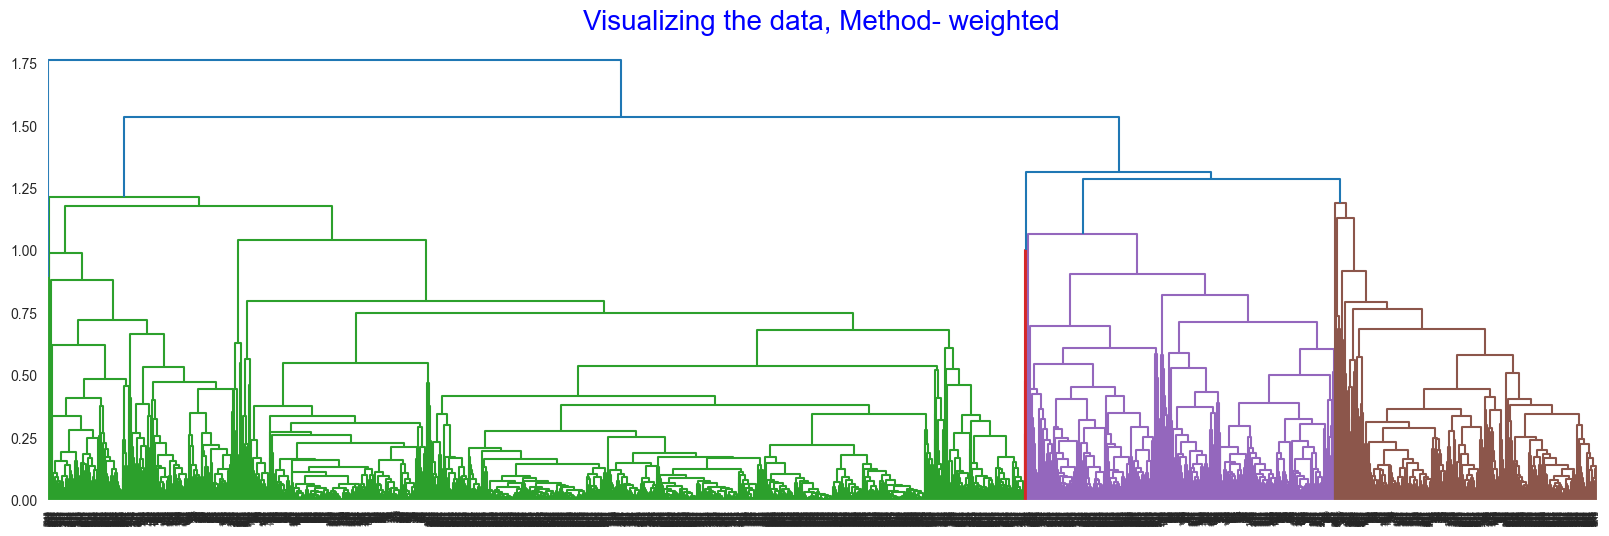

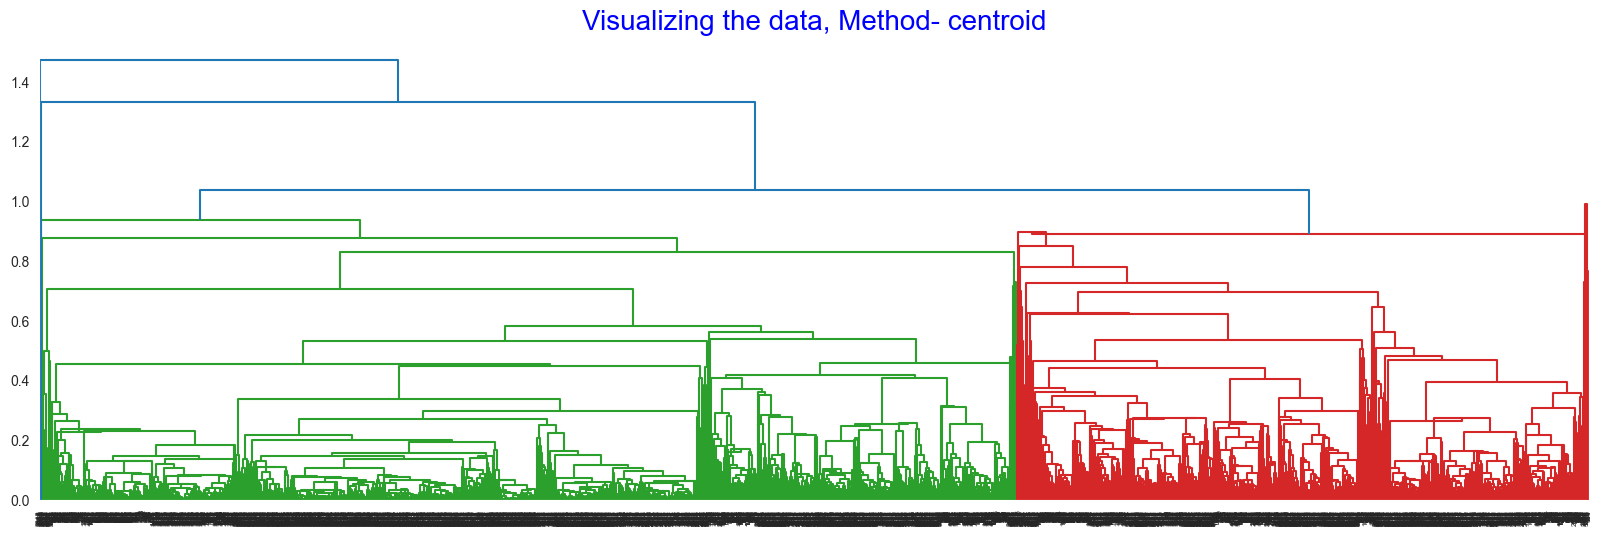

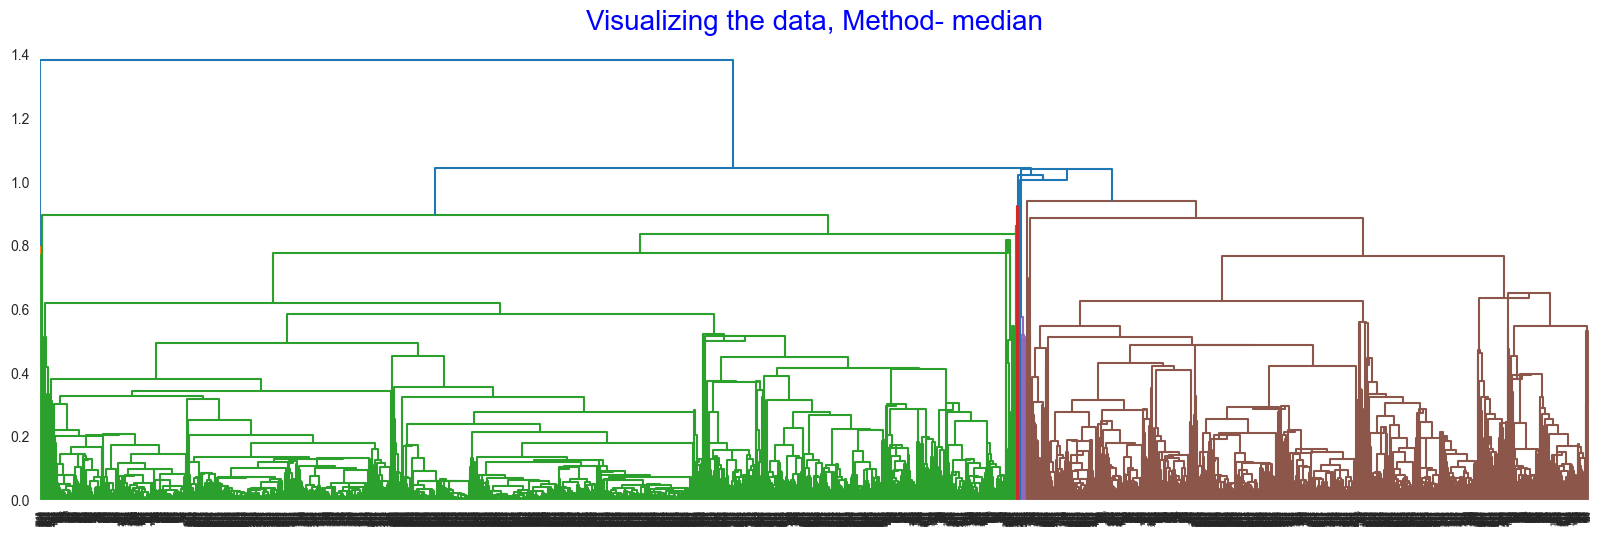

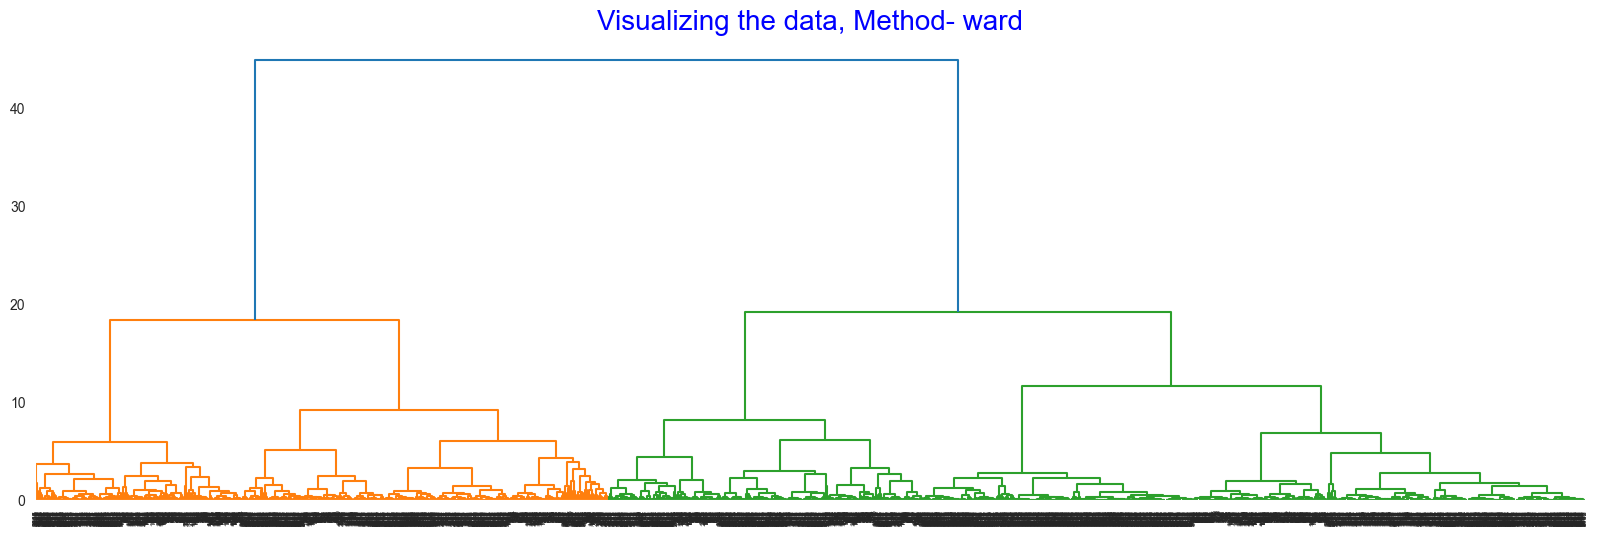

In [421]:
hc_df_norm = df_norm.copy()

# Applying Dendrogram on the normalized data.
# We are using different linkage methods for understanding it better. 
# Finding the number of clusters using color coding of dendrogram. Each color indicates one cluster.

import scipy.cluster.hierarchy as sch # to build dendrogram and build the plotting

for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20, 6))
    dict = {'fontsize':20,'fontweight':10, 'color':'blue'}
    plt.title('Visualizing the data, Method- {}'.format(methods),fontdict = dict)
    dendrogram = sch.dendrogram(sch.linkage(hc_df_norm, method=methods,optimal_ordering=False))

#### **Inferences:** ####
1. Based on the visualization, we see that the model which best demarkates the clusters is the 'ward' method.
2. The next best alternative method appears to be the 'complete' method, which demarkates the clusters in a better way.
3. The next best alternative method appears to be the 'weighted' method, which also demarkates the clusters effectively.

Based on the Elbow Chart we see that best option is to take **2 clusters** and alternatively **4 clusters**

However, **2 clusters** is too small to consider. So, to be on the same side, we can go for 4 clusters. However, there is no harm with going for 2 or 5 clusters.

*It does not make any sense to go for >5 clusters.*

### **Creation of the Model** ###

### ***4 Clusters using 'Ward' Method*** ###

In [422]:
# Creating clusters based on the inferences gathered - creating 4 clusters using 'ward' method
a_model_hc_4 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
a_model_hc_4

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [423]:
# Saving the data for 4 clusters using 'ward' method
a_y_hc_4 = a_model_hc_4.fit_predict(hc_df_norm) # Applying fit_predict method on dataset hc_df_norm. We will get cluster nos. in a_y_hc_4
a_clusters_w_4=pd.DataFrame(a_y_hc_4,columns=['HC_W_4']) # Saving the cluster numbers in a_clusters_w_4 to update original dataframe
a_clusters_w_4.head()

HC_W_4
0       0
1       0
2       0
3       0
4       3

In [424]:
# Now let us map this cluster membership to the data points
EW_Airlines_orig_data['HC_W_4'] = a_clusters_w_4
hc_df_norm['HC_W_4'] = a_clusters_w_4
EW_Airlines_orig_data.head()

ID    BAL  QM  CC1  CC2  CC3     BM  BT  FM_12  FT_12  DAYS  AWARD  HC_W_4
0   1  28143   0    1    1    1    174   1      0      0  7000      0       0
1   2  19244   0    1    1    1    215   2      0      0  6968      0       0
2   3  41354   0    1    1    1   4123   4      0      0  7034      0       0
3   4  14776   0    1    1    1    500   1      0      0  6952      0       0
4   5  97752   0    4    1    1  43300  26   2077      4  6935      1       3

### ***4 Clusters using 'Complete' Method*** ###

In [425]:
# Creating clusters based on the inferences gathered - creating 4 clusters using complete method
a_model_hcc_4 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
a_model_hcc_4

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [426]:
# Saving the data for 4 clusters using 'complete' method
a_y_hcc_4 = a_model_hcc_4.fit_predict(hc_df_norm) # Apply fit_predict method on dataset hc_df_norm. We will get cluster nos. in a_y_hcc_4
a_clusters_c_4=pd.DataFrame(a_y_hcc_4,columns=['HC_C_4']) # Append those no. of cluster numbers to create dataframe
a_clusters_c_4.head()

HC_C_4
0       3
1       3
2       3
3       3
4       0

In [427]:
# Now let us map this cluster membership to the data points
EW_Airlines_orig_data['HC_C_4'] = a_clusters_c_4
hc_df_norm['HC_C_4'] = a_clusters_c_4
hc_df_norm['ID'] = EW_Airlines_orig_data['ID'] # Adding ID to the normalized DataFrame
EW_Airlines_orig_data.head()

ID    BAL  QM  CC1  CC2  CC3     BM  BT  FM_12  FT_12  DAYS  AWARD  HC_W_4  \
0   1  28143   0    1    1    1    174   1      0      0  7000      0       0   
1   2  19244   0    1    1    1    215   2      0      0  6968      0       0   
2   3  41354   0    1    1    1   4123   4      0      0  7034      0       0   
3   4  14776   0    1    1    1    500   1      0      0  6952      0       0   
4   5  97752   0    4    1    1  43300  26   2077      4  6935      1       3   

   HC_C_4  
0       3  
1       3  
2       3  
3       3  
4       0

### **Visualization** ###

In [428]:
# 4 Clusters 'Ward' Method
hc_df_norm['HC_W_4'].value_counts()

HC_W_4
0    1710
1     946
2     808
3     535
Name: count, dtype: int64

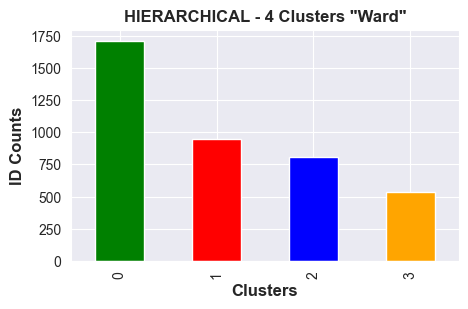

In [429]:
# 4 Clusters 'Ward' Method, Count Break-up Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart to get a visualization of the count of records for each cluster
bar_colors = ['green', 'red', 'blue', 'orange']
fig, ax = plt.subplots(figsize=(5, 3))
hc_df_norm.groupby(['HC_W_4']).count()['ID'].plot(kind='bar', color=bar_colors)
plt.ylabel('ID Counts')
plt.title('HIERARCHICAL - 4 Clusters "Ward"',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID Counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

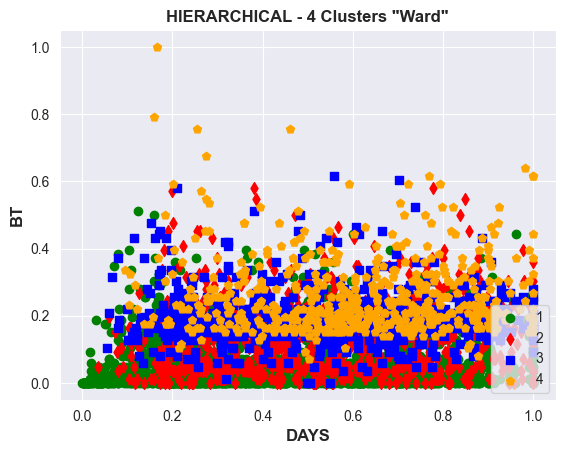

In [430]:
# Scatter Plot Visual for 4 Clusters 'Ward' Method
# Choosing 'DAYS' and 'BT' to plot the scatter plot

df1 = hc_df_norm[hc_df_norm.HC_W_4==0]
df2 = hc_df_norm[hc_df_norm.HC_W_4==1]
df3 = hc_df_norm[hc_df_norm.HC_W_4==2]
df4 = hc_df_norm[hc_df_norm.HC_W_4==3]

plt.scatter(df1['DAYS'],df1['BT'], color='green', marker='o', label='1')
plt.scatter(df2['DAYS'],df2['BT'], color='red', marker='d', label='2')
plt.scatter(df3['DAYS'],df3['BT'], color='blue', marker='s', label='3')
plt.scatter(df4['DAYS'],df4['BT'], color='orange', marker='p', label='4')

plt.title('HIERARCHICAL - 4 Clusters "Ward"',fontsize='large',fontweight='bold')
plt.xlabel('DAYS', fontsize='large', fontweight='bold')
plt.ylabel('BT', fontsize='large', fontweight='bold')

plt.legend(loc='lower right')


In [431]:
# 4 Clusters 'Complete' Method
hc_df_norm['HC_C_4'].value_counts()

HC_C_4
3    1710
1     946
2     808
0     535
Name: count, dtype: int64

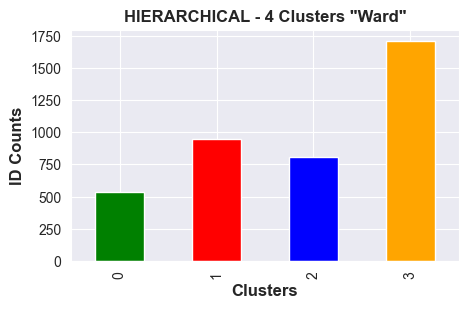

In [432]:
# 4 Clusters 'Complete' Method, Count Break-up Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart to get a visualization of the count of records for each cluster
bar_colors = ['green', 'red', 'blue', 'orange']
fig, ax = plt.subplots(figsize=(5, 3))
hc_df_norm.groupby(['HC_C_4']).count()['ID'].plot(kind='bar', color=bar_colors)
plt.ylabel('ID Counts')
plt.title('HIERARCHICAL - 4 Clusters "Ward"',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID Counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

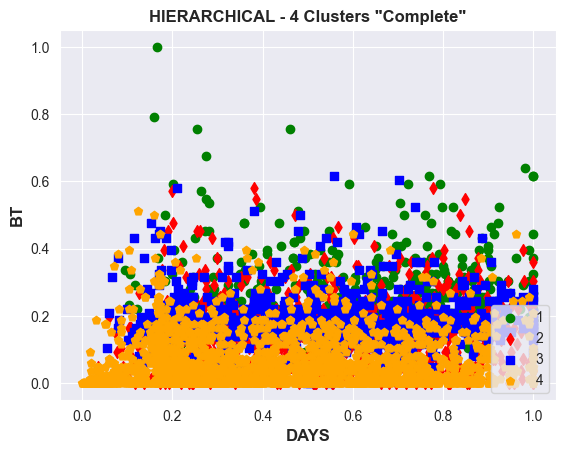

In [433]:
# Scatter Plot Visual for 4 Clusters 'Complete' Method
# Choosing 'DAYS' and 'BT' to plot the scatter plot

df1 = hc_df_norm[hc_df_norm.HC_C_4==0]
df2 = hc_df_norm[hc_df_norm.HC_C_4==1]
df3 = hc_df_norm[hc_df_norm.HC_C_4==2]
df4 = hc_df_norm[hc_df_norm.HC_C_4==3]

plt.scatter(df1['DAYS'],df1['BT'], color='green', marker='o', label='1')
plt.scatter(df2['DAYS'],df2['BT'], color='red', marker='d', label='2')
plt.scatter(df3['DAYS'],df3['BT'], color='blue', marker='s', label='3')
plt.scatter(df4['DAYS'],df4['BT'], color='orange', marker='p', label='4')

plt.title('HIERARCHICAL - 4 Clusters "Complete"',fontsize='large',fontweight='bold')
plt.xlabel('DAYS', fontsize='large', fontweight='bold')
plt.ylabel('BT', fontsize='large', fontweight='bold')

plt.legend(loc='lower right')


In [434]:
# The crime dataframe having the 4 new columns for 4 and 5 clusters using 'Ward' and 'Complete' Methods
EW_Airlines_orig_data.head()

ID    BAL  QM  CC1  CC2  CC3     BM  BT  FM_12  FT_12  DAYS  AWARD  HC_W_4  \
0   1  28143   0    1    1    1    174   1      0      0  7000      0       0   
1   2  19244   0    1    1    1    215   2      0      0  6968      0       0   
2   3  41354   0    1    1    1   4123   4      0      0  7034      0       0   
3   4  14776   0    1    1    1    500   1      0      0  6952      0       0   
4   5  97752   0    4    1    1  43300  26   2077      4  6935      1       3   

   HC_C_4  
0       3  
1       3  
2       3  
3       3  
4       0

## **K-MEANS CLUSTERING** ##

### **Using Elbow Plot to arrive at the best count for the sample** ###

In [435]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_norm)
    sse.append(km.inertia_)
sse

[1830.7932128584114,
 823.6756984125207,
 625.1684881570721,
 436.70885761932624,
 348.94332172541374,
 315.14802247450274,
 287.8949183703742,
 263.04731318694576,
 245.39847105167493]

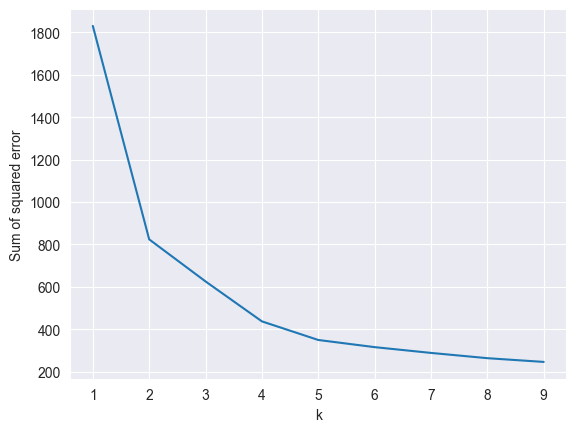

In [436]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

# According to the graph the best cluster size is 4 but we can take 2 or 5 too, depends on the need of the client

#### **Inferences:** ####
1. We see a drastic change in the graph after 2 samples.
2. We don't see much change at 3 clusters but the second major change is seen at 4 samples
3. The third major change is seen at 5 clusters.

Ideally **2 clusters** should be taken. *However, 2 clusters is a very small to consider*.
So, the next best option is **4 clusters**.
The last option is **5 clusters**, as we can see in the graph.

To be on the same side, we can go for 3 or 4 clusters. However, there is no harm with going for 2 or 5 clusters.

*It does not make any sense to go for >5 clusters.*

In [437]:
#df_norm.drop(df_norm.iloc[:,11:],axis=1)

In [438]:

#kmeans = KMeans(n_clusters=4,random_state=0) # pass no. of clusters as 4
#predict=kmeans.fit_predict(scaled_Univ_df)# assign cluster numbers to universities

In [439]:
prediction_df = pd.DataFrame()

clusters = [2,3,4,5]

for cluster in pd.Series(clusters):
    kmeans = KMeans(n_clusters=cluster,random_state=0) # pass no. of clusters
    pred = 'KM_CLUSTER_' + str(cluster)
    EW_Airlines_orig_data[pred] = kmeans.fit_predict(df_norm)
    prediction_df[pred] = kmeans.fit_predict(df_norm)
    df_norm[pred] = kmeans.fit_predict(df_norm)

df_norm['ID'] = EW_Airlines_orig_data['ID']
prediction_df.head()

KM_CLUSTER_2  KM_CLUSTER_3  KM_CLUSTER_4  KM_CLUSTER_5
0             1             0             1             4
1             1             0             1             4
2             1             0             1             4
3             1             0             1             4
4             0             1             3             2

In [440]:
df_norm

BAL   QM   CC1  CC2  CC3        BM        BT     FM_12     FT_12  \
0     0.016508  0.0  0.00  0.0  0.0  0.000660  0.011628  0.000000  0.000000   
1     0.011288  0.0  0.00  0.0  0.0  0.000815  0.023256  0.000000  0.000000   
2     0.024257  0.0  0.00  0.0  0.0  0.015636  0.046512  0.000000  0.000000   
3     0.008667  0.0  0.00  0.0  0.0  0.001896  0.011628  0.000000  0.000000   
4     0.057338  0.0  0.75  0.0  0.0  0.164211  0.302326  0.067398  0.075472   
...        ...  ...   ...  ...  ...       ...       ...       ...       ...   
3994  0.010837  0.0  0.00  0.0  0.0  0.032330  0.046512  0.006490  0.018868   
3995  0.037766  0.0  0.00  0.0  0.0  0.003720  0.058140  0.000000  0.000000   
3996  0.043169  0.0  0.50  0.0  0.0  0.096505  0.093023  0.000000  0.000000   
3997  0.032202  0.0  0.00  0.0  0.0  0.001896  0.011628  0.016225  0.018868   
3998  0.001769  0.0  0.00  0.0  0.0  0.000000  0.000000  0.000000  0.000000   

          DAYS  AWARD  KM_CLUSTER_2  KM_CLUSTER_3  KM_CLUSTER_4  KM_CLUSTER_5  \
0     0.843742    0.0             1             0             1             4   
1     0.839884    0.0             1             0             1             4   
2     0.847842    0.0             1             0             1             4   
3     0.837955    0.0             1             0             1             4   
4     0.835905    1.0             0             1             3             2   
...        ...    ...           ...           ...           ...           ...   
3994  0.168917    1.0             0             1             0             0   
3995  0.167953    1.0             0             1             0             0   
3996  0.168797    1.0             0             1             3             2   
3997  0.168676    0.0             1             0             1             1   
3998  0.168314    0.0             1             0             1             1   

        ID  
0        1  
1        2  
2        3  
3        4  
4        5  
...    ...  
3994  4017  
3995  4018  
3996  4019  
3997  4020  
3998  4021  

[3999 rows x 16 columns]

In [441]:
df_pred2_clus1 = df_norm[df_norm['KM_CLUSTER_2']==0]
df_pred2_clus2 = df_norm[df_norm['KM_CLUSTER_2']==1]

df_pred3_clus1 = df_norm[df_norm['KM_CLUSTER_3']==0]
df_pred3_clus2 = df_norm[df_norm['KM_CLUSTER_3']==1]
df_pred3_clus3 = df_norm[df_norm['KM_CLUSTER_3']==2]

df_pred4_clus1 = df_norm[df_norm['KM_CLUSTER_4']==0]
df_pred4_clus2 = df_norm[df_norm['KM_CLUSTER_4']==1]
df_pred4_clus3 = df_norm[df_norm['KM_CLUSTER_4']==2]
df_pred4_clus4 = df_norm[df_norm['KM_CLUSTER_4']==3]

df_pred5_clus1 = df_norm[df_norm['KM_CLUSTER_5']==0]
df_pred5_clus2 = df_norm[df_norm['KM_CLUSTER_5']==1]
df_pred5_clus3 = df_norm[df_norm['KM_CLUSTER_5']==2]
df_pred5_clus4 = df_norm[df_norm['KM_CLUSTER_5']==3]
df_pred5_clus5 = df_norm[df_norm['KM_CLUSTER_5']==4]

In [442]:
# 2 Clusters
df_norm['KM_CLUSTER_2'].value_counts()

KM_CLUSTER_2
1    2518
0    1481
Name: count, dtype: int64

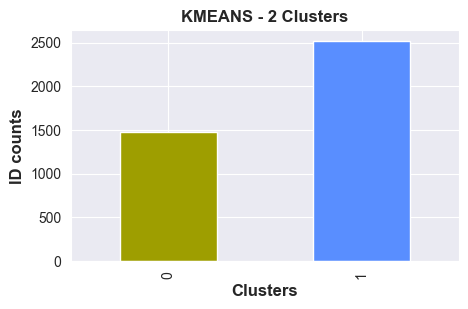

In [443]:
# 2 Clusters Count Break-up Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart to get a visualization of the count of records for each cluster
bar_colors = ['#9e9e00', '#598eff']
fig, ax = plt.subplots(figsize=(5, 3))
df_norm.groupby(['KM_CLUSTER_2']).count()['ID'].plot(kind='bar', color=bar_colors)
plt.ylabel('ID Counts')
plt.title('KMEANS - 2 Clusters',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

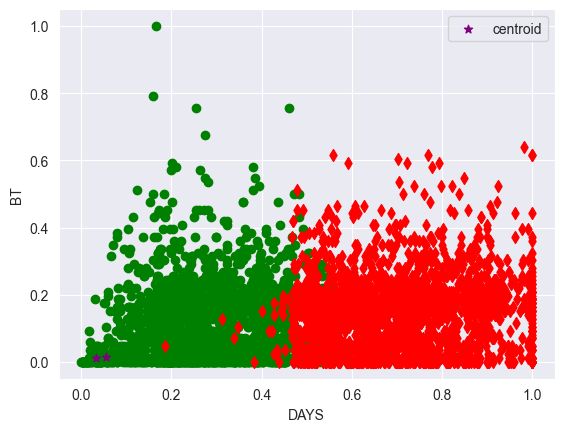

In [444]:
# Creating the Scatter Plot Visual for 2 clusters
# Choosing 'DAYS' and 'BT' to plot the scatter plot

km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(df_norm)
y_predicted
df_norm['KM_CLUSTER_2'] = y_predicted

df_norm.head()

df1 = df_norm[df_norm.KM_CLUSTER_2==0]
df2 = df_norm[df_norm.KM_CLUSTER_2==1]

plt.scatter(df1['DAYS'],df1['BT'], color='green', marker='o')
plt.scatter(df2['DAYS'],df2['BT'], color='red', marker='d')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*', label = 'centroid')
plt.xlabel('DAYS')
plt.ylabel('BT')
plt.legend()


In [445]:
# 3 Clusters
df_norm['KM_CLUSTER_3'].value_counts()

KM_CLUSTER_3
0    1897
1    1481
2     621
Name: count, dtype: int64

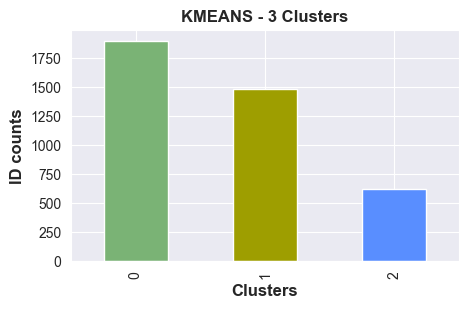

In [446]:
# 3 Clusters Count Break-up Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart to get a visualization of the count of records for each cluster
bar_colors = ['#7ab375', '#9e9e00', '#598eff']
fig, ax = plt.subplots(figsize=(5, 3))
df_norm.groupby(['KM_CLUSTER_3']).count()['ID'].plot(kind='bar', color=bar_colors)
plt.ylabel('ID Counts')
plt.title('KMEANS - 3 Clusters',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

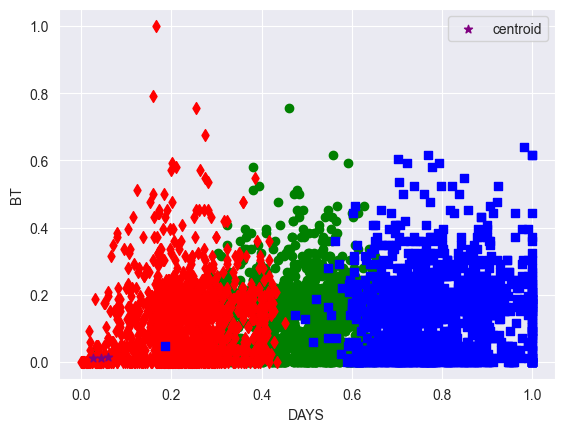

In [447]:
# Creating the Scatter Plot Visual for 3 clusters
# Choosing 'DAYS' and 'BT' to plot the scatter plot

km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_norm)
y_predicted
df_norm['KM_CLUSTER_3'] = y_predicted

df_norm.head()

df1 = df_norm[df_norm.KM_CLUSTER_3==0]
df2 = df_norm[df_norm.KM_CLUSTER_3==1]
df3 = df_norm[df_norm.KM_CLUSTER_3==2]

plt.scatter(df1['DAYS'],df1['BT'], color='green', marker='o')
plt.scatter(df2['DAYS'],df2['BT'], color='red', marker='d')
plt.scatter(df3['DAYS'],df3['BT'], color='blue', marker='s')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*', label = 'centroid')
plt.xlabel('DAYS')
plt.ylabel('BT')
plt.legend()


In [448]:
# 4 Clusters
df_norm['KM_CLUSTER_4'].value_counts()

KM_CLUSTER_4
1    1897
3     808
0     673
2     621
Name: count, dtype: int64

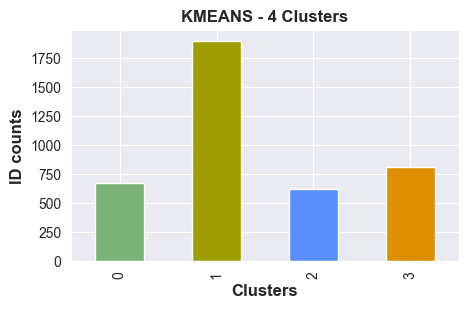

In [449]:
# 4 Clusters Count Break-up Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart to get a visualization of the count of records for each cluster
bar_colors = ['#7ab375', '#9e9e00', '#598eff', '#de8f00']
fig, ax = plt.subplots(figsize=(5, 3))
df_norm.groupby(['KM_CLUSTER_4']).count()['ID'].plot(kind='bar', color=bar_colors)
plt.ylabel('ID Counts')
plt.title('KMEANS - 4 Clusters',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

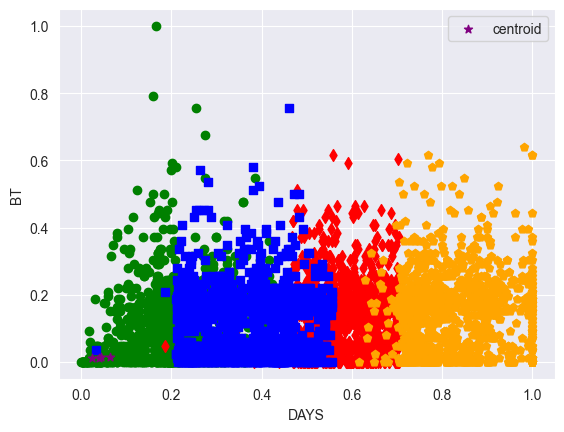

In [450]:
# Creating the Scatter Plot Visual for 4 clusters
# Choosing 'DAYS' and 'BT' to plot the scatter plot

km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df_norm)
y_predicted
df_norm['KM_CLUSTER_4'] = y_predicted

df_norm.head()

km.cluster_centers_

df1 = df_norm[df_norm.KM_CLUSTER_4==0]
df2 = df_norm[df_norm.KM_CLUSTER_4==1]
df3 = df_norm[df_norm.KM_CLUSTER_4==2]
df4 = df_norm[df_norm.KM_CLUSTER_4==3]

plt.scatter(df1['DAYS'],df1['BT'], color='green', marker='o')
plt.scatter(df2['DAYS'],df2['BT'], color='red', marker='d')
plt.scatter(df3['DAYS'],df3['BT'], color='blue', marker='s')
plt.scatter(df4['DAYS'],df4['BT'], color='orange', marker='p')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*', label = 'centroid')
plt.xlabel('DAYS')
plt.ylabel('BT')
plt.legend()


In [451]:
# 5 Clusters
df_norm['KM_CLUSTER_5'].value_counts()

KM_CLUSTER_5
1    1032
4     865
2     808
0     673
3     621
Name: count, dtype: int64

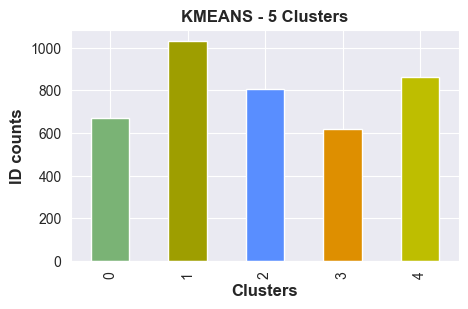

In [452]:
# 5 Clusters Count Break-up Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart to get a visualization of the count of records for each cluster
bar_colors = ['#7ab375','#9e9e00','#598eff','#de8f00','#bebe00']
fig, ax = plt.subplots(figsize=(5, 3))
df_norm.groupby(['KM_CLUSTER_5']).count()['ID'].plot(kind='bar', color=bar_colors)
plt.ylabel('ID Counts')
plt.title('KMEANS - 5 Clusters',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

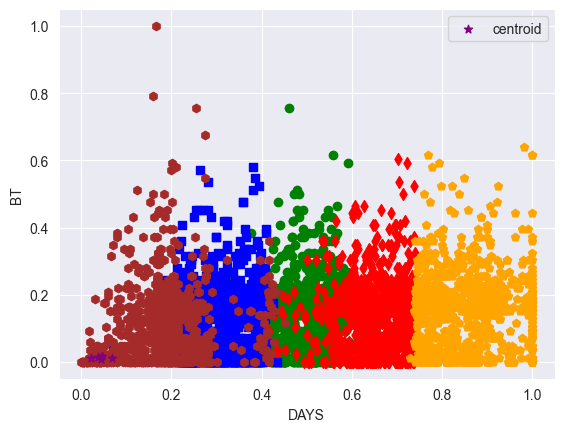

In [453]:
# Creating the Scatter Plot Visual for 5 clusters
# Choosing 'DAYS' and 'BT' to plot the scatter plot

km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df_norm)
y_predicted
df_norm['KM_CLUSTER_5'] = y_predicted

df_norm.head()

km.cluster_centers_

df1 = df_norm[df_norm.KM_CLUSTER_5==0]
df2 = df_norm[df_norm.KM_CLUSTER_5==1]
df3 = df_norm[df_norm.KM_CLUSTER_5==2]
df4 = df_norm[df_norm.KM_CLUSTER_5==3]
df5 = df_norm[df_norm.KM_CLUSTER_5==4]

plt.scatter(df1['DAYS'],df1['BT'], color='green', marker='o')
plt.scatter(df2['DAYS'],df2['BT'], color='red', marker='d')
plt.scatter(df3['DAYS'],df3['BT'], color='blue', marker='s')
plt.scatter(df4['DAYS'],df4['BT'], color='orange', marker='p')
plt.scatter(df5['DAYS'],df5['BT'], color='brown', marker='h')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*', label = 'centroid')
plt.xlabel('DAYS')
plt.ylabel('BT')
plt.legend()


In [454]:
# Added the cluster details to the 'EW_Airlines_orig_data' DataFrame. Checking it.
EW_Airlines_orig_data.head()

ID    BAL  QM  CC1  CC2  CC3     BM  BT  FM_12  FT_12  DAYS  AWARD  HC_W_4  \
0   1  28143   0    1    1    1    174   1      0      0  7000      0       0   
1   2  19244   0    1    1    1    215   2      0      0  6968      0       0   
2   3  41354   0    1    1    1   4123   4      0      0  7034      0       0   
3   4  14776   0    1    1    1    500   1      0      0  6952      0       0   
4   5  97752   0    4    1    1  43300  26   2077      4  6935      1       3   

   HC_C_4  KM_CLUSTER_2  KM_CLUSTER_3  KM_CLUSTER_4  KM_CLUSTER_5  
0       3             1             0             1             4  
1       3             1             0             1             4  
2       3             1             0             1             4  
3       3             1             0             1             4  
4       0             0             1             3             2

## **DBSCAN (Density Based Spatial Clustering of Applications with Noise)** ##

In [455]:
a_db_df_norm = pd.DataFrame()
a_db_df_norm[['BAL','QM','CC1','CC2','CC3','BM','BT','FM_12','FT_12','DAYS','AWARD']] = df_norm[['BAL','QM','CC1','CC2','CC3','BM','BT','FM_12','FT_12','DAYS','AWARD']] # Taking a copy of the normalized data
a_db_df_norm

BAL   QM   CC1  CC2  CC3        BM        BT     FM_12     FT_12  \
0     0.016508  0.0  0.00  0.0  0.0  0.000660  0.011628  0.000000  0.000000   
1     0.011288  0.0  0.00  0.0  0.0  0.000815  0.023256  0.000000  0.000000   
2     0.024257  0.0  0.00  0.0  0.0  0.015636  0.046512  0.000000  0.000000   
3     0.008667  0.0  0.00  0.0  0.0  0.001896  0.011628  0.000000  0.000000   
4     0.057338  0.0  0.75  0.0  0.0  0.164211  0.302326  0.067398  0.075472   
...        ...  ...   ...  ...  ...       ...       ...       ...       ...   
3994  0.010837  0.0  0.00  0.0  0.0  0.032330  0.046512  0.006490  0.018868   
3995  0.037766  0.0  0.00  0.0  0.0  0.003720  0.058140  0.000000  0.000000   
3996  0.043169  0.0  0.50  0.0  0.0  0.096505  0.093023  0.000000  0.000000   
3997  0.032202  0.0  0.00  0.0  0.0  0.001896  0.011628  0.016225  0.018868   
3998  0.001769  0.0  0.00  0.0  0.0  0.000000  0.000000  0.000000  0.000000   

          DAYS  AWARD  
0     0.843742    0.0  
1     0.839884    0.0  
2     0.847842    0.0  
3     0.837955    0.0  
4     0.835905    1.0  
...        ...    ...  
3994  0.168917    1.0  
3995  0.167953    1.0  
3996  0.168797    1.0  
3997  0.168676    0.0  
3998  0.168314    0.0  

[3999 rows x 11 columns]

In [456]:
# Model Building - nadb_1 - Default option
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

nadb_1 = DBSCAN()  # The default eps=0.5, min_samples=5
nadb1_pred = nadb_1.fit_predict(a_db_df_norm) # We are getting labels for clusters, -1: outlier, only 1 cluster is made i.e. cluster 0

va_b1 = pd.Series(nadb1_pred).value_counts()
print(nadb1_pred,"\n\n","Label_Count Value_Count","\n",va_b1,"\n")
print("There is 14 outliers represented as -1. The remaining 3985 are divided into 7 clusters - 0 to 6\n")

# Checking which model is good with eps=0.5 or 1 and min_samples using Silhoutte Score
# evaluate cluster with Silhouette Score
ad_ss = silhouette_score(a_db_df_norm,nadb_1.fit_predict(a_db_df_norm))# 0.24338879565909566

print(f"The Silhouette Score is - {ad_ss}")

[0 0 0 ... 1 0 0] 

 Label_Count Value_Count 
  0    2486
 1    1451
 4      16
-1      14
 2      11
 3       9
 5       6
 6       6
Name: count, dtype: int64 

There is 14 outliers represented as -1. The remaining 3985 are divided into 7 clusters - 0 to 6

The Silhouette Score is - 0.24338879565909566


epsilon: 0.25 ; labels: 18 ; min_sample: 3 ; number of clusters: 17 ; noise: 85 ; silhouette score:  0.2285636156292202
epsilon: 0.25 ; labels: 14 ; min_sample: 4 ; number of clusters: 13 ; noise: 103 ; silhouette score:  0.22809302254646494
epsilon: 0.25 ; labels: 14 ; min_sample: 5 ; number of clusters: 13 ; noise: 108 ; silhouette score:  0.2270963728761217
epsilon: 0.25 ; labels: 13 ; min_sample: 6 ; number of clusters: 12 ; noise: 115 ; silhouette score:  0.226443901379944
epsilon: 0.25 ; labels: 13 ; min_sample: 7 ; number of clusters: 12 ; noise: 123 ; silhouette score:  0.22576035695029517
epsilon: 0.25 ; labels: 12 ; min_sample: 8 ; number of clusters: 11 ; noise: 135 ; silhouette score:  0.22333234027075557
epsilon: 0.25 ; labels: 12 ; min_sample: 9 ; number of clusters: 11 ; noise: 136 ; silhouette score:  0.22340304449646575
epsilon: 0.25 ; labels: 12 ; min_sample: 10 ; number of clusters: 11 ; noise: 139 ; silhouette score:  0.22257439774040996
epsilon: 0.25 ; labels: 12 ;

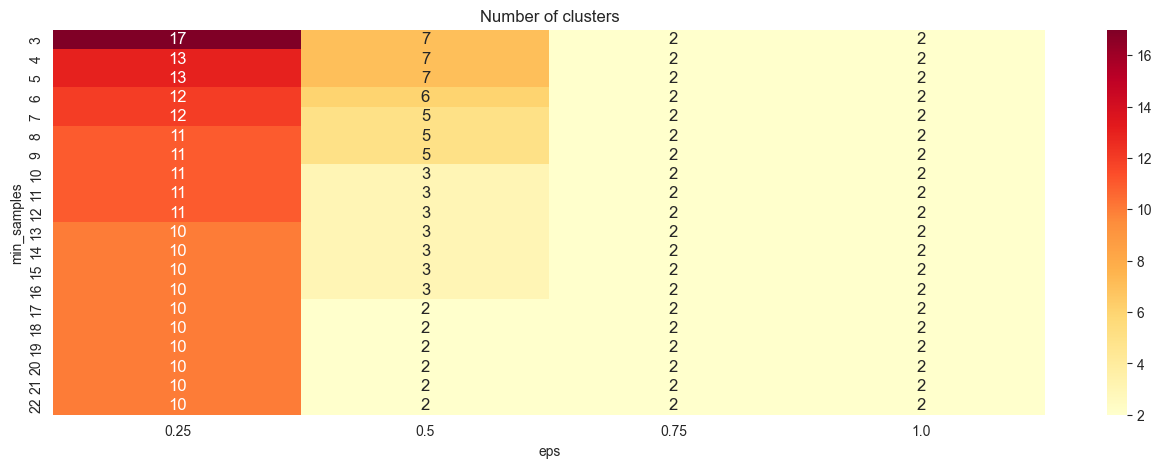


 Created the following 'Silhouette Score' matrix with eps and minmum_samples combinations

 eps              0.25      0.50      0.75      1.00
min_samples                                        
3            0.228564  0.242761  0.535931  0.535931
4            0.228093  0.242761  0.535931  0.535931
5            0.227096  0.243389  0.535931  0.535931
6            0.226444  0.242392  0.535931  0.535931
7            0.225760  0.246473  0.535931  0.535931
8            0.223332  0.246473  0.535931  0.535931
9            0.223403  0.246473  0.517334  0.535931
10           0.222574  0.334037  0.517334  0.535931
11           0.222124  0.334037  0.517334  0.535931
12           0.222523  0.334037  0.517334  0.535931
13           0.219773  0.333596  0.517334  0.535931
14           0.219794  0.333596  0.517334  0.535931
15           0.219794  0.333596  0.535736  0.535931
16           0.219794  0.333596  0.535736  0.535931
17           0.219911  0.522780  0.535736  0.535931
18           0.219598  

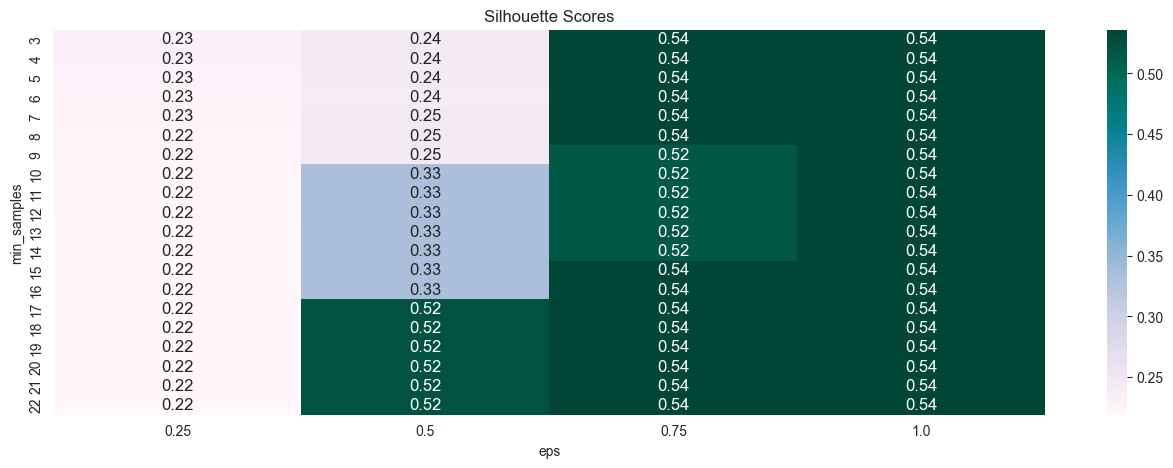

In [458]:
# Creating a heat map for the count of clusters created for different eps and min_sample combinations

a_eps = np.arange(0.25,1.25,0.25) # epsilon values
a_min_samples = np.arange(3,23)   # min_samples to be taken

clusters = []
eps = []
min_sam = []
sil_score = []
max_value = [0,0,0,0,0,0]
high_values = [0,0,0,0,0,0]

for e in (a_eps):
    for ms in (a_min_samples):
        airline_dbc = DBSCAN(eps=e, min_samples=ms).fit(a_db_df_norm)
        labels = airline_dbc.labels_
        label = len(set(labels))
        cnt_clusters = label - (1 if -1 in labels else 0) # Removing the count of outliers represented by -1
        clusters.append(cnt_clusters)
        cnt_noise = list(labels).count(-1) # All outliers or noise is represented by -1
        eps.append(e)
        min_sam.append(ms)
        ss = silhouette_score(a_db_df_norm, airline_dbc.fit_predict(a_db_df_norm), metric='euclidean')
        sil_score.append(ss)

        
        print("epsilon:",np.round(e,2),"; labels:", label, "; min_sample:", ms,"; number of clusters:", cnt_clusters,"; noise:", cnt_noise,"; silhouette score: ", ss)

        if (ss > max_value[5]):
            max_value=(e,label,ms,cnt_clusters,cnt_noise,ss)

print(f"\n\nThe best combination is -", "epsilon:",np.round(max_value[0],2),"; labels:", max_value[1], "; min_sample:",max_value[2],"; number of clusters:", max_value[3],"; noise:", max_value[4],"; silhouette score: ", max_value[5]) # 0.2257103196361524


al_sc_plt_data = pd.DataFrame(columns=['clusters','min_samples'])
al_sc_plt_data['clusters'] = clusters
al_sc_plt_data['eps'] = eps
al_sc_plt_data['min_samples'] = min_sam
al_sc_plt_data['silhouette_score'] = sil_score

al_clust_matrix = pd.pivot_table(al_sc_plt_data, index="min_samples", columns="eps", values="clusters")
print("\n","Created the following \'Clusters\' matrix with eps and minmum_samples combinations\n\n", al_clust_matrix)
print("\n","The following heat map shows the plotting for the clusters created using the different eps and minimum_samples combination")
fig, ax = plt.subplots(figsize=(16,5))
sns.heatmap(al_clust_matrix, annot=True, annot_kws={"size": 12}, cmap='YlOrRd', ax=ax)
plt.title('Number of clusters')
plt.show()

al_sil_matrix = pd.pivot_table(al_sc_plt_data, index="min_samples", columns="eps", values="silhouette_score")
print("\n","Created the following \'Silhouette Score\' matrix with eps and minmum_samples combinations\n\n", al_sil_matrix)
print("\n","The following heat map shows the plotting for the Silhouette Score for different eps and minimum_samples combination")
fig, ax = plt.subplots(figsize=(16,5))
sns.heatmap(al_sil_matrix, annot=True, annot_kws={"size": 12}, cmap='PuBuGn', ax=ax)
plt.title('Silhouette Scores')
plt.show()

#### **INFERENCES** ####
- The number of clusters that can be created are varying from **2 to 18 clusters**
- The **best silhouette score** is seen for **eps values above 0.75**, irrespective of the number of samples.
- So the best is to choose **eps=1** and **min_samples=22**

In [459]:
# Let's take the best model as the one created with eps = 1 and min_samples = 22

al_dbscan_final = DBSCAN(eps=1, min_samples=22)
al_dbscan_final_pred = al_dbscan_final.fit_predict(a_db_df_norm) # We are getting labels for clusters, -1: outlier, only 1 cluster is made i.e. cluster 0
al_vc_final = pd.Series(al_dbscan_final_pred).value_counts()
print(al_dbscan_final_pred,"\n\n","Label_Count Value_Count","\n",al_vc_final,"\n")
print("The best model consists of 2 clusters -\nCluster 0 - 2510\nCluster 1 - 1481")

# Adding the cluster details to the 'crime_orig_data' DataFrame 
EW_Airlines_orig_data['DBSCAN_NORMALIZED'] = al_dbscan_final_pred

[0 0 0 ... 1 0 0] 

 Label_Count Value_Count 
 0    2518
1    1481
Name: count, dtype: int64 

The best model consists of 2 clusters -
Cluster 0 - 2510
Cluster 1 - 1481


In [460]:
# Viewing the Original DataFrame including the newly added cluster column 'DBSCAN_NORMALIZED'
EW_Airlines_orig_data.head()

ID    BAL  QM  CC1  CC2  CC3     BM  BT  FM_12  FT_12  DAYS  AWARD  HC_W_4  \
0   1  28143   0    1    1    1    174   1      0      0  7000      0       0   
1   2  19244   0    1    1    1    215   2      0      0  6968      0       0   
2   3  41354   0    1    1    1   4123   4      0      0  7034      0       0   
3   4  14776   0    1    1    1    500   1      0      0  6952      0       0   
4   5  97752   0    4    1    1  43300  26   2077      4  6935      1       3   

   HC_C_4  KM_CLUSTER_2  KM_CLUSTER_3  KM_CLUSTER_4  KM_CLUSTER_5  \
0       3             1             0             1             4   
1       3             1             0             1             4   
2       3             1             0             1             4   
3       3             1             0             1             4   
4       0             0             1             3             2   

   DBSCAN_NORMALIZED  
0                  0  
1                  0  
2                  0  
3                  0  
4                  1

In [461]:
EW_Airlines_orig_data.groupby('DBSCAN_NORMALIZED').agg(['mean'])

ID           BAL          QM       CC1      CC2  \
                          mean          mean        mean      mean     mean   
DBSCAN_NORMALIZED                                                             
0                  2173.169182  59807.839555   87.602462  1.705322  1.01390   
1                  1745.592843  97053.051317  240.196489  2.661715  1.01553   

                        CC3            BM         BT       FM_12     FT_12  \
                       mean          mean       mean        mean      mean   
DBSCAN_NORMALIZED                                                            
0                  1.008737  10227.689039   9.142971  226.292295  0.652502   
1                  1.018231  28905.414585  15.782579  857.501013  2.599595   

                          DAYS AWARD    HC_W_4    HC_C_4 KM_CLUSTER_2  \
                          mean  mean      mean      mean         mean   
DBSCAN_NORMALIZED                                                       
0                  3820.652105   0.0  0.641779  2.679110          1.0   
1                  4625.062120   1.0  1.722485  0.638758          0.0   

                  KM_CLUSTER_3 KM_CLUSTER_4 KM_CLUSTER_5  
                          mean         mean         mean  
DBSCAN_NORMALIZED                                         
0                     0.493249     1.246624     2.523828  
1                     1.000000     1.636732     1.091155

## ***Clustering for Crime Data*** ##
### **Clustering (hierarchical,K means clustering and DBSCAN) for the Crime data to obtain optimum number of clusters** ###

crime_data.csv

In [462]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch # to build dendrogram and build the plotting
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


palette_color = sns.color_palette('rainbow')
import warnings
warnings.filterwarnings('ignore')

### **Importing data from file crime_data.csv**

In [463]:
# Reading the data from the file 'bank-full.csv'
crime_orig_data = pd.read_csv("crime_data.csv")
crime_orig_data.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

### **EDA (Exploratory Data Analysis)**

In [464]:
crime_orig_data.shape

(50, 5)

#### *Descriptive Analysis* ####

In [465]:
crime_orig_data.describe()

Murder     Assault   UrbanPop       Rape
count  50.00000   50.000000  50.000000  50.000000
mean    7.78800  170.760000  65.540000  21.232000
std     4.35551   83.337661  14.474763   9.366385
min     0.80000   45.000000  32.000000   7.300000
25%     4.07500  109.000000  54.500000  15.075000
50%     7.25000  159.000000  66.000000  20.100000
75%    11.25000  249.000000  77.750000  26.175000
max    17.40000  337.000000  91.000000  46.000000

In [466]:
crime_orig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


#### *Checking for missing values*

In [467]:
# check for missing values
crime_orig_data.isna().sum() # The result shows that there are no missing values

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

#### *Checking for Null Values*

In [468]:
# Checking to see if there are any null values
# We can get this information using tc_data.info() option as well
crime_orig_data.isnull().sum() # The result shows that there are no null values

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

#### *Checking for duplicates*

In [469]:
# Checking for Duplicate Values
crime_orig_data.duplicated()  # if any 2 rows has same values

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [470]:
# Count of duplicated rows
crime_orig_data[crime_orig_data.duplicated()].shape # We see that there are no duplicates

(0, 5)

#### *Rename Columns*

In [471]:
crime_orig_data.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [472]:
# Renaming 'Unnamed: 0' to 'STATE', 'Murder' to 'MURDER', 'Assault' to 'ASSAULT', 'Rape' to 'RAPE', 'UrbanPop' to "POPULATION"
crime_orig_data.rename(columns = {'Unnamed: 0':'STATE','Murder':'MURDER','Assault':'ASSAULT', 'UrbanPop':'U_POPULATION', 'Rape':'RAPE'}, inplace = True)
crime_orig_data.head()

STATE  MURDER  ASSAULT  U_POPULATION  RAPE
0     Alabama    13.2      236            58  21.2
1      Alaska    10.0      263            48  44.5
2     Arizona     8.1      294            80  31.0
3    Arkansas     8.8      190            50  19.5
4  California     9.0      276            91  40.6

#### *Checking the data structure* ####

In [473]:
# Data Structure
print(type(crime_orig_data))
crime_orig_data.shape

<class 'pandas.core.frame.DataFrame'>


(50, 5)

In [474]:
# Checking data types
crime_orig_data.dtypes # check data types of all variables

STATE            object
MURDER          float64
ASSAULT           int64
U_POPULATION      int64
RAPE            float64
dtype: object

In [475]:
crime_data = crime_orig_data.iloc[:,1:] # Ignoring the column ID as it has less relevance
crime_data.head()

MURDER  ASSAULT  U_POPULATION  RAPE
0    13.2      236            58  21.2
1    10.0      263            48  44.5
2     8.1      294            80  31.0
3     8.8      190            50  19.5
4     9.0      276            91  40.6

#### **Visualizations** ####

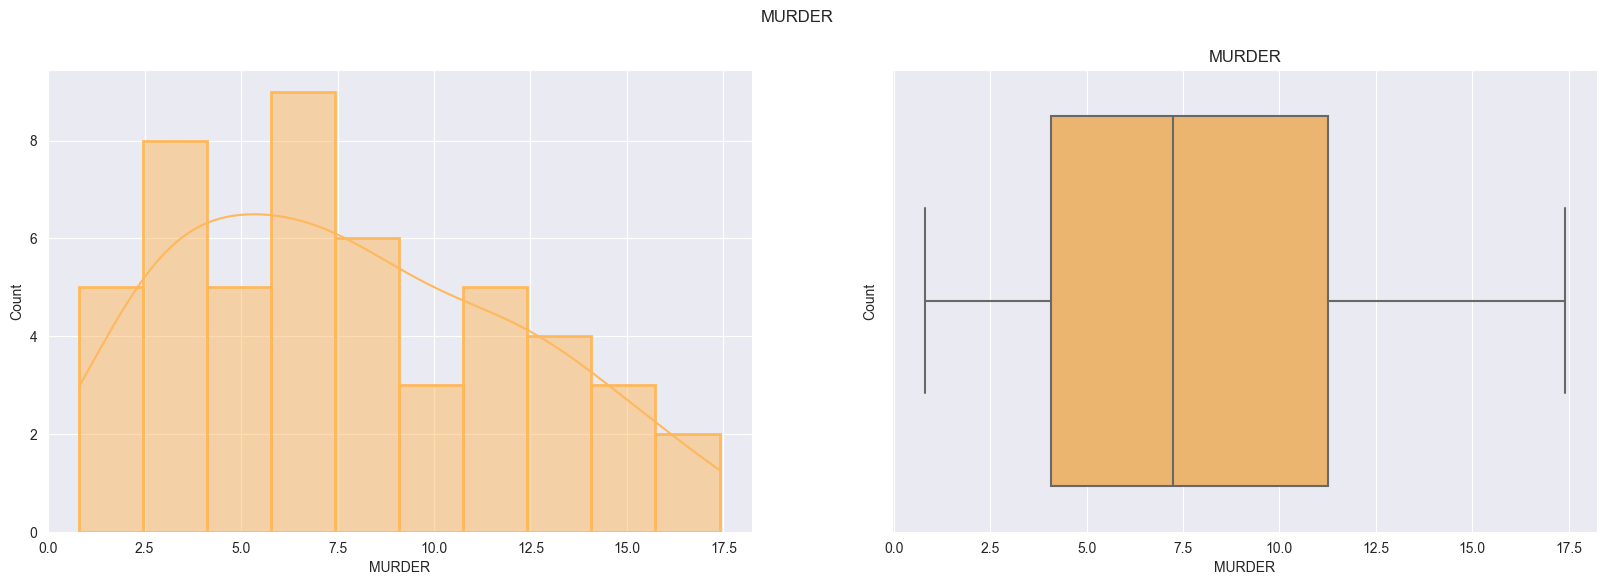

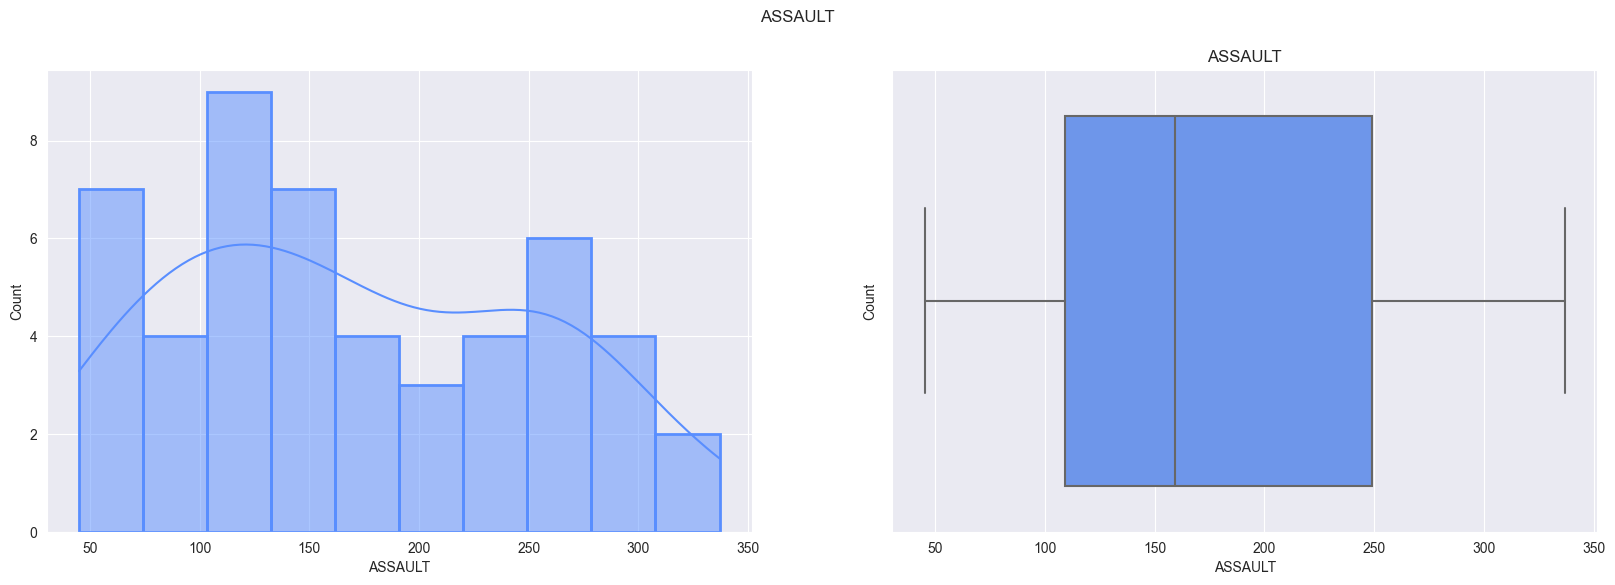

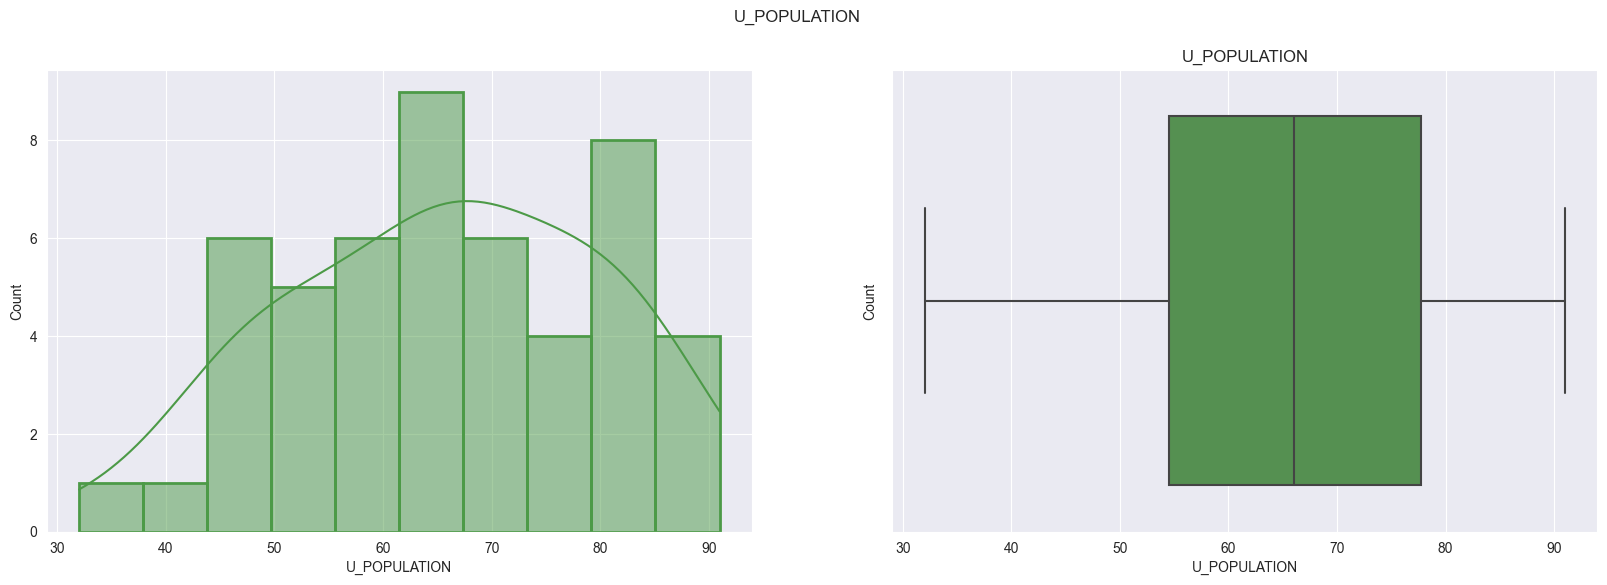

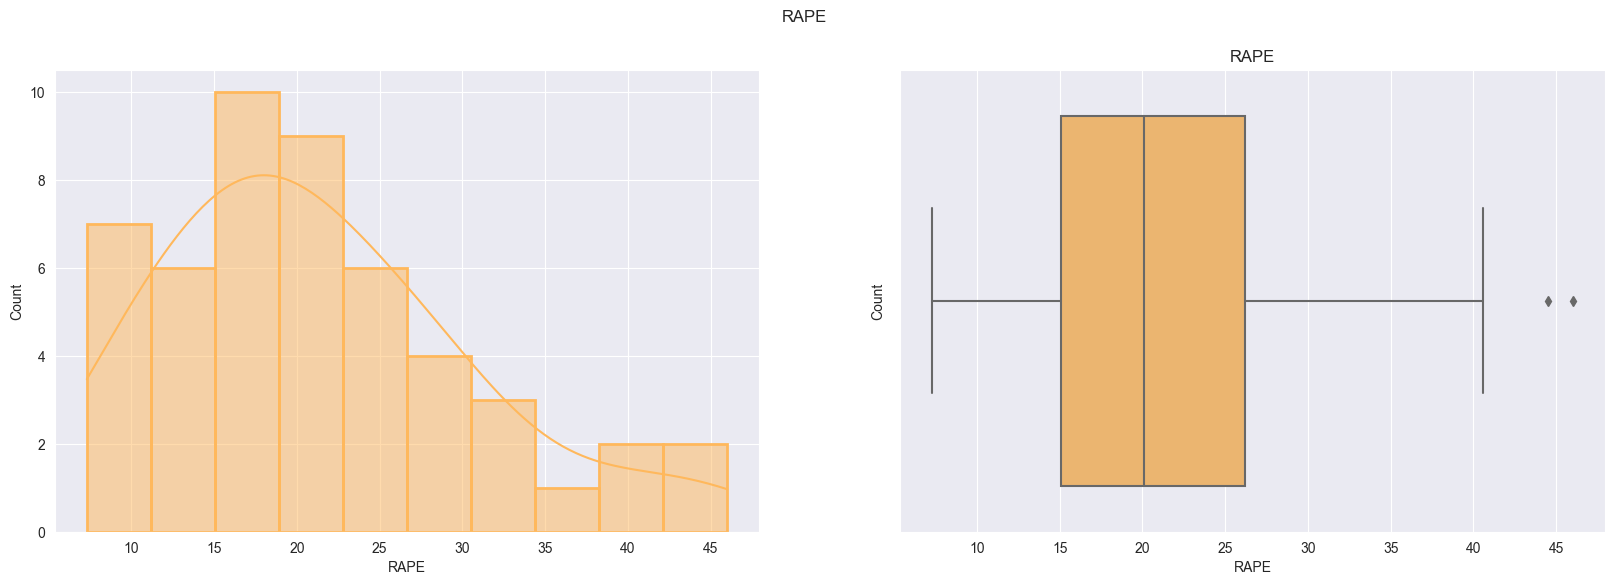

In [476]:
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pylab
def plot_data(data,feature):

    # Using Matplotlib

    #plt.figure(figsize=(16,6))
    #plt.subplot(1,2,1)
    #data[feature].hist()
    #plt.subplot(1,2,2)
    #plt.boxplot(data[feature])
    
    
    # Seaborn
    plt.figure(figsize=(20,6))
    plt.subplot(1,2,1)
    sns.histplot(data, x=feature, color=color, edgecolor=color, linewidth=2, bins=10, kde=True)

    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=feature, color=color)
    plt.ylabel('Count')
    plt.suptitle(feature)

for cols in crime_data.columns:
    colors = ['#4c9a47','#90c08c','#598eff','#636300','#74a3ff','#bebe00','#7ab375','#808000','#0541ff','#9e9e00','#ffc274','#de8f00','#64a65e','#2260ff','#ffb85c','#3e78ff']
    color = random.choice(colors)
    plot_data(crime_data,cols)
    plt.title(cols)

### **Checking the Correllation between columns** ###

In [477]:
crime_data.corr()

MURDER   ASSAULT  U_POPULATION      RAPE
MURDER        1.000000  0.801873      0.069573  0.563579
ASSAULT       0.801873  1.000000      0.258872  0.665241
U_POPULATION  0.069573  0.258872      1.000000  0.411341
RAPE          0.563579  0.665241      0.411341  1.000000

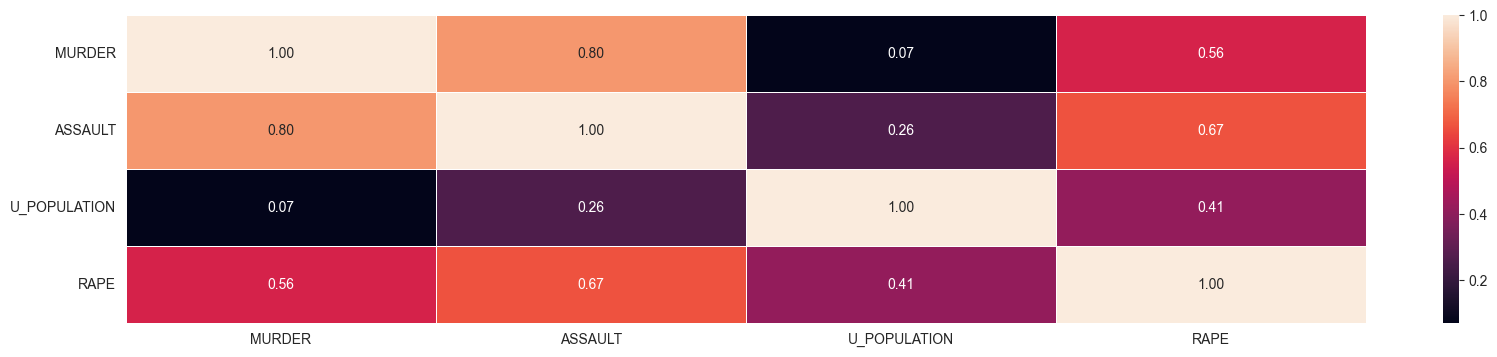

In [478]:
# Correlation Heatmap
f,ax = plt.subplots(figsize=(20,4))
sns.heatmap(crime_data.corr(), annot=True, linewidths =.5, fmt ='.2f',ax=ax)
plt.show()

#### **Inferences:** ####
1. There is high positive correlation between **MURDER** and **ASSAULT**
2.  There is positive correlation between **RAPE** and **ASSAULT**
3.  There is a positive correlation between **MURDER** and **RAPE**

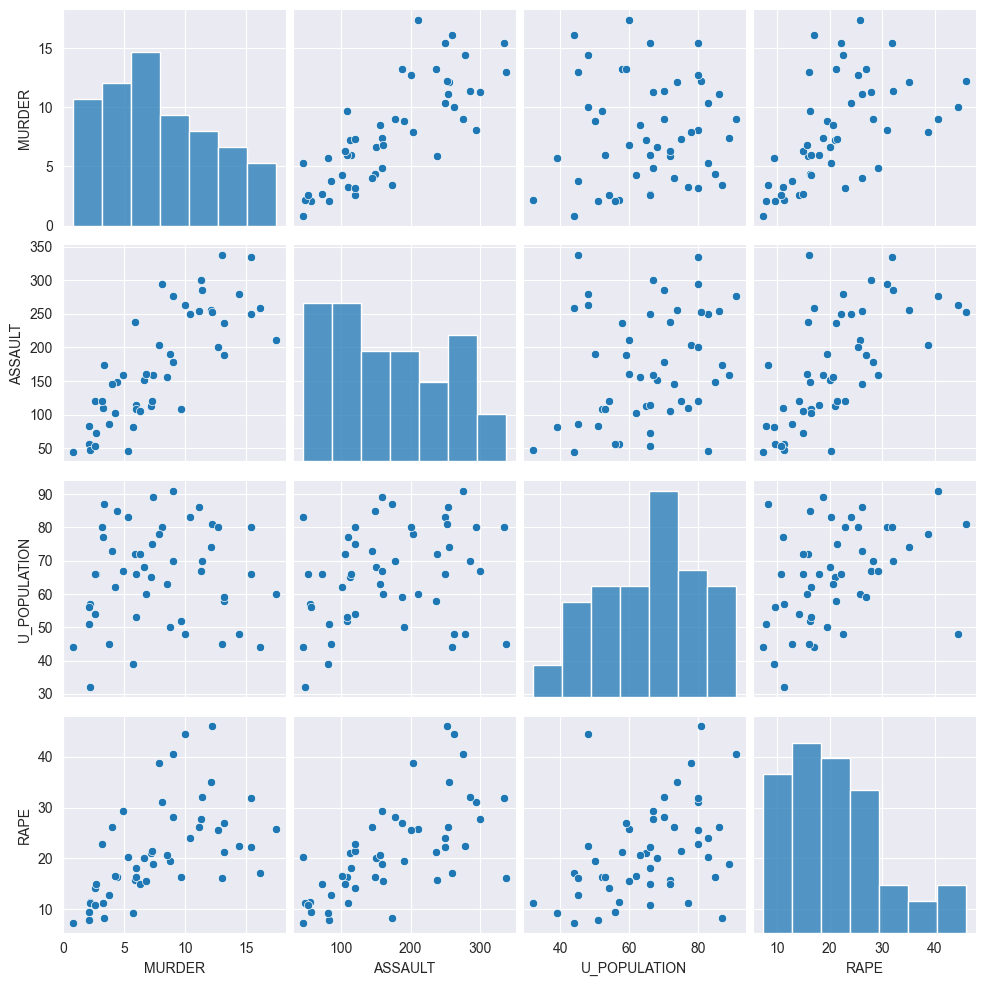

In [479]:
# Format the plot background and scatter plots for all the variables
# The above inferences are seen visually in the below scatter plots
sns.set_style(style='darkgrid')
sns.pairplot(crime_data)

### **Normalization of the data using MinMaxScaler Function** ###

In [480]:
c_df_norm = crime_data.copy()


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
c_df_norm = pd.DataFrame()

c_df_norm[['MURDER','ASSAULT','U_POPULATION','RAPE']] = scaler.fit_transform(crime_orig_data[['MURDER','ASSAULT','U_POPULATION','RAPE']])
c_df_norm.head()

MURDER   ASSAULT  U_POPULATION      RAPE
0  0.746988  0.654110      0.440678  0.359173
1  0.554217  0.746575      0.271186  0.961240
2  0.439759  0.852740      0.813559  0.612403
3  0.481928  0.496575      0.305085  0.315245
4  0.493976  0.791096      1.000000  0.860465

## **HIERARCHICAL CLUSTERING** ##

In [481]:
c_hc_df_norm = pd.DataFrame()
c_hc_df_norm[['MURDER','ASSAULT','U_POPULATION','RAPE']] = c_df_norm[['MURDER','ASSAULT','U_POPULATION','RAPE']]

In [482]:
c_hc_df_norm.head()

MURDER   ASSAULT  U_POPULATION      RAPE
0  0.746988  0.654110      0.440678  0.359173
1  0.554217  0.746575      0.271186  0.961240
2  0.439759  0.852740      0.813559  0.612403
3  0.481928  0.496575      0.305085  0.315245
4  0.493976  0.791096      1.000000  0.860465

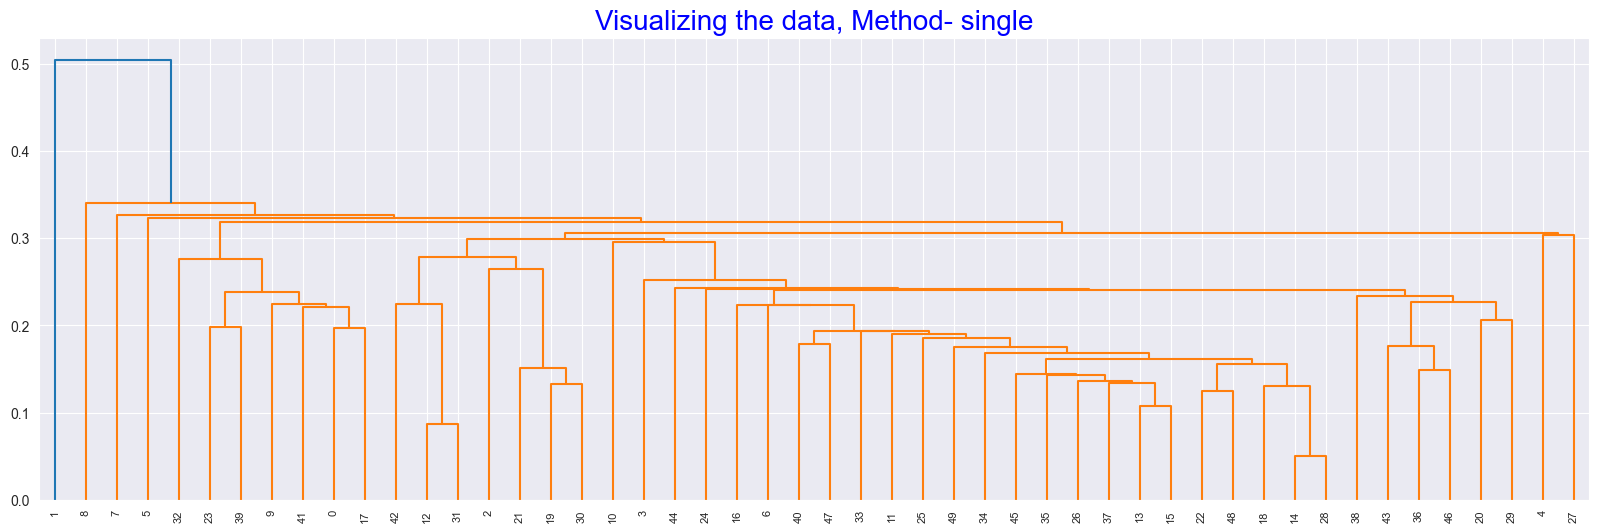

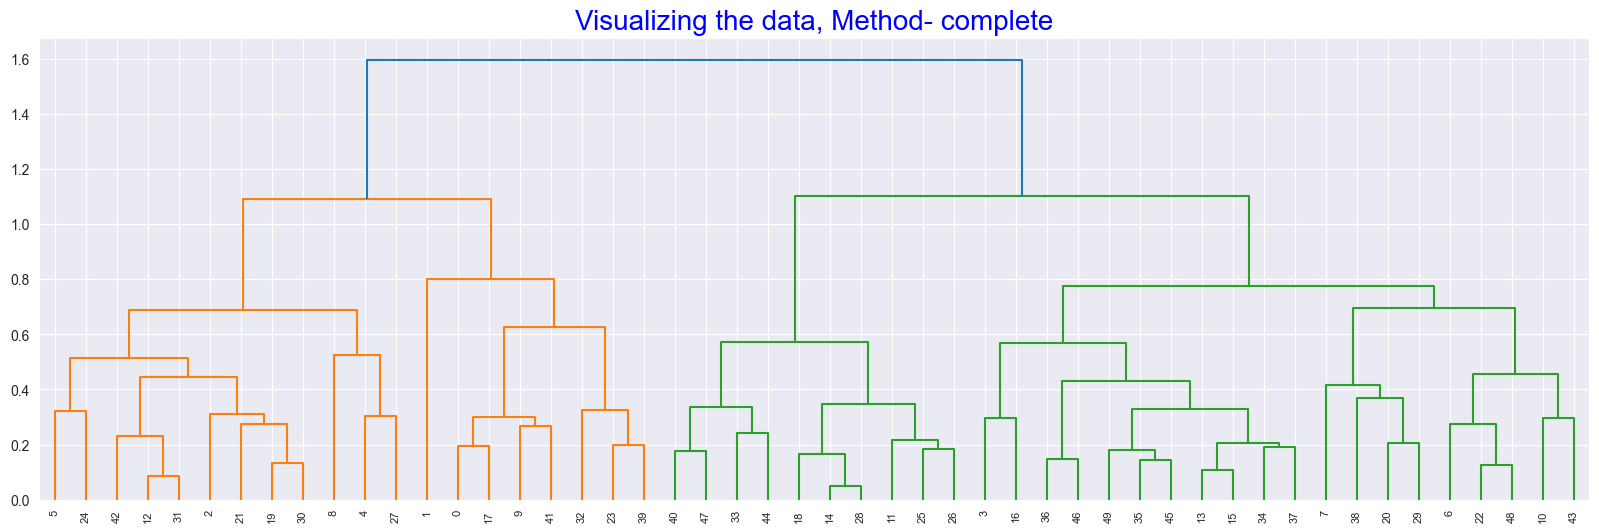

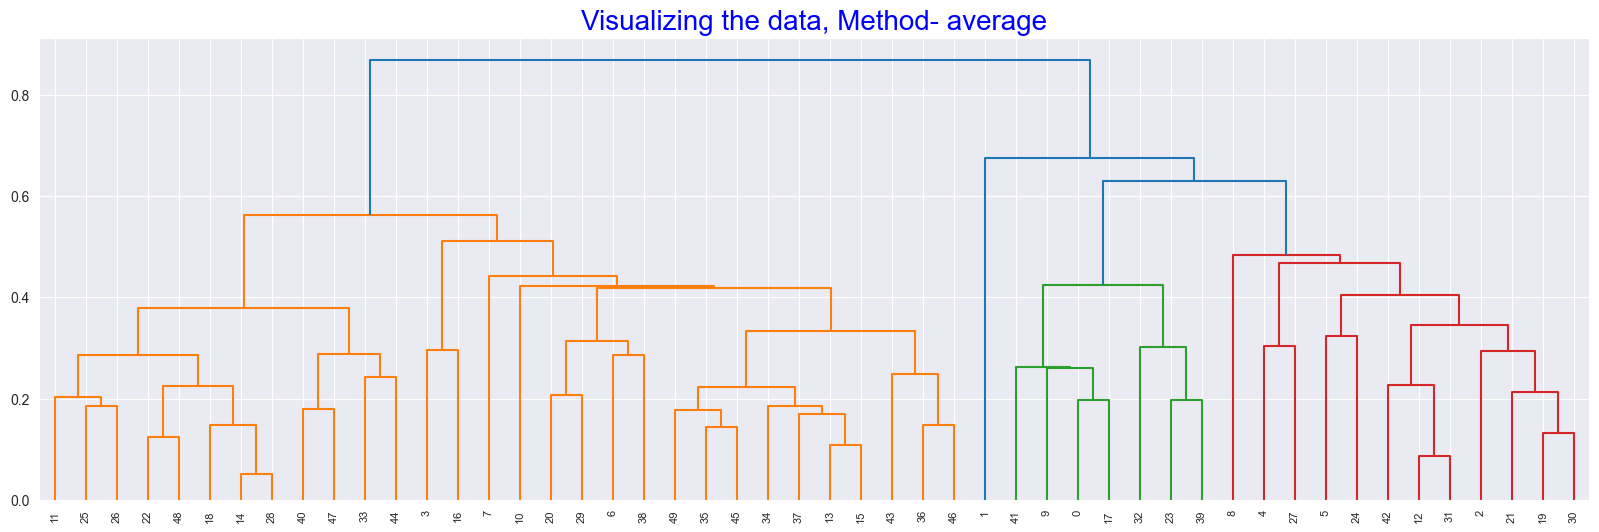

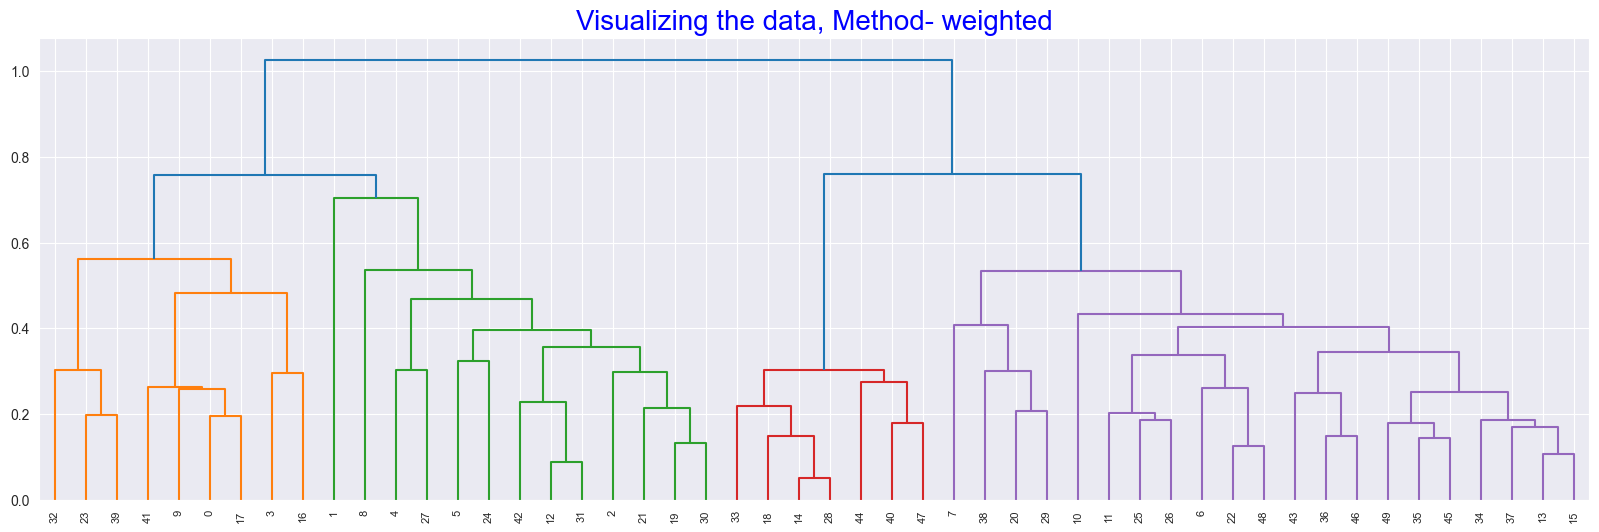

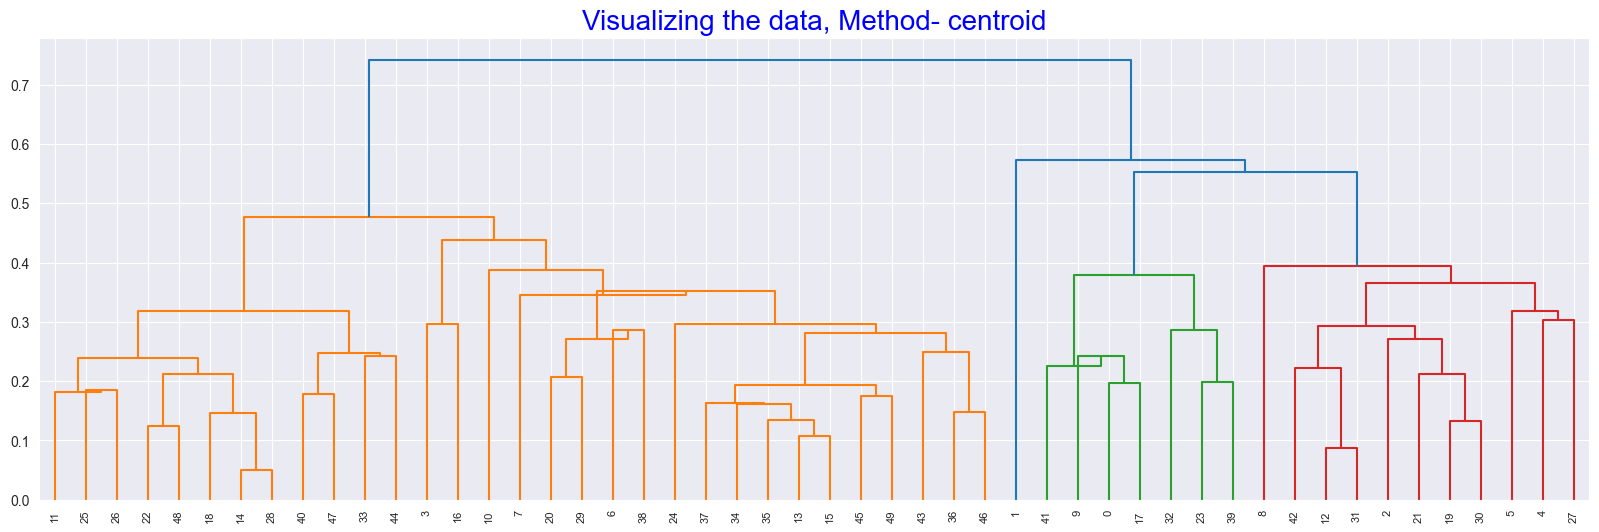

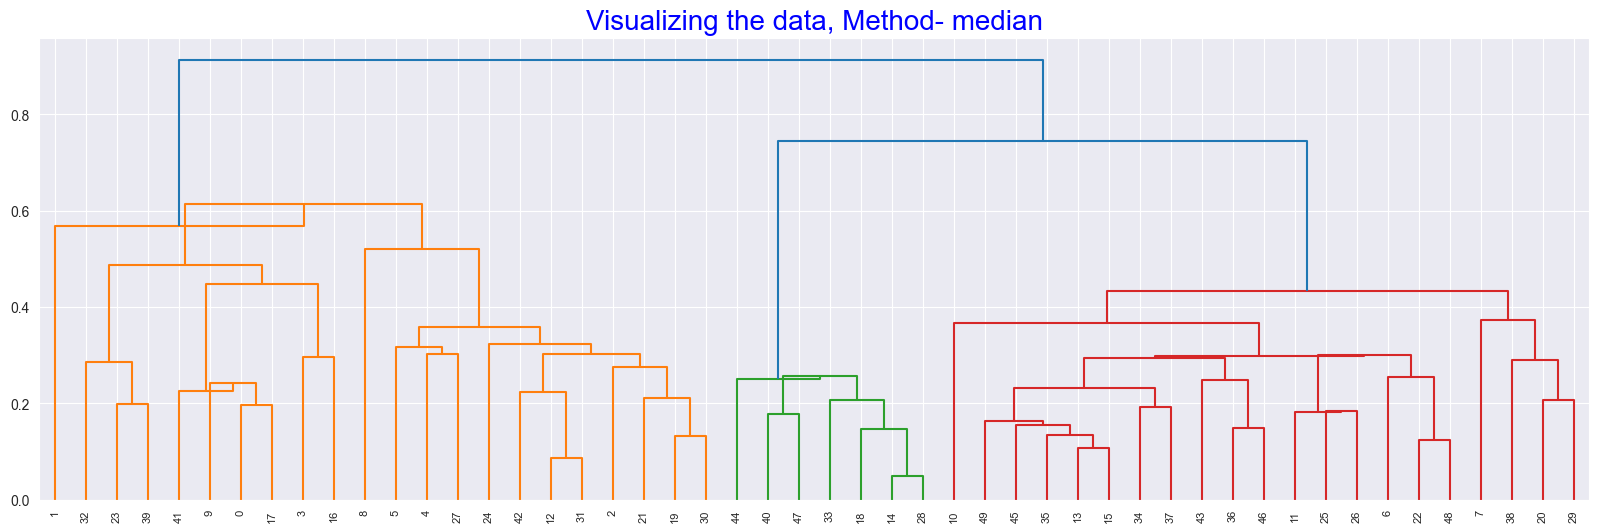

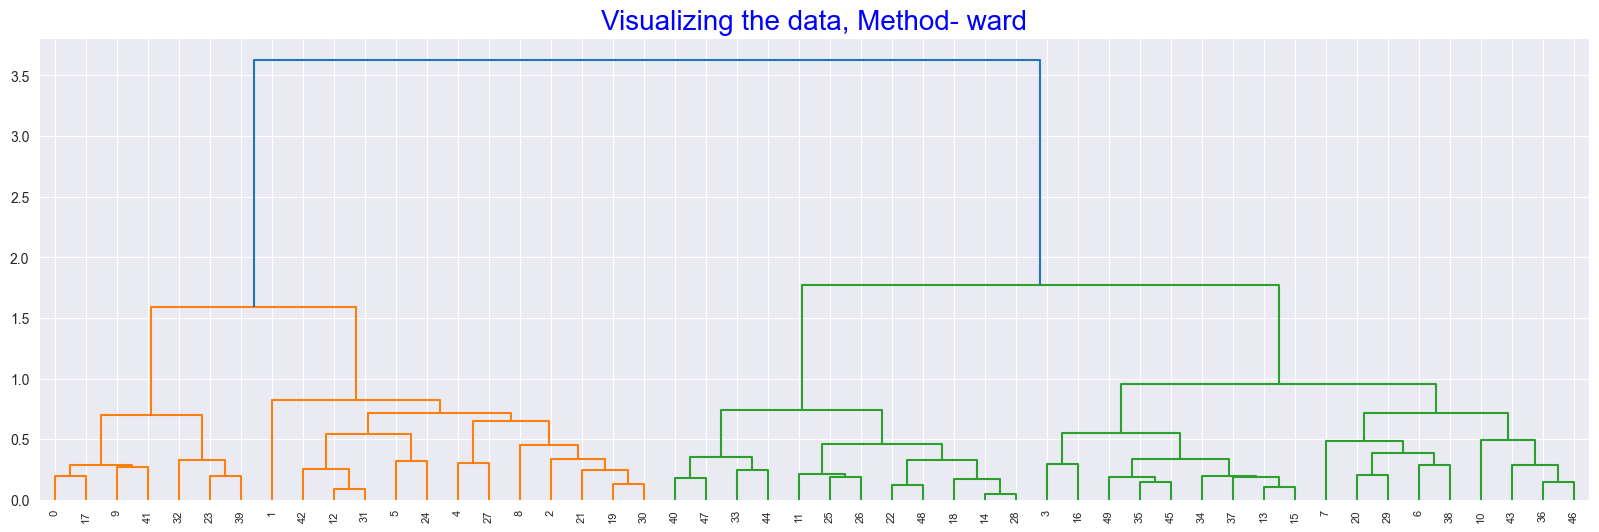

In [483]:
# Applying Dendrogram on the normalized data.
# We are using different linkage methods for understanding it better. 
# Finding the number of clusters using color coding of dendrogram. Each color indicates one cluster.

import scipy.cluster.hierarchy as sch # to build dendrogram and build the plotting

for methods in ['single','complete','average','weighted','centroid','median','ward']:
    plt.figure(figsize =(20, 6))
    dict = {'fontsize':20,'fontweight':10, 'color':'blue'}
    plt.title('Visualizing the data, Method- {}'.format(methods),fontdict = dict)
    dendrogram = sch.dendrogram(sch.linkage(c_hc_df_norm, method=methods,optimal_ordering=False))

#### **Inferences:** ####
1. Based on the visualization, we see that the model which best demarkates the clusters is the 'ward' method.
2. The next best alternative method appears to be the 'complete' method, which demarkates the clusters in a better way.
3. The next best alternative method appears to be the 'weighted' method, which also demarkates the clusters effectively.

Based on the Elbow Chart we see that best option is to take **4 clusters** and alternatively **5 clusters**

To be on the same side, we can go for 4 or 5 clusters. However, there is no harm with going for 2 or 3 clusters.

*It does not make any sense to go for >5 clusters.*

### **Creation of the Model** ###

### ***4 Clusters using 'Ward' Method*** ###

In [484]:
# Creating clusters based on the inferences gathered - creating 4 clusters using 'ward' method
c_model_hc_4 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'ward')
c_model_hc_4

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [485]:
# Saving the data for 4 clusters using 'ward' method
c_y_hc_4 = c_model_hc_4.fit_predict(c_hc_df_norm) # Applying fit_predict method on dataset c_hc_df_norm. We will get cluster nos. in c_y_hc_4
clusters_w_4=pd.DataFrame(c_y_hc_4,columns=['HC_W_4']) # Saving the cluster numbers in clusters_w_4 to update original dataframe
clusters_w_4.head()

HC_W_4
0       3
1       1
2       1
3       0
4       1

In [486]:
# Now let us map this cluster membership to the data points
crime_orig_data['HC_W_4'] = clusters_w_4
c_hc_df_norm['HC_W_4'] = clusters_w_4
crime_orig_data.head()

STATE  MURDER  ASSAULT  U_POPULATION  RAPE  HC_W_4
0     Alabama    13.2      236            58  21.2       3
1      Alaska    10.0      263            48  44.5       1
2     Arizona     8.1      294            80  31.0       1
3    Arkansas     8.8      190            50  19.5       0
4  California     9.0      276            91  40.6       1

### ***4 Clusters using 'Complete' Method*** ###

In [487]:
# Creating clusters based on the inferences gathered - creating 4 clusters using complete method
c_model_hcc_4 = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')
c_model_hcc_4

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [488]:
# Saving the data for 5 clusters using 'complete' method
c_y_hcc_4 = c_model_hcc_4.fit_predict(c_hc_df_norm) # Apply fit_predict method on dataset c_hc_df_norm. We will get cluster nos. in c_y_hcc_4
clusters_c_4=pd.DataFrame(c_y_hcc_4,columns=['HC_C_4']) # Append those no. of cluster numbers to create dataframe
clusters_c_4.head()

HC_C_4
0       3
1       0
2       0
3       1
4       0

In [489]:
# Now let us map this cluster membership to the data points
crime_orig_data['HC_C_4'] = clusters_c_4
c_hc_df_norm['HC_C_4'] = clusters_c_4
crime_orig_data.head()

STATE  MURDER  ASSAULT  U_POPULATION  RAPE  HC_W_4  HC_C_4
0     Alabama    13.2      236            58  21.2       3       3
1      Alaska    10.0      263            48  44.5       1       0
2     Arizona     8.1      294            80  31.0       1       0
3    Arkansas     8.8      190            50  19.5       0       1
4  California     9.0      276            91  40.6       1       0

### ***5 Clusters using 'Ward' Method*** ###

In [490]:
# Creating clusters based on the inferences gathered - creating 5 clusters using 'ward' method
c_model_hc_5 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
c_model_hc_5

AgglomerativeClustering(affinity='euclidean', n_clusters=5)

In [491]:
# Saving the data for 5 clusters using 'ward' method
c_y_hc_5 = c_model_hc_5.fit_predict(c_hc_df_norm) # Applying fit_predict method on dataset c_hc_df_norm. We will get cluster nos. in c_y_hc_5
clusters_w_5=pd.DataFrame(c_y_hc_5,columns=['HC_W_5']) # Saving the cluster numbers in clusters_w_5 to update original dataframe
clusters_w_5.head()

HC_W_5
0       3
1       0
2       0
3       4
4       0

In [492]:
# Now let us map this cluster membership to the data points
crime_orig_data['HC_W_5'] = clusters_w_5
c_hc_df_norm['HC_W_5'] = clusters_w_5
crime_orig_data.head()

STATE  MURDER  ASSAULT  U_POPULATION  RAPE  HC_W_4  HC_C_4  HC_W_5
0     Alabama    13.2      236            58  21.2       3       3       3
1      Alaska    10.0      263            48  44.5       1       0       0
2     Arizona     8.1      294            80  31.0       1       0       0
3    Arkansas     8.8      190            50  19.5       0       1       4
4  California     9.0      276            91  40.6       1       0       0

### ***5 Clusters using 'Complete' Method*** ###

In [493]:
# Creating clusters based on the inferences gathered - creating 5 clusters using complete method
c_model_hcc_5 = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'complete')
c_model_hcc_5

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [494]:
# Saving the data for 5 clusters using 'complete' method
c_y_hcc_5 = c_model_hcc_5.fit_predict(c_hc_df_norm) # Apply fit_predict method on dataset c_hc_df_norm. We will get cluster nos. in c_y_hcc_5
clusters_c_5=pd.DataFrame(c_y_hcc_5,columns=['HC_C_5']) # Append those no. of cluster numbers to create dataframe
clusters_c_5.head()

HC_C_5
0       2
1       0
2       0
3       4
4       0

In [495]:
# Now let us map this cluster membership to the data points
crime_orig_data['HC_C_5'] = clusters_c_5
c_hc_df_norm['HC_C_5'] = clusters_c_5
crime_orig_data.head()

STATE  MURDER  ASSAULT  U_POPULATION  RAPE  HC_W_4  HC_C_4  HC_W_5  \
0     Alabama    13.2      236            58  21.2       3       3       3   
1      Alaska    10.0      263            48  44.5       1       0       0   
2     Arizona     8.1      294            80  31.0       1       0       0   
3    Arkansas     8.8      190            50  19.5       0       1       4   
4  California     9.0      276            91  40.6       1       0       0   

   HC_C_5  
0       2  
1       0  
2       0  
3       4  
4       0

### **Visualization** ###

In [496]:
# 4 Clusters 'Ward' Method
c_hc_df_norm['HC_W_4'].value_counts()

HC_W_4
0    18
1    13
2    12
3     7
Name: count, dtype: int64

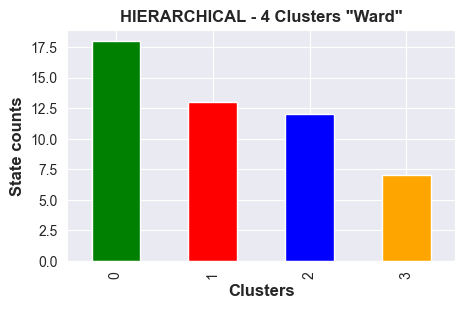

In [497]:
# 4 Clusters 'Ward' Method, Count Break-up Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart to get a visualization of the count of records for each cluster
bar_colors = ['green', 'red', 'blue', 'orange']
fig, ax = plt.subplots(figsize=(5, 3))
crime_orig_data.groupby(['HC_W_4']).count()['STATE'].plot(kind='bar', color=bar_colors)
plt.ylabel('ID Counts')
plt.title('HIERARCHICAL - 4 Clusters "Ward"',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('State counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()


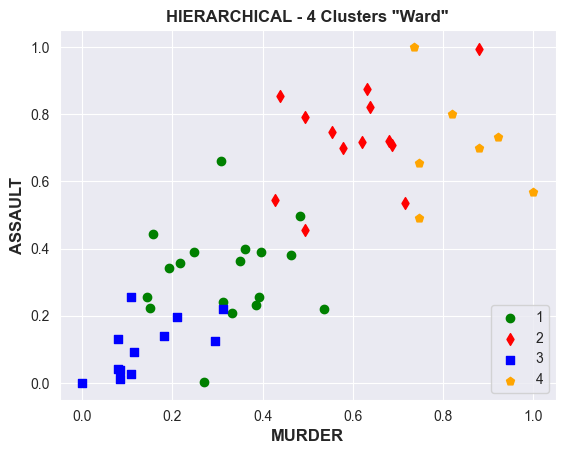

In [498]:
# Scatter Plot Visual for 4 Clusters 'Ward' Method
# Choosing Assault and Murder to plot the scatter plot


c_hc_df_norm.head()

df1 = c_hc_df_norm[c_hc_df_norm.HC_W_4==0]
df2 = c_hc_df_norm[c_hc_df_norm.HC_W_4==1]
df3 = c_hc_df_norm[c_hc_df_norm.HC_W_4==2]
df4 = c_hc_df_norm[c_hc_df_norm.HC_W_4==3]

plt.scatter(df1['MURDER'],df1['ASSAULT'], color='green', marker='o', label='1')
plt.scatter(df2['MURDER'],df2['ASSAULT'], color='red', marker='d', label='2')
plt.scatter(df3['MURDER'],df3['ASSAULT'], color='blue', marker='s', label='3')
plt.scatter(df4['MURDER'],df4['ASSAULT'], color='orange', marker='p', label='4')

plt.title('HIERARCHICAL - 4 Clusters "Ward"',fontsize='large',fontweight='bold')
plt.xlabel('MURDER', fontsize='large', fontweight='bold')
plt.ylabel('ASSAULT', fontsize='large', fontweight='bold')

plt.legend(loc='lower right')


In [499]:
# 4 Clusters 'Complete' Method
c_hc_df_norm['HC_C_4'].value_counts()

HC_C_4
1    18
0    13
2    12
3     7
Name: count, dtype: int64

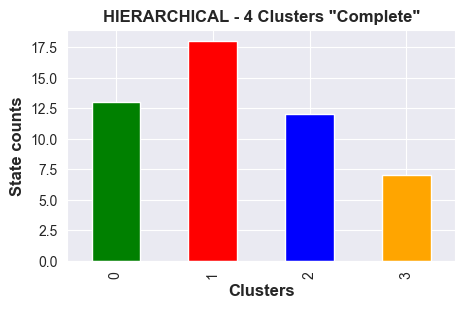

In [500]:
# 4 Clusters 'Complete' Method, Count Break-up Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart to get a visualization of the count of records for each cluster
bar_colors = ['green','red','blue','orange']
fig, ax = plt.subplots(figsize=(5, 3))
crime_orig_data.groupby(['HC_C_4']).count()['STATE'].plot(kind='bar', color=bar_colors)
plt.ylabel('ID Counts')
plt.title('HIERARCHICAL - 4 Clusters "Complete"',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('State counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()


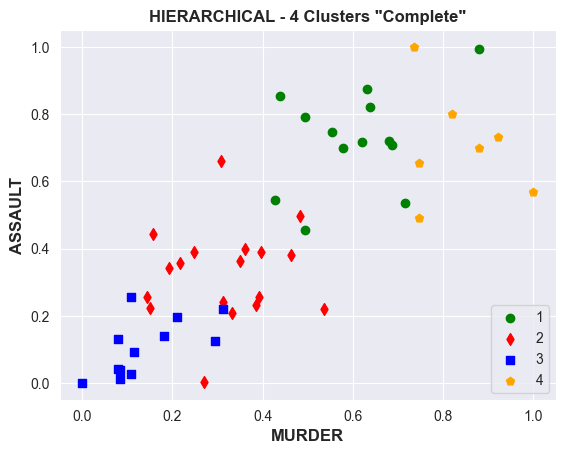

In [501]:
# Scatter Plot Visual for 4 Clusters 'Complete' Method
# Choosing Assault and Murder to plot the scatter plot


c_hc_df_norm.head()

df1 = c_hc_df_norm[c_hc_df_norm.HC_C_4==0]
df2 = c_hc_df_norm[c_hc_df_norm.HC_C_4==1]
df3 = c_hc_df_norm[c_hc_df_norm.HC_C_4==2]
df4 = c_hc_df_norm[c_hc_df_norm.HC_C_4==3]

plt.scatter(df1['MURDER'],df1['ASSAULT'], color='green', marker='o', label='1')
plt.scatter(df2['MURDER'],df2['ASSAULT'], color='red', marker='d', label='2')
plt.scatter(df3['MURDER'],df3['ASSAULT'], color='blue', marker='s', label='3')
plt.scatter(df4['MURDER'],df4['ASSAULT'], color='orange', marker='p', label='4')

plt.title('HIERARCHICAL - 4 Clusters "Complete"',fontsize='large',fontweight='bold')
plt.xlabel('MURDER', fontsize='large', fontweight='bold')
plt.ylabel('ASSAULT', fontsize='large', fontweight='bold')

plt.legend(loc='lower right')


In [502]:
# The crime dataframe having the 4 new columns for 4 and 5 clusters using 'Ward' and 'Complete' Methods
crime_orig_data.head()

STATE  MURDER  ASSAULT  U_POPULATION  RAPE  HC_W_4  HC_C_4  HC_W_5  \
0     Alabama    13.2      236            58  21.2       3       3       3   
1      Alaska    10.0      263            48  44.5       1       0       0   
2     Arizona     8.1      294            80  31.0       1       0       0   
3    Arkansas     8.8      190            50  19.5       0       1       4   
4  California     9.0      276            91  40.6       1       0       0   

   HC_C_5  
0       2  
1       0  
2       0  
3       4  
4       0

## **K-MEANS** ##

### **Using Elbow Plot to arrive at the best count for the sample** ###

In [503]:
c_km_df_norm = pd.DataFrame()
c_km_df_norm[['MURDER','ASSAULT','U_POPULATION','RAPE']] = c_df_norm[['MURDER','ASSAULT','U_POPULATION','RAPE']]
c_km_df_norm.head()

MURDER   ASSAULT  U_POPULATION      RAPE
0  0.746988  0.654110      0.440678  0.359173
1  0.554217  0.746575      0.271186  0.961240
2  0.439759  0.852740      0.813559  0.612403
3  0.481928  0.496575      0.305085  0.315245
4  0.493976  0.791096      1.000000  0.860465

In [504]:
import pandas as pd

sse = []
c_k_rng = range(1,10)
for k in c_k_rng:
    km = KMeans(n_clusters=k)
    km.fit(c_km_df_norm)
    sse.append(km.inertia_)

km_df = pd.DataFrame()
km_df['sse'] = sse
km_df

sse
0  13.184123
1   6.596894
2   5.010878
3   3.683456
4   3.184262
5   2.933957
6   2.642252
7   2.352793
8   2.110333

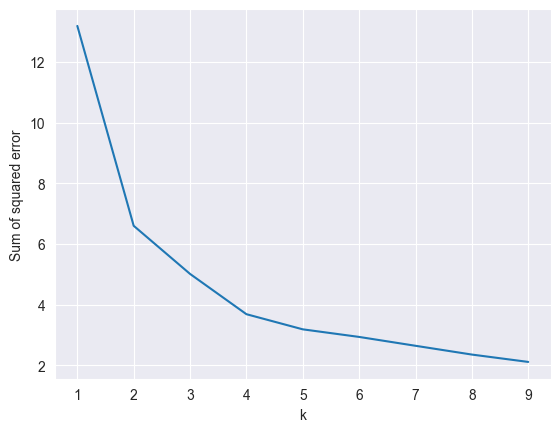

In [505]:
plt.xlabel('k')
plt.ylabel('Sum of squared error')
plt.plot(c_k_rng,sse)
plt.show()

# According to the graph the best cluster size is 4 but we can take 2 or 5 too, depends on the need of the client

#### **Inferences:** ####
1. We see a drastic change in the graph after 2 samples.
2. We don't see much change at 3 clusters but the second major change is seen at 4 samples
3. The third major change is seen at 5 clusters.

Ideally **2 clusters** should be taken. *However, 2 clusters is a very small to consider*.
So, the next best option is **4 clusters**.
The last option is **5 clusters**, as we can see in the graph.

To be on the same side, we can go for 3, 4 or 5 clusters. However, there is no harm with going for 2 clusters.

*It does not make any sense to go for >5 clusters as there are no changes seen after 5 clusters.*

In [506]:
prediction_df = pd.DataFrame()

clusters = [2,3,4,5]

for cluster in pd.Series(clusters):
    kmeans = KMeans(n_clusters=cluster,random_state=0) # pass no. of clusters
    pred = 'KMC_' + str(cluster)
    prediction_df[pred] = kmeans.fit_predict(c_km_df_norm)
    c_km_df_norm[pred] = kmeans.fit_predict(c_km_df_norm)
    crime_orig_data[pred] = kmeans.fit_predict(c_km_df_norm)


prediction_df.head()

KMC_2  KMC_3  KMC_4  KMC_5
0      0      0      3      2
1      0      0      0      0
2      0      0      0      0
3      1      1      1      4
4      0      0      0      0

In [507]:
c_km_df_norm.head()

MURDER   ASSAULT  U_POPULATION      RAPE  KMC_2  KMC_3  KMC_4  KMC_5
0  0.746988  0.654110      0.440678  0.359173      0      0      3      2
1  0.554217  0.746575      0.271186  0.961240      0      0      0      0
2  0.439759  0.852740      0.813559  0.612403      0      0      0      0
3  0.481928  0.496575      0.305085  0.315245      1      1      1      4
4  0.493976  0.791096      1.000000  0.860465      0      0      0      0

In [508]:
c_df_pred2_clus1 = c_km_df_norm[c_km_df_norm['KMC_2']==0]
df_pred2_clus2 = c_km_df_norm[c_km_df_norm['KMC_2']==1]

c_df_pred3_clus1 = c_km_df_norm[c_km_df_norm['KMC_3']==0]
c_df_pred3_clus2 = c_km_df_norm[c_km_df_norm['KMC_3']==1]
c_df_pred3_clus3 = c_km_df_norm[c_km_df_norm['KMC_3']==2]

c_df_pred4_clus1 = c_km_df_norm[c_km_df_norm['KMC_4']==0]
c_df_pred4_clus2 = c_km_df_norm[c_km_df_norm['KMC_4']==1]
c_df_pred4_clus3 = c_km_df_norm[c_km_df_norm['KMC_4']==2]
c_df_pred4_clus4 = c_km_df_norm[c_km_df_norm['KMC_4']==3]

c_df_pred5_clus1 = c_km_df_norm[c_km_df_norm['KMC_5']==0]
c_df_pred5_clus2 = c_km_df_norm[c_km_df_norm['KMC_5']==1]
c_df_pred5_clus3 = c_km_df_norm[c_km_df_norm['KMC_5']==2]
c_df_pred5_clus4 = c_km_df_norm[c_km_df_norm['KMC_5']==3]
c_df_pred5_clus5 = c_km_df_norm[c_km_df_norm['KMC_5']==4]

In [509]:
# 2 Clusters
c_km_df_norm['KMC_2'].value_counts()

KMC_2
1    30
0    20
Name: count, dtype: int64

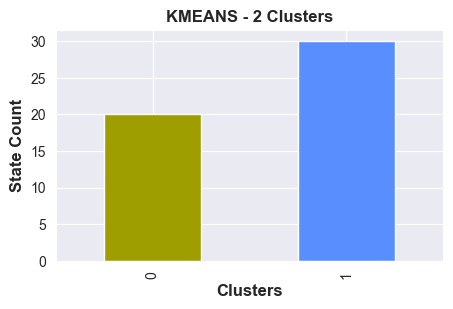

In [510]:
# 2 Clusters Count Break-up Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart to get a visualization of the count of records for each cluster
bar_colors = ['#9e9e00', '#598eff']
fig, ax = plt.subplots(figsize=(5, 3))
crime_orig_data.groupby(['KMC_2']).count()['STATE'].plot(kind='bar', color=bar_colors)
plt.ylabel('State Count')
plt.title('KMEANS - 2 Clusters',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('State Count', fontsize='large', fontweight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

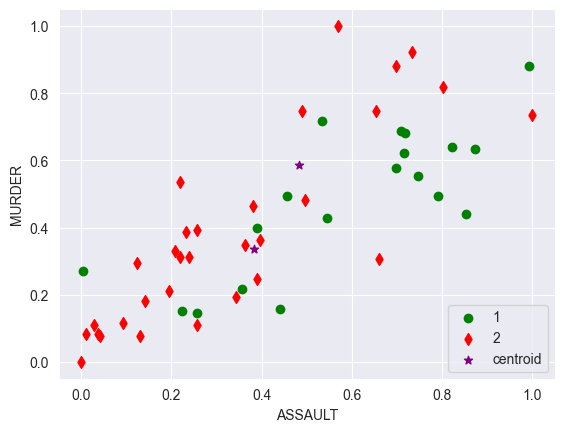

In [511]:
# Creating the Scatter Plot Visual for 2 clusters
# Choosing Assault and Murder to plot the scatter plot


km = KMeans(n_clusters=2)
y_predicted = km.fit_predict(c_km_df_norm)
y_predicted
c_km_df_norm['KMC_2'] = y_predicted

c_km_df_norm.head()

c_df1 = c_km_df_norm[c_km_df_norm.KMC_2==0]
c_df2 = c_km_df_norm[c_km_df_norm.KMC_2==1]

plt.scatter(c_df1['ASSAULT'],c_df1['MURDER'], color='green', marker='o', label = '1')
plt.scatter(c_df2['ASSAULT'],c_df2['MURDER'], color='red', marker='d', label = '2')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*', label = 'centroid')
plt.xlabel('ASSAULT')
plt.ylabel('MURDER')
plt.legend(loc='lower right')

In [512]:
# 3 Clusters
c_km_df_norm['KMC_3'].value_counts()

KMC_3
0    20
1    17
2    13
Name: count, dtype: int64

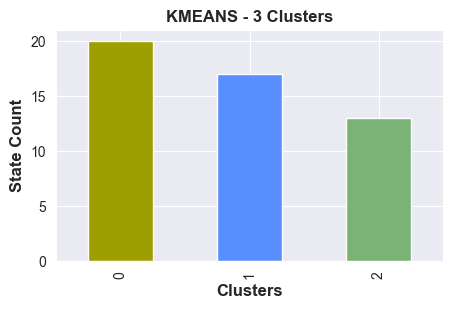

In [513]:
# 3 Clusters Count Break-up Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart to get a visualization of the count of records for each cluster
bar_colors = ['#9e9e00','#598eff','#7ab375']
fig, ax = plt.subplots(figsize=(5, 3))
crime_orig_data.groupby(['KMC_3']).count()['STATE'].plot(kind='bar', color=bar_colors)
plt.ylabel('State Count')
plt.title('KMEANS - 3 Clusters',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('State Count', fontsize='large', fontweight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

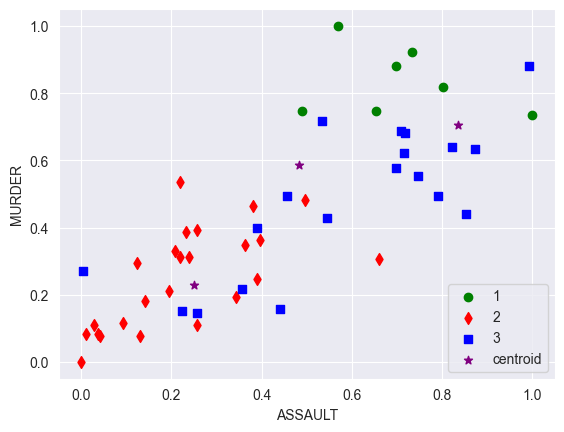

In [514]:
# Creating the Scatter Plot Visual for 3 clusters
# Choosing Assault and Murder to plot the scatter plot


km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(c_km_df_norm)
y_predicted
c_km_df_norm['KMC_3'] = y_predicted

c_km_df_norm.head()

c_df1 = c_km_df_norm[c_km_df_norm.KMC_3==0]
c_df2 = c_km_df_norm[c_km_df_norm.KMC_3==1]
c_df3 = c_km_df_norm[c_km_df_norm.KMC_3==2]

plt.scatter(c_df1['ASSAULT'],c_df1['MURDER'], color='green', marker='o', label = '1')
plt.scatter(c_df2['ASSAULT'],c_df2['MURDER'], color='red', marker='d', label = '2')
plt.scatter(c_df3['ASSAULT'],c_df3['MURDER'], color='blue', marker='s', label = '3')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*', label = 'centroid')
plt.xlabel('ASSAULT')
plt.ylabel('MURDER')
plt.legend(loc='lower right')


In [515]:
# 4 Clusters
c_km_df_norm['KMC_4'].value_counts()

KMC_4
1    17
0    13
2    13
3     7
Name: count, dtype: int64

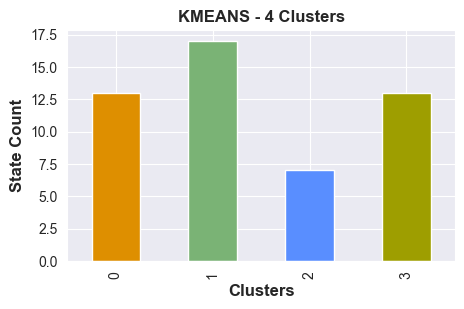

In [516]:
# 4 Clusters Count Break-up Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart to get a visualization of the count of records for each cluster
bar_colors = ['#de8f00','#7ab375','#598eff','#9e9e00']
fig, ax = plt.subplots(figsize=(5, 3))
crime_orig_data.groupby(['KMC_4']).count()['STATE'].plot(kind='bar', color=bar_colors)
plt.ylabel('State Count')
plt.title('KMEANS - 4 Clusters',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('State Count', fontsize='large', fontweight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

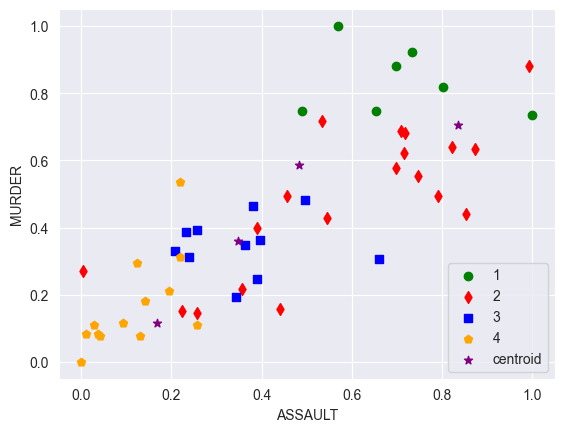

In [517]:
# Creating the Scatter Plot Visual for 4 clusters
# Choosing Assault and Murder to plot the scatter plot


km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(c_km_df_norm)
y_predicted
c_km_df_norm['KMC_4'] = y_predicted

c_km_df_norm.head()

c_df1 = c_km_df_norm[c_km_df_norm.KMC_4==0]
c_df2 = c_km_df_norm[c_km_df_norm.KMC_4==1]
c_df3 = c_km_df_norm[c_km_df_norm.KMC_4==2]
c_df4 = c_km_df_norm[c_km_df_norm.KMC_4==3]

plt.scatter(c_df1['ASSAULT'],c_df1['MURDER'], color='green', marker='o', label = '1')
plt.scatter(c_df2['ASSAULT'],c_df2['MURDER'], color='red', marker='d', label = '2')
plt.scatter(c_df3['ASSAULT'],c_df3['MURDER'], color='blue', marker='s', label = '3')
plt.scatter(c_df4['ASSAULT'],c_df4['MURDER'], color='orange', marker='p', label = '4')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*', label = 'centroid')
plt.xlabel('ASSAULT')
plt.ylabel('MURDER')
plt.legend(loc='lower right')


In [518]:
# 5 Clusters
c_km_df_norm['KMC_5'].value_counts()

KMC_5
0    13
3    13
4    11
2     7
1     6
Name: count, dtype: int64

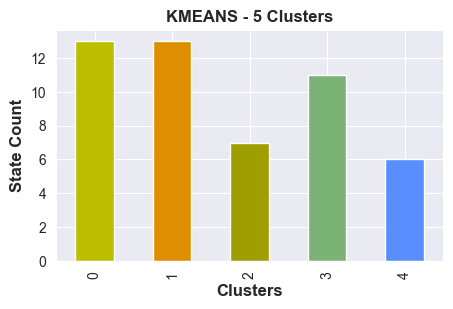

In [519]:
# 5 Clusters Count Break-up Visual
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a bar chart to get a visualization of the count of records for each cluster
bar_colors = ['#bebe00','#de8f00','#9e9e00','#7ab375','#598eff']
fig, ax = plt.subplots(figsize=(5, 3))
crime_orig_data.groupby(['KMC_5']).count()['STATE'].plot(kind='bar', color=bar_colors)
plt.ylabel('State Count')
plt.title('KMEANS - 5 Clusters',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('State Count', fontsize='large', fontweight='bold')
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.show()

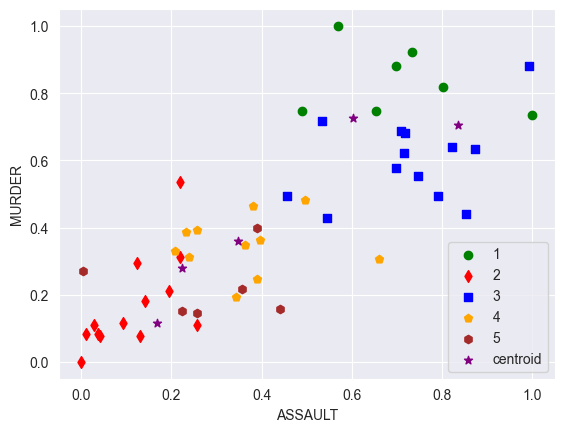

In [520]:
# Creating the Scatter Plot Visual for 5 clusters
# Choosing Assault and Murder to plot the scatter plot

km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(c_km_df_norm)
y_predicted
c_km_df_norm['KMC_5'] = y_predicted

c_km_df_norm.head()

c_df1 = c_km_df_norm[c_km_df_norm.KMC_5==0]
c_df2 = c_km_df_norm[c_km_df_norm.KMC_5==1]
c_df3 = c_km_df_norm[c_km_df_norm.KMC_5==2]
c_df4 = c_km_df_norm[c_km_df_norm.KMC_5==3]
c_df5 = c_km_df_norm[c_km_df_norm.KMC_5==4]

plt.scatter(c_df1['ASSAULT'],c_df1['MURDER'], color='green', marker='o', label = '1')
plt.scatter(c_df2['ASSAULT'],c_df2['MURDER'], color='red', marker='d', label = '2')
plt.scatter(c_df3['ASSAULT'],c_df3['MURDER'], color='blue', marker='s', label = '3')
plt.scatter(c_df4['ASSAULT'],c_df4['MURDER'], color='orange', marker='p', label = '4')
plt.scatter(c_df5['ASSAULT'],c_df5['MURDER'], color='brown', marker='h', label = '5')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color='purple', marker='*', label = 'centroid')
plt.xlabel('ASSAULT')
plt.ylabel('MURDER')
plt.legend(loc='lower right')


In [521]:
# Adding the cluster details to the 'crime_orig_data' DataFrame. Checking it out as a column. 
crime_orig_data.head()

STATE  MURDER  ASSAULT  U_POPULATION  RAPE  HC_W_4  HC_C_4  HC_W_5  \
0     Alabama    13.2      236            58  21.2       3       3       3   
1      Alaska    10.0      263            48  44.5       1       0       0   
2     Arizona     8.1      294            80  31.0       1       0       0   
3    Arkansas     8.8      190            50  19.5       0       1       4   
4  California     9.0      276            91  40.6       1       0       0   

   HC_C_5  KMC_2  KMC_3  KMC_4  KMC_5  
0       2      0      0      2      2  
1       0      0      0      0      0  
2       0      0      0      0      0  
3       4      1      1      1      3  
4       0      0      0      0      0

## **DBSCAN (Density Based Spatial Clustering of Applications with Noise)** ##

### **Using MinMaxScaler for Normalization** ###

In [522]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
c_db_df_norm = scaler.fit_transform(crime_orig_data[['MURDER','ASSAULT','U_POPULATION','RAPE']])
c_db_df_norm

array([[0.74698795, 0.65410959, 0.44067797, 0.35917313],
       [0.55421687, 0.74657534, 0.27118644, 0.96124031],
       [0.43975904, 0.85273973, 0.81355932, 0.6124031 ],
       [0.48192771, 0.49657534, 0.30508475, 0.31524548],
       [0.4939759 , 0.79109589, 1.        , 0.86046512],
       [0.42771084, 0.54452055, 0.77966102, 0.81136951],
       [0.15060241, 0.22260274, 0.76271186, 0.09819121],
       [0.30722892, 0.6609589 , 0.6779661 , 0.21963824],
       [0.87951807, 0.99315068, 0.81355932, 0.63565891],
       [1.        , 0.56849315, 0.47457627, 0.47803618],
       [0.27108434, 0.00342466, 0.86440678, 0.33333333],
       [0.10843373, 0.25684932, 0.37288136, 0.17829457],
       [0.57831325, 0.69863014, 0.86440678, 0.43152455],
       [0.38554217, 0.23287671, 0.55932203, 0.35400517],
       [0.08433735, 0.03767123, 0.42372881, 0.10335917],
       [0.31325301, 0.23972603, 0.57627119, 0.27648579],
       [0.53614458, 0.21917808, 0.33898305, 0.23255814],
       [0.87951807, 0.69863014,

In [523]:
# Model Building - ncdb_1
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

ncdb_1 = DBSCAN()  # The default eps=0.5, min_samples=5
ncdb1_pred = ncdb_1.fit_predict(c_db_df_norm) # We are getting labels for clusters, -1: outlier, only 1 cluster is made i.e. cluster 0

print(ncdb1_pred,"\n")
print(f"There is 1 outlier represented as -1. The remaining 49 form cluster_1\n")

# Checking which model is good with eps=0.5 or 1 and min_samples using Silhoutte Score
# evaluate cluster with Silhouette Score
ss = silhouette_score(c_db_df_norm,ncdb_1.fit_predict(c_db_df_norm))# 0.21033337025958487 - We pass entire dataset with labels, got moderate cluster

print(f"The Silhouette Score is - {ss}")

[ 0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0] 

There is 1 outlier represented as -1. The remaining 49 form cluster_1

The Silhouette Score is - 0.21033337025958487


In [524]:
# Checking with the default values i.e., (eps=0.5, min_samples=5), just to cross check if the same values are showing up again
c_db_d = DBSCAN(eps=0.5,min_samples=5)  # The default option is eps=0.5, min_samples=5 and so it shows the same result as before
d_pred = c_db_d.fit_predict(c_db_df_norm)
print(d_pred)
ss_d = silhouette_score(c_db_df_norm,c_db_d.fit_predict(c_db_df_norm)) # 0.21033337025958487
print(f"\nThe same values are showing up, including the Silhouette Score i.e., {ss_d}\nWith this we confirm that the default epsilon value is 0.5 and min_samples is 5\n")

[ 0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0]

The same values are showing up, including the Silhouette Score i.e., 0.21033337025958487
With this we confirm that the default epsilon value is 0.5 and min_samples is 5



In [525]:
# Model Building - ncdb_2 - Changing the minimum samples to 3
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

ncdb_2 = DBSCAN(eps=0.5,min_samples=3)
ncdb2_pred = ncdb_2.fit_predict(c_db_df_norm) # We are getting labels for clusters, -1: outlier, only 1 cluster is made i.e. cluster 0

vc_2 = pd.Series(ncdb2_pred).value_counts()
print(ncdb2_pred,"\n\n","Label_Count Value_Count","\n",vc_2,"\n")
print(f"There is 1 outlier represented as -1. The remaining 49 form cluster_1\n")


# Checking which model is good with eps=0.5 and min_samples as 3 using Silhoutte Score
# evaluate cluster with Silhouette Score
ss_2 = silhouette_score(c_db_df_norm,ncdb_2.fit_predict(c_db_df_norm))# 0.21033337025958487 - The Silhouette Score is not changing if we change the min samples to below default value i.e. 3

print(f"The Silhouette Score is - {ss_2}")

[ 0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0] 

 Label_Count Value_Count 
  0    49
-1     1
Name: count, dtype: int64 

There is 1 outlier represented as -1. The remaining 49 form cluster_1

The Silhouette Score is - 0.21033337025958487


In [526]:
# Model Building - ncdb_3 - Changing the min_samples to 10
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

ncdb_3 = DBSCAN(eps=0.5,min_samples=10)
ncdb3_pred = ncdb_3.fit_predict(c_db_df_norm) # We are getting labels for clusters, -1: outlier, only 1 cluster is made i.e. cluster 0

vc_3 = pd.Series(ncdb3_pred).value_counts()
print(ncdb3_pred,"\n\n","Label_Count Value_Count","\n",vc_3,"\n")
print(f"There is 1 outlier represented as -1. The remaining 49 form cluster_1\n")

# Checking which model is good with eps=0.5 and min_samples as 10 using Silhoutte Score
# evaluate cluster with Silhouette Score
ss_3 = silhouette_score(c_db_df_norm,ncdb_3.fit_predict(c_db_df_norm))# 0.21033337025958487 - The Silhouette Score is not changing if we change the min samples to above default value i.e. 10

print(f"The Silhouette Score is - {ss_3}")

[ 0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0] 

 Label_Count Value_Count 
  0    49
-1     1
Name: count, dtype: int64 

There is 1 outlier represented as -1. The remaining 49 form cluster_1

The Silhouette Score is - 0.21033337025958487


In [527]:
c_eps = np.arange(0.25,0.51,0.05)
c_eps

array([0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

epsilon: 0.25 ; labels: 14 ; min_sample: 1 ; number of clusters: 14 ; noise: 0 ; silhouette score:  0.017267396341248128
epsilon: 0.25 ; labels: 5 ; min_sample: 2 ; number of clusters: 4 ; noise: 10 ; silhouette score:  0.20624439694672392
epsilon: 0.25 ; labels: 5 ; min_sample: 3 ; number of clusters: 4 ; noise: 10 ; silhouette score:  0.20624439694672392
epsilon: 0.25 ; labels: 4 ; min_sample: 4 ; number of clusters: 3 ; noise: 18 ; silhouette score:  0.11957404878685067
epsilon: 0.25 ; labels: 3 ; min_sample: 5 ; number of clusters: 2 ; noise: 24 ; silhouette score:  0.18944737659567504
epsilon: 0.25 ; labels: 2 ; min_sample: 6 ; number of clusters: 1 ; noise: 28 ; silhouette score:  0.26655403862449967
epsilon: 0.25 ; labels: 3 ; min_sample: 7 ; number of clusters: 2 ; noise: 29 ; silhouette score:  0.11350307666011547
epsilon: 0.25 ; labels: 2 ; min_sample: 8 ; number of clusters: 1 ; noise: 37 ; silhouette score:  0.024584741295684144
epsilon: 0.25 ; labels: 2 ; min_sample: 9 ; n

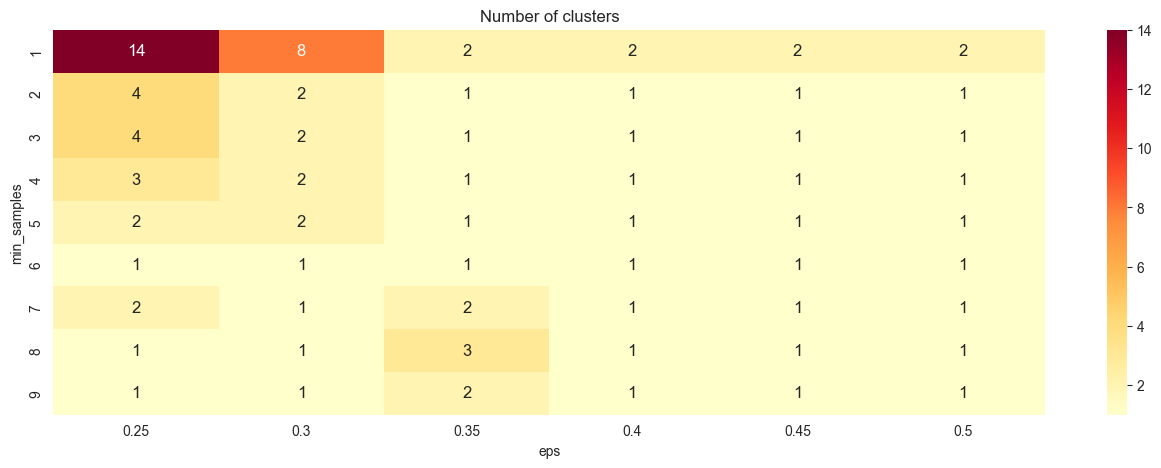


 Created the following 'Silhouette Score' matrix with eps and minmum_samples combinations

 eps              0.25      0.30      0.35      0.40      0.45      0.50
min_samples                                                            
1            0.017267 -0.011030  0.210333  0.210333  0.210333  0.210333
2            0.206244  0.247386  0.210333  0.210333  0.210333  0.210333
3            0.206244  0.247386  0.210333  0.210333  0.210333  0.210333
4            0.119574  0.247386  0.210333  0.210333  0.210333  0.210333
5            0.189447  0.281117  0.210333  0.210333  0.210333  0.210333
6            0.266554  0.357615  0.221176  0.210333  0.210333  0.210333
7            0.113503  0.378369  0.330303  0.210333  0.210333  0.210333
8            0.024585  0.357226  0.252625  0.221176  0.210333  0.210333
9           -0.065660  0.357226  0.274514  0.221176  0.210333  0.210333

 The following heat map shows the plotting for the Silhouette Score for different eps and minimum_samples combinat

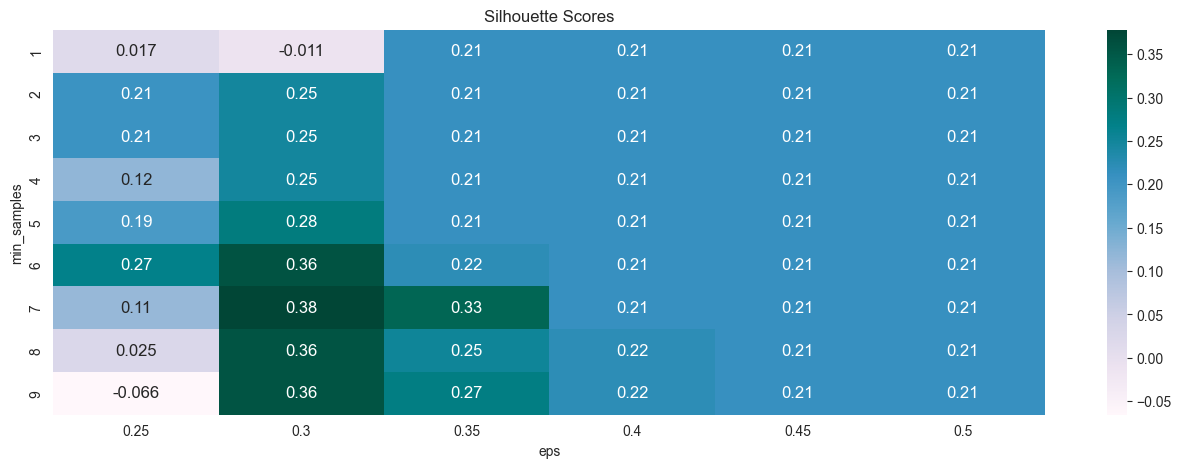

In [528]:
# Creating a heat map for the count of clusters created for different eps and min_sample combinations

c_eps = np.arange(0.25,0.51,0.05) # epsilon values
c_min_samples = [1,2,3,4,5,6,7,8,9]  # min_samples to be taken



c_clusters = []
c_min_sample = []
c_sil_score = []
c_max_value = [0,0,0,0,0,0]
high_values = [0,0,0,0,0,0]
cn_eps=[]

for e in (c_eps):
    for ms in (c_min_samples):
        crimes_dbc = DBSCAN(eps=e, min_samples=ms).fit(c_db_df_norm)
        labels = crimes_dbc.labels_
        label = len(set(labels))
        cnt_clusters = label - (1 if -1 in labels else 0) # Removing the count of outliers represented by -1
        c_clusters.append(cnt_clusters)
        cnt_noise = list(labels).count(-1) # All outliers or noise is represented by -1
        cn_eps.append(np.round(e,2))
        c_min_sample.append(ms)
        ss = silhouette_score(c_db_df_norm, crimes_dbc.fit_predict(c_db_df_norm), metric='euclidean')
        c_sil_score.append(ss)

        
        print("epsilon:",np.round(e,2),"; labels:", label, "; min_sample:", ms,"; number of clusters:", cnt_clusters,"; noise:", cnt_noise,"; silhouette score: ", ss)

        if (ss > c_max_value[5]):
            c_max_value=(e,label,ms,cnt_clusters,cnt_noise,ss)

print(f"\n\nThe best combination is -", "epsilon:",np.round(c_max_value[0],2),"; labels:", c_max_value[1], "; min_sample:",c_max_value[2],"; number of clusters:", c_max_value[3],"; noise:", c_max_value[4],"; silhouette score: ", c_max_value[5]) # 0.2257103196361524


c_sc_plt_data = pd.DataFrame(columns=['clusters','min_samples'])
c_sc_plt_data['clusters'] = c_clusters
c_sc_plt_data['eps'] = cn_eps
c_sc_plt_data['min_samples'] = c_min_sample
c_sc_plt_data['silhouette_score'] = c_sil_score

c_clust_matrix = pd.pivot_table(c_sc_plt_data, index="min_samples", columns="eps", values="clusters")
print("\n","Created the following \'Clusters\' matrix with eps and minmum_samples combinations\n\n", c_clust_matrix)
print("\n","The following heat map shows the plotting for the clusters created using the different eps and minimum_samples combination")
fig, ax = plt.subplots(figsize=(16,5))
sns.heatmap(c_clust_matrix, annot=True, annot_kws={"size": 12}, cmap='YlOrRd', ax=ax)
plt.title('Number of clusters')
plt.show()

c_sil_matrix = pd.pivot_table(c_sc_plt_data, index="min_samples", columns="eps", values="silhouette_score")
print("\n","Created the following \'Silhouette Score\' matrix with eps and minmum_samples combinations\n\n", c_sil_matrix)
print("\n","The following heat map shows the plotting for the Silhouette Score for different eps and minimum_samples combination")
fig, ax = plt.subplots(figsize=(16,5))
sns.heatmap(c_sil_matrix, annot=True, annot_kws={"size": 12}, cmap='PuBuGn', ax=ax)
plt.title('Silhouette Scores')
plt.show()

#### **INFERENCES** ####
- The number of clusters that can be created are varying from **1 to 14 clusters**
- **The best combination is - epsilon: 0.3 ; labels: 2 ; min_sample: 7 ; number of clusters: 1 ; noise: 21 ; silhouette score:  0.37836903236993435**
- The ***secound best option is - epsilon: 0.3 ; labels: 2 ; min_sample: 8 and 9 ; number of clusters: 1 ; noise: 22 ; silhouette score:  0.3572256775581578**
- In all these options have large noise i.e. **> 21 outliers**
- We can try to target the number of outliers to less than 2 and based on that we can get better options with less silhouette score

In [529]:
# Adding a condition to reduce the noise but having enhanced Silhouette Score
# Using loops and tweeking the eps and min_samples range to capture the best model based on the Silhouette Score

import numpy as np

from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

eps = np.arange(0.25,0.51,0.05)
min_samples = [1,2,3,4,5,6,7,8,9]


sil_avg = []
max_value = [0,0,0,0,0,0]

for e in (eps):
    for ms in (min_samples):
        db = DBSCAN(eps=e, min_samples=ms).fit(c_db_df_norm)
        labels = db.labels_
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        
        #labels_count = labels.count()
        label = len(set(db.labels_))

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)  

        # Getting silhouette score
        silhouette_s = silhouette_score(c_db_df_norm, db.fit_predict(c_db_df_norm), metric='euclidean')
        print("epsilon:",np.round(e,2),"; labels:", label, "; min_sample:", ms,"; number of clusters:", n_clusters_,"; noise", n_noise_,"; silhouette score: ", silhouette_s)

        if ((silhouette_s > max_value[5]) and (n_noise_ < 2)):   # Checking high silhouette score but lesser than 2 noise
            max_value=(e,label,ms,n_clusters_,n_noise_,silhouette_s)
        sil_avg.append(silhouette_s)

print(f"\n\nThe best combination is -", "epsilon:",np.round(max_value[0],2),"; labels:", max_value[1], "; min_sample:",max_value[2],"; number of clusters:", max_value[3],"; noise", max_value[4],"; silhouette score: ", max_value[5]) # 0.2257103196361524

epsilon: 0.25 ; labels: 14 ; min_sample: 1 ; number of clusters: 14 ; noise 0 ; silhouette score:  0.017267396341248128
epsilon: 0.25 ; labels: 5 ; min_sample: 2 ; number of clusters: 4 ; noise 10 ; silhouette score:  0.20624439694672392
epsilon: 0.25 ; labels: 5 ; min_sample: 3 ; number of clusters: 4 ; noise 10 ; silhouette score:  0.20624439694672392
epsilon: 0.25 ; labels: 4 ; min_sample: 4 ; number of clusters: 3 ; noise 18 ; silhouette score:  0.11957404878685067
epsilon: 0.25 ; labels: 3 ; min_sample: 5 ; number of clusters: 2 ; noise 24 ; silhouette score:  0.18944737659567504
epsilon: 0.25 ; labels: 2 ; min_sample: 6 ; number of clusters: 1 ; noise 28 ; silhouette score:  0.26655403862449967
epsilon: 0.25 ; labels: 3 ; min_sample: 7 ; number of clusters: 2 ; noise 29 ; silhouette score:  0.11350307666011547
epsilon: 0.25 ; labels: 2 ; min_sample: 8 ; number of clusters: 1 ; noise 37 ; silhouette score:  0.024584741295684144
epsilon: 0.25 ; labels: 2 ; min_sample: 9 ; number of

#### **Inferences:** ####
- Based on the **epsilon value of 0.35** and **min_sample: 1** we can get a silhouette score as **0.21033337025958487**. This gives **0 Outliers** and **2 clusters**
- There are many with the same score but having **1 Outlier**.

We can take the default option as well, which gives **1 Outliers** and **1 clusters**. It is left to the client, which option is the best can be discussed.




In [530]:
# Best Model Based on the silhouette_score and reduced noise

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

ncdb = DBSCAN(eps=0.35,min_samples=1)
ncdb_pred = ncdb.fit_predict(c_db_df_norm) # We are getting labels for clusters, 0 outlier, only 2 cluster is made i.e. cluster 0 and cluster 1

print("The predicted series is - ",ncdb_pred,"\n")

vc_b = pd.Series(ncdb_pred).value_counts()
print(ncdb,"\n\n","Label_Count Value_Count","\n",vc_b,"\n")
print(f"There are 0 outliers and 2 samples represented by 0 and 1\n")

# This model is the best with eps=0.3 and min_samples as 7 using Silhoutte Score
# evaluate cluster with Silhouette Score
ss_b = silhouette_score(c_db_df_norm,ncdb.fit_predict(c_db_df_norm))# 0.21033337025958487 - This score is less

print(f"The Silhouette Score is - {ss_b}")

The predicted series is -  [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0] 

DBSCAN(eps=0.35, min_samples=1) 

 Label_Count Value_Count 
 0    49
1     1
Name: count, dtype: int64 

There are 0 outliers and 2 samples represented by 0 and 1

The Silhouette Score is - 0.21033337025958487


In [531]:
# Adding the cluster details to the 'crime_orig_data' DataFrame 
crime_orig_data['DBSCAN_NORM'] = ncdb_pred # The option with least noise
crime_orig_data.head()

STATE  MURDER  ASSAULT  U_POPULATION  RAPE  HC_W_4  HC_C_4  HC_W_5  \
0     Alabama    13.2      236            58  21.2       3       3       3   
1      Alaska    10.0      263            48  44.5       1       0       0   
2     Arizona     8.1      294            80  31.0       1       0       0   
3    Arkansas     8.8      190            50  19.5       0       1       4   
4  California     9.0      276            91  40.6       1       0       0   

   HC_C_5  KMC_2  KMC_3  KMC_4  KMC_5  DBSCAN_NORM  
0       2      0      0      2      2            0  
1       0      0      0      0      0            1  
2       0      0      0      0      0            0  
3       4      1      1      1      3            0  
4       0      0      0      0      0            0

In [532]:
# Best Model Based based on silhouette_score

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

ncdb_bss = DBSCAN(eps=0.3,min_samples=7)
ncdb_bss_pred = ncdb_bss.fit_predict(c_db_df_norm) # We are getting labels for clusters, 0 outlier, only 2 cluster is made i.e. cluster 0 and cluster 1

print("The predicted series is - ",ncdb_bss_pred,"\n")

vc_nbss = pd.Series(ncdb_bss_pred).value_counts()
print(ncdb,"\n\n","Label_Count Value_Count","\n",vc_nbss,"\n")
print("There are 0 outliers and 2 samples represented by 0 and 1\n")

# This model is the best with eps=0.3 and min_samples as 7 using Silhoutte Score
# evaluate cluster with Silhouette Score
ss_bss = silhouette_score(c_db_df_norm,ncdb_bss.fit_predict(c_db_df_norm)) # 0.0.37836903236993435 - The Silhouette Score is the highest but noise is 21

print(f"The Silhouette Score is - {ss_bss}")

The predicted series is -  [-1 -1 -1  0 -1 -1  0 -1 -1 -1 -1  0 -1  0  0  0  0 -1  0 -1  0 -1  0 -1
  0  0  0 -1  0  0 -1 -1 -1  0  0  0  0  0  0 -1  0 -1 -1  0  0  0  0  0
  0  0] 

DBSCAN(eps=0.35, min_samples=1) 

 Label_Count Value_Count 
  0    29
-1    21
Name: count, dtype: int64 

There are 0 outliers and 2 samples represented by 0 and 1

The Silhouette Score is - 0.37836903236993435


In [533]:
# Adding the cluster details to the 'crime_orig_data' DataFrame 
crime_orig_data['DBSCAN_NORM_BEST'] = ncdb_bss_pred # The option with highest Silhouette Score
crime_orig_data.head()

STATE  MURDER  ASSAULT  U_POPULATION  RAPE  HC_W_4  HC_C_4  HC_W_5  \
0     Alabama    13.2      236            58  21.2       3       3       3   
1      Alaska    10.0      263            48  44.5       1       0       0   
2     Arizona     8.1      294            80  31.0       1       0       0   
3    Arkansas     8.8      190            50  19.5       0       1       4   
4  California     9.0      276            91  40.6       1       0       0   

   HC_C_5  KMC_2  KMC_3  KMC_4  KMC_5  DBSCAN_NORM  DBSCAN_NORM_BEST  
0       2      0      0      2      2            0                -1  
1       0      0      0      0      0            1                -1  
2       0      0      0      0      0            0                -1  
3       4      1      1      1      3            0                 0  
4       0      0      0      0      0            0                -1

### **Using StandardScaler for Standardization** ###

In [534]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sscaler = StandardScaler()

c_db_df_stds = sscaler.fit_transform(crime_orig_data[['MURDER','ASSAULT','U_POPULATION','RAPE']])
c_db_df_stds

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [535]:
# Model Building - scdb - Default Option - This is giving all as outliers
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

scdb = DBSCAN()
scdb_pred = scdb.fit_predict(c_db_df_stds) # We are getting labels for clusters, -1: outlier, only 1 cluster is made i.e. cluster 0

s_vc = pd.Series(scdb_pred).value_counts()
print(scdb_pred,"\n\n","Label_Count Value_Count","\n",s_vc,"\n")
print("All the 50 are outliers based on the default DBSCAN option\n")
print("We are unable to get the Silhouette Score using the default option so we need to change the eps and min_samples to get the best model.\n")


# Checking which model is good with the default eps and min_samples
# evaluate cluster with Silhouette Score
#s_ss = silhouette_score(c_db_df_stds,scdb.fit_predict(c_db_df_stds))


# NOTE: We are unable to get the Silhouette Score using the default option so we need to change the eps and min_samples to get the best model.

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1] 

 Label_Count Value_Count 
 -1    50
Name: count, dtype: int64 

All the 50 are outliers based on the default DBSCAN option

We are unable to get the Silhouette Score using the default option so we need to change the eps and min_samples to get the best model.



In [536]:
# Model Building - scdb_1 - eps=0.75 and min_samples=3 - This is giving us 3 clusters with 29 outliers
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

scdb_1 = DBSCAN(eps=0.75,min_samples=3)
scdb1_pred = scdb_1.fit_predict(c_db_df_stds) # We are getting labels for clusters, -1: outlier, only 1 cluster is made i.e. cluster 0

vc_1 = pd.Series(scdb1_pred).value_counts()
print(scdb1_pred,"\n\n","Label_Count Value_Count","\n",vc_1,"\n")
print(f"There is 1 outlier represented as -1. The remaining 49 form cluster_1\n")


# Checking which model is good with the default eps and min_samples
# evaluate cluster with Silhouette Score
s_ss_1 = silhouette_score(c_db_df_stds,scdb_1.fit_predict(c_db_df_stds))# 0.21033337025958487

print(f"The Silhouette Score is - {s_ss_1}")

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0 -1 -1  0  1 -1  1  0 -1
 -1  0  0 -1  0 -1  1 -1 -1  0  0  0  2  0 -1 -1 -1 -1 -1  2 -1  0  2 -1
  0  0] 

 Label_Count Value_Count 
 -1    29
 0    15
 1     3
 2     3
Name: count, dtype: int64 

There is 1 outlier represented as -1. The remaining 49 form cluster_1

The Silhouette Score is - -0.0957904679707531


In [537]:
# Model Building - scdb_2 - eps=0.99 and min_samples=3 - This is giving us 4 clusters with 11 outliers
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

scdb_2 = DBSCAN(eps=1.5,min_samples=3)
scdb2_pred = scdb_2.fit_predict(c_db_df_stds) # We are getting labels for clusters, -1: outlier, only 1 cluster is made i.e. cluster 0

vc_2 = pd.Series(scdb2_pred).value_counts()
print(scdb2_pred,"\n\n","Label_Count Value_Count","\n",vc_2,"\n")
print(f"There is 1 outlier represented as -1. The remaining 49 form cluster_1\n")


# Checking which model is good with the default eps and min_samples
# evaluate cluster with Silhouette Score
s_ss_2 = silhouette_score(c_db_df_stds,scdb_2.fit_predict(c_db_df_stds))# 0.17573912425823854

print(f"The Silhouette Score is - {s_ss_2}")

[ 0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0] 

 Label_Count Value_Count 
  0    49
-1     1
Name: count, dtype: int64 

There is 1 outlier represented as -1. The remaining 49 form cluster_1

The Silhouette Score is - 0.23455598753159795


In [538]:
# Model Building - scdb_3 - eps=1.5 and min_samples=3 - This is giving us 4 clusters with 11 outliers
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

scdb_3 = DBSCAN(eps=1.5,min_samples=3)
scdb3_pred = scdb_3.fit_predict(c_db_df_stds) # We are getting labels for clusters, -1: outlier, only 1 cluster is made i.e. cluster 0

vc_3 = pd.Series(scdb3_pred).value_counts()
print(scdb3_pred,"\n\n","Label_Count Value_Count","\n",vc_3,"\n")
print(f"There is 1 outlier represented as -1. The remaining 49 form cluster_1\n")


# Checking which model is good with the default eps and min_samples
# evaluate cluster with Silhouette Score
s_ss_3 = silhouette_score(c_db_df_stds,scdb_3.fit_predict(c_db_df_stds))# 0.23455598753159795

print(f"The Silhouette Score is - {s_ss_3}")

[ 0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0] 

 Label_Count Value_Count 
  0    49
-1     1
Name: count, dtype: int64 

There is 1 outlier represented as -1. The remaining 49 form cluster_1

The Silhouette Score is - 0.23455598753159795


#### **Using the for loop to find the best eps and min_samples** ####

In [539]:
# Using loops and tweeking the eps and min_samples range to capture the best model based on the Silhouette Score

import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

s_eps = np.arange(0.25,2.01,0.05)
s_min_samples = [1,2]

max_value = [0,0,0,0,0,0]

for e in (s_eps):
    for ms in (s_min_samples):
        db = DBSCAN(eps=e, min_samples=ms).fit(c_db_df_stds)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        label = len(set(db.labels_))

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)  

        # Getting silhouette score
        silhouette_s = silhouette_score(c_db_df_stds, db.fit_predict(c_db_df_stds), metric='euclidean')
        print("epsilon:",np.round(e,2),"; labels:", label, "; min_sample:", ms,"; number of clusters:", n_clusters_,"; noise:", n_noise_,"; silhouette score: ", silhouette_s)

        if silhouette_s > max_value[5]:   # Checking and saving the parameters associated with the highest silhouette score
            max_value=(e,label,ms,n_clusters_,n_noise_,silhouette_s)

print(f"\n\nThe best combination is -", "epsilon:",np.round(max_value[0],2),"; labels:", max_value[1], "; min_sample:",max_value[2],"; number of clusters:", max_value[3],"; noise:", max_value[4],"; silhouette score: ", max_value[5]) # 0.2257103196361524

epsilon: 0.25 ; labels: 49 ; min_sample: 1 ; number of clusters: 49 ; noise: 0 ; silhouette score:  0.02524285085226844
epsilon: 0.25 ; labels: 2 ; min_sample: 2 ; number of clusters: 1 ; noise: 48 ; silhouette score:  0.038817626029398714
epsilon: 0.3 ; labels: 49 ; min_sample: 1 ; number of clusters: 49 ; noise: 0 ; silhouette score:  0.02524285085226844
epsilon: 0.3 ; labels: 2 ; min_sample: 2 ; number of clusters: 1 ; noise: 48 ; silhouette score:  0.038817626029398714
epsilon: 0.35 ; labels: 49 ; min_sample: 1 ; number of clusters: 49 ; noise: 0 ; silhouette score:  0.02524285085226844
epsilon: 0.35 ; labels: 2 ; min_sample: 2 ; number of clusters: 1 ; noise: 48 ; silhouette score:  0.038817626029398714
epsilon: 0.4 ; labels: 48 ; min_sample: 1 ; number of clusters: 48 ; noise: 0 ; silhouette score:  0.04846213237344418
epsilon: 0.4 ; labels: 3 ; min_sample: 2 ; number of clusters: 2 ; noise: 46 ; silhouette score:  -0.20578368861600077
epsilon: 0.45 ; labels: 47 ; min_sample: 1 ;

#### **INFERENCE:** ####
- **The best option based on silhouette score -** combination is - epsilon: 1.1 ; labels: 4 ; min_sample: 2 ; number of clusters: 3 ; noise: 6 ; silhouette score:  **0.28523184583363054**
- However, this has noise as 6 i.e. **6 outliers**

In [540]:
# Using loops and tweeking the eps and min_samples range to capture the best model based on the Silhouette Score

import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples

s_eps = np.arange(1,2.01,0.05)
s_min_samples = [1,2,3]

max_value = [0,0,0,0,0,0]

for e in (s_eps):
    for ms in (s_min_samples):
        db = DBSCAN(eps=e, min_samples=ms).fit(c_db_df_stds)
        labels = db.labels_
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        label = len(set(db.labels_))

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)  

        # Getting silhouette score
        silhouette_s = silhouette_score(c_db_df_stds, db.fit_predict(c_db_df_stds), metric='euclidean')
        print("epsilon:",np.round(e,2),"; labels:", label, "; min_sample:", ms,"; number of clusters:", n_clusters_,"; noise:", n_noise_,"; silhouette score: ", silhouette_s)

        if ((silhouette_s > max_value[5]) and (n_noise_ < 2)):   # Checking high silhouette score but lesser the 2 noise
            max_value=(e,label,ms,n_clusters_,n_noise_,silhouette_s)

print(f"\n\nThe best combination is -", "epsilon:",np.round(max_value[0],2),"; labels:", max_value[1], "; min_sample:",max_value[2],"; number of clusters:", max_value[3],"; noise:", max_value[4],"; silhouette score: ", max_value[5]) # 0.2257103196361524

epsilon: 1.0 ; labels: 14 ; min_sample: 1 ; number of clusters: 14 ; noise: 0 ; silhouette score:  0.0011630308334708251
epsilon: 1.0 ; labels: 5 ; min_sample: 2 ; number of clusters: 4 ; noise: 10 ; silhouette score:  0.19290975823254836
epsilon: 1.0 ; labels: 5 ; min_sample: 3 ; number of clusters: 4 ; noise: 10 ; silhouette score:  0.19290975823254836
epsilon: 1.05 ; labels: 12 ; min_sample: 1 ; number of clusters: 12 ; noise: 0 ; silhouette score:  0.06322611093551835
epsilon: 1.05 ; labels: 5 ; min_sample: 2 ; number of clusters: 4 ; noise: 8 ; silhouette score:  0.20603419333536546
epsilon: 1.05 ; labels: 5 ; min_sample: 3 ; number of clusters: 4 ; noise: 8 ; silhouette score:  0.20603419333536546
epsilon: 1.1 ; labels: 9 ; min_sample: 1 ; number of clusters: 9 ; noise: 0 ; silhouette score:  0.119031054793955
epsilon: 1.1 ; labels: 4 ; min_sample: 2 ; number of clusters: 3 ; noise: 6 ; silhouette score:  0.28523184583363054
epsilon: 1.1 ; labels: 4 ; min_sample: 3 ; number of cl

#### **INFERENCE:** ####
- The **best option** with combination of silhouette score and no noise is - **epsilon: 1.35 ; labels: 2 ; min_sample: 1 ; number of clusters: 2 ; noise: 0 ; silhouette score:  0.2345559875315979**
- Another alternative is - **epsilon: 1.1 ; number of clusters: 3 ; noise: 29 ; silhouette score:  0.28523184583363054**

In [541]:
# Model Building - Another Alternative
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

scdb_alt = DBSCAN(eps=1.1,min_samples=2)
scdb_alt_pred = scdb_alt.fit_predict(c_db_df_stds) # We are getting labels for clusters, -1: outlier, only 1 cluster is made i.e. cluster 0

vc_alt = pd.Series(scdb_alt_pred).value_counts()
print(scdb_alt_pred,"\n\n","Label_Count Value_Count","\n",vc_alt,"\n")
print(f"There is 29 outliers represented as -1. The remaining 21 are divided into 3 clusters - cluster_0, cluster_1, cluster_2\n")


# Checking which model is good with the default eps and min_samples
# evaluate cluster with Silhouette Score
s_ss_alt = silhouette_score(c_db_df_stds,scdb_alt.fit_predict(c_db_df_stds))# 0.28523184583363054

print(f"The Silhouette Score is - {s_ss_alt}")

[ 0 -1  1  2 -1 -1  2 -1 -1  0  2  2  1  2  2  2  2  0  2  1  2  1  2  0
  2  2  2 -1  2  2  1  1  0  2  2  2  2  2  2  0  2  0  1  2  2  2  2  2
  2  2] 

 Label_Count Value_Count 
  2    30
 0     7
 1     7
-1     6
Name: count, dtype: int64 

There is 29 outliers represented as -1. The remaining 21 are divided into 3 clusters - cluster_0, cluster_1, cluster_2

The Silhouette Score is - 0.28523184583363054


In [542]:
# Model Building - If we were to choose the Best Model based on Silouette Score and less noise - scdb_b1 - eps=1.1 and min_samples=2 - This is giving us 3 clusters with 6 outliers
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

scdb_b1 = DBSCAN(eps=1.35,min_samples=1)
scdb_b1_pred = scdb_b1.fit_predict(c_db_df_stds) # We are getting labels for clusters, -1: outlier, only 1 cluster is made i.e. cluster 0

vc_b1 = pd.Series(scdb_b1_pred).value_counts()
print(scdb_b1_pred,"\n\n","Label_Count Value_Count","\n",vc_b1,"\n")
print(f"There is 29 outliers represented as -1. The remaining 21 are divided into 3 clusters - cluster_0, cluster_1, cluster_2\n")


# Checking which model is good with the default eps and min_samples
# evaluate cluster with Silhouette Score
s_ss_b1 = silhouette_score(c_db_df_stds,scdb_b1.fit_predict(c_db_df_stds))# 0.23455598753159795

print(f"The Silhouette Score is - {s_ss_b1}")

# Here we are compromising on the Silhouette Score

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0] 

 Label_Count Value_Count 
 0    49
1     1
Name: count, dtype: int64 

There is 29 outliers represented as -1. The remaining 21 are divided into 3 clusters - cluster_0, cluster_1, cluster_2

The Silhouette Score is - 0.23455598753159795


In [543]:
# The best option based on only Silhouette Score is - epsilon: 1.1 ; labels: 4 ; min_sample: 2 ; number of clusters: 3 ; noise: 6 ; silhouette score:  0.28523184583363054

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

ncdb_bsss = DBSCAN(eps=1.1,min_samples=2)
ncdb_bsss_pred = ncdb_bsss.fit_predict(c_db_df_stds) # We are getting labels for clusters, 0 outlier, 3 cluster is made i.e. cluster 0, 1 and 2. There are outliers too represented by -1

print("The predicted series is - ",ncdb_bsss_pred,"\n")

vc_nbsss = pd.Series(ncdb_bsss_pred).value_counts()
print(ncdb,"\n\n","Label_Count Value_Count","\n",vc_nbsss,"\n")
print("There are 0 outliers and 2 samples represented by 0 and 1\n")

# This model is the best with epsilon: 1.1 and min_sample: 2 using Silhoutte Score
# evaluate cluster with Silhouette Score
ss_bsss = silhouette_score(c_db_df_stds,ncdb_bsss.fit_predict(c_db_df_stds)) # 0.28523184583363054 - The Silhouette Score is the highest but noise is 6

print(f"The Silhouette Score is - {ss_bsss}")

The predicted series is -  [ 0 -1  1  2 -1 -1  2 -1 -1  0  2  2  1  2  2  2  2  0  2  1  2  1  2  0
  2  2  2 -1  2  2  1  1  0  2  2  2  2  2  2  0  2  0  1  2  2  2  2  2
  2  2] 

DBSCAN(eps=0.35, min_samples=1) 

 Label_Count Value_Count 
  2    30
 0     7
 1     7
-1     6
Name: count, dtype: int64 

There are 0 outliers and 2 samples represented by 0 and 1

The Silhouette Score is - 0.28523184583363054


In [544]:
# Adding the cluster details to the 'crime_orig_data' DataFrame 
crime_orig_data['DBSCAN_STD_BEST'] = ncdb_bsss_pred # The option with highest Silhouette Score
crime_orig_data.head()

STATE  MURDER  ASSAULT  U_POPULATION  RAPE  HC_W_4  HC_C_4  HC_W_5  \
0     Alabama    13.2      236            58  21.2       3       3       3   
1      Alaska    10.0      263            48  44.5       1       0       0   
2     Arizona     8.1      294            80  31.0       1       0       0   
3    Arkansas     8.8      190            50  19.5       0       1       4   
4  California     9.0      276            91  40.6       1       0       0   

   HC_C_5  KMC_2  KMC_3  KMC_4  KMC_5  DBSCAN_NORM  DBSCAN_NORM_BEST  \
0       2      0      0      2      2            0                -1   
1       0      0      0      0      0            1                -1   
2       0      0      0      0      0            0                -1   
3       4      1      1      1      3            0                 0   
4       0      0      0      0      0            0                -1   

   DBSCAN_STD_BEST  
0                0  
1               -1  
2                1  
3                2  
4               -1

In [545]:
# Adding the cluster details to the 'crime_orig_data' DataFrame 
crime_orig_data['DBSCAN_STD'] = scdb_b1_pred # The option with least noise
crime_orig_data.head()

STATE  MURDER  ASSAULT  U_POPULATION  RAPE  HC_W_4  HC_C_4  HC_W_5  \
0     Alabama    13.2      236            58  21.2       3       3       3   
1      Alaska    10.0      263            48  44.5       1       0       0   
2     Arizona     8.1      294            80  31.0       1       0       0   
3    Arkansas     8.8      190            50  19.5       0       1       4   
4  California     9.0      276            91  40.6       1       0       0   

   HC_C_5  KMC_2  KMC_3  KMC_4  KMC_5  DBSCAN_NORM  DBSCAN_NORM_BEST  \
0       2      0      0      2      2            0                -1   
1       0      0      0      0      0            1                -1   
2       0      0      0      0      0            0                -1   
3       4      1      1      1      3            0                 0   
4       0      0      0      0      0            0                -1   

   DBSCAN_STD_BEST  DBSCAN_STD  
0                0           0  
1               -1           1  
2                1           0  
3                2           0  
4               -1           0

We observe that the DBSCAN_NORM and DB_SCAN_STD gives us the same clusters for 0 noise

In [546]:
crime_orig_data.iloc[:,1:].groupby('DBSCAN_NORM').agg(['mean']) # 0 Noise; Using Normalization

MURDER     ASSAULT U_POPULATION       RAPE    HC_W_4  \
                  mean        mean         mean       mean      mean   
DBSCAN_NORM                                                            
0             7.742857  168.877551    65.897959  20.757143  1.163265   
1            10.000000  263.000000    48.000000  44.500000  1.000000   

               HC_C_4   HC_W_5    HC_C_5     KMC_2     KMC_3     KMC_4  \
                 mean     mean      mean      mean      mean      mean   
DBSCAN_NORM                                                              
0            1.285714  1.77551  1.938776  0.612245  0.877551  1.428571   
1            0.000000  0.00000  0.000000  0.000000  0.000000  0.000000   

                KMC_5 DBSCAN_NORM_BEST DBSCAN_STD_BEST DBSCAN_STD  
                 mean             mean            mean       mean  
DBSCAN_NORM                                                        
0            1.714286        -0.408163        1.265306        0.0  
1            0.000000        -1.000000       -1.000000        1.0

In [547]:
crime_orig_data.iloc[:,1:].groupby('DBSCAN_STD').agg(['mean']) # 0 Noise; Using Standardization

MURDER     ASSAULT U_POPULATION       RAPE    HC_W_4    HC_C_4  \
                 mean        mean         mean       mean      mean      mean   
DBSCAN_STD                                                                      
0            7.742857  168.877551    65.897959  20.757143  1.163265  1.285714   
1           10.000000  263.000000    48.000000  44.500000  1.000000  0.000000   

             HC_W_5    HC_C_5     KMC_2     KMC_3     KMC_4     KMC_5  \
               mean      mean      mean      mean      mean      mean   
DBSCAN_STD                                                              
0           1.77551  1.938776  0.612245  0.877551  1.428571  1.714286   
1           0.00000  0.000000  0.000000  0.000000  0.000000  0.000000   

           DBSCAN_NORM DBSCAN_NORM_BEST DBSCAN_STD_BEST  
                  mean             mean            mean  
DBSCAN_STD                                               
0                  0.0        -0.408163        1.265306  
1                  1.0        -1.000000       -1.000000

In [548]:
crime_orig_data.iloc[:,1:].groupby('DBSCAN_NORM_BEST').agg(['mean']) # Highest Silhouette Score Using Normalization

MURDER     ASSAULT U_POPULATION       RAPE    HC_W_4  \
                       mean        mean         mean       mean      mean   
DBSCAN_NORM_BEST                                                            
-1                11.690476  248.142857    69.190476  28.147619  1.571429   
 0                 4.962069  114.724138    62.896552  16.224138  0.862069   

                    HC_C_4    HC_W_5    HC_C_5     KMC_2     KMC_3     KMC_4  \
                      mean      mean      mean      mean      mean      mean   
DBSCAN_NORM_BEST                                                               
-1                1.095238  1.190476  0.761905  0.095238  0.095238  0.761905   
 0                1.379310  2.137931  2.724138  0.965517  1.413793  1.862069   

                     KMC_5 DBSCAN_NORM DBSCAN_STD_BEST DBSCAN_STD  
                      mean        mean            mean       mean  
DBSCAN_NORM_BEST                                                   
-1                1.000000    0.047619        0.142857   0.047619  
 0                2.172414    0.000000        2.000000   0.000000

In [549]:
crime_orig_data.iloc[:,1:].groupby('DBSCAN_STD_BEST').agg(['mean']) # Highest Silhouette Score Using Standardization

MURDER     ASSAULT U_POPULATION       RAPE    HC_W_4  \
                      mean        mean         mean       mean      mean   
DBSCAN_STD_BEST                                                            
-1               10.066667  261.333333    75.000000  36.250000  0.833333   
 0               14.671429  251.285714    54.285714  21.685714  3.000000   
 1               11.014286  262.571429    77.142857  28.800000  1.000000   
 2                4.973333  112.433333    63.566667  16.356667  0.833333   

                   HC_C_4    HC_W_5    HC_C_5     KMC_2     KMC_3     KMC_4  \
                     mean      mean      mean      mean      mean      mean   
DBSCAN_STD_BEST                                                               
-1               0.166667  0.333333  0.166667  0.166667  0.166667  0.166667   
 0               3.000000  3.000000  2.000000  0.000000  0.000000  2.000000   
 1               0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
 2               1.366667  2.133333  2.666667  0.966667  1.400000  1.833333   

                    KMC_5 DBSCAN_NORM DBSCAN_NORM_BEST DBSCAN_STD  
                     mean        mean             mean       mean  
DBSCAN_STD_BEST                                                    
-1               0.500000    0.166667        -1.000000   0.166667  
 0               2.000000    0.000000        -1.000000   0.000000  
 1               0.000000    0.000000        -1.000000   0.000000  
 2               2.233333    0.000000        -0.033333   0.000000